In [ ]:
# !pip install pytesseract lanms Shapely

In [1]:
import glob

import numpy as np
import matplotlib.pyplot as plt

import torch
import pytesseract
import cv2

import PIL
from PIL import Image, ImageFile

In [2]:
plt.rcParams["figure.figsize"] = 16, 9  # Make figures larger

In [3]:
# images = glob.glob("/home/gx/mishow_objdet/data/CaptureVerification/**/*.jpg", recursive=True)
# images = glob.glob("./test_images-car_num_plates/*")
images = glob.glob("/home/gx/datasets/ICDAR_2015/test_img/**/*.jpg", recursive=True)
len(images)

500

In [4]:
pytesseract.image_to_string(Image.open(np.random.choice(images)))

''

## Inference

In [5]:
from detect import Predictor

In [19]:
# predictor = Predictor(config_path="./runs/deeplabv3plus_resnet50_scope512_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/rn50_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/vgg16bn_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/xception_scope512_inter256_128_64_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/deeplabv3plus_resnet50_scope512_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
predictor = Predictor(config_path="./runs/mobilenetv2_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
                      device="cpu")

using device: cpu
feature_dims: [24, 32, 96, 1280]
input_feature_dims: [24, 32, 96, 1280]
scope: 512
scale: 4


In [20]:
# The input preprocessing that was used to train the model
predictor.preprocessing_params

{'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225)}

In [21]:
# The input image size (side length) / model output size (side length) ratio
predictor.scale

4

In [22]:
# The input image size that was used to train the model
predictor.scope

512

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (523, 2)
>>> restore_polys: valid_geo shape: (5, 523)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.670952    7.002548    7.842393  ...  15.2224655  14.0592165
   15.728374 ]
 [ 21.788418   18.542141   18.40133   ...   8.098511    8.706153
    7.3242617]
 [ 60.83354   125.20072   121.78876   ...  11.877121    8.596327
   16.40789  ]
 [ 71.03525    12.852168   16.366749  ...  26.420038   32.423203
   21.571848 ]]
>>> restore_polys: angle: [ 0.08977383 -0.01835038 -0.00700637  0.00479687  0.01277069  0.01861281
  0.03532463  0.04790188 -0.03035848  0.06239755  0.06160173  0.06579864
  0.07106346  0.07856596  0.07821729  0.09027679  0.05689155  0.05525908
  0.04627765  0.03840645  0.02073402  0.01227166  0.00318443  0.00152

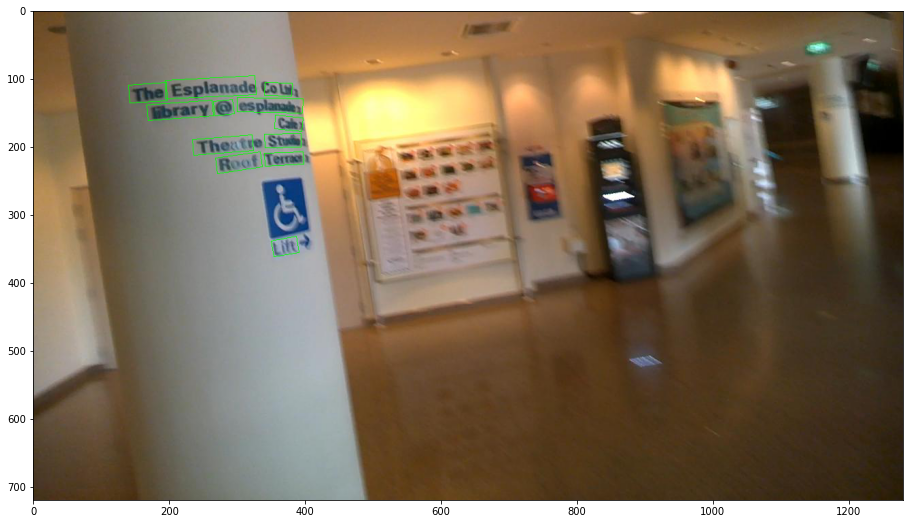

In [30]:
# Make prediction and plot image

boxes, img = predictor.predict(np.random.choice(images), 
                  save_img=False,  # Don't save image on disk
                  return_img=True,  # Return image
                  score_thresh=0.9, 
                  nms_thresh=0.2)
plt.imshow(img)

In [ ]:
boxes

In [ ]:
# predictor.predict_dir("/home/gx/datasets/ICDAR_2015/test_img/", 
#                       output_dir="./predictions_icdar2015test_vgg16bn_scope512_inter128_64_32_merged32_icdar2015")

In [31]:
predictor.predict_dir("/home/gx/datasets/ICDAR_2015/test_img/", 
                      output_dir="./predictions_icdar2015test_mobilenetv2_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2",
                      score_thresh=0.5, nms_thresh=0.2)
# predictor.predict_dir("/home/gx/datasets/ICDAR_2015/test_img/", 
#                       output_dir="./predictions_icdar2015test_xception_scope512_inter256_128_64_merged32_icdar2015__score0.5_nms0.2",
#                       score_thresh=0.5, nms_thresh=0.2)

Found 500 images in /home/gx/datasets/ICDAR_2015/test_img/
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (218, 2)
>>> restore_polys: valid_geo shape: (5, 218)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.164404   13.877362   13.658645   12.369476   11.653271   11.255034
   11.388363   12.152199   13.004336   13.558062   13.56375    13.284027
   13.1383095  12.648778   12.26063    12.077898   12.928745   16.478281
   16.190207   15.589351   15.213419   15.319668   17.666933   16.749216
   17.092785   18.126421   16.314234   16.02603    15.834172   14.889134
   15.077333   15.454938   11.846537   12.384471   12.920152   13.470924
   11.788696   14.190775   14.4513645  14.632014   15.024272   13.82138
   19.552961   19.774235   19.342224   19.234512   19.396282   21.145338
   21.698

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (426, 2)
>>> restore_polys: valid_geo shape: (5, 426)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.009019   1.9037874  2.2978413 ...  9.530843  12.284165   7.5199394]
 [11.859194  12.383825  11.429256  ...  6.261015   4.901322   6.9789505]
 [ 7.7100086 11.610012   8.396163  ... 18.99618   11.40904   22.740376 ]
 [10.18085    6.1186433 14.97143   ...  7.57301   14.57339    3.4920883]]
>>> restore_polys: angle: [ 1.81102250e-02  4.14695404e-02  7.92833269e-02  8.02705288e-02
  7.93331340e-02  3.89552861e-02  1.31916357e-02  4.07469273e-02
  4.00540903e-02  8.14504102e-02  7.29313120e-02  2.88840421e-02
  7.00496659e-02  4.65311892e-02  1.27538375e-03  7.89219290e-02
  4.15920019e-02  3.79568487e-02  4.44581062e-02  4.07208987e-02
  4.96568233e-02  4.56831194e-02 -5.42898513e-02 -3.91074307e-02
  3.37764136e-02 -2.81017907e-02  9.16231482e-04 -6.72146503e-04
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (407, 2)
>>> restore_polys: valid_geo shape: (5, 407)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.501284  9.323533  7.919648 ... 24.691227 21.081697 23.249804]
 [25.299482 25.012556 25.538967 ... 13.330912 17.064402 14.568594]
 [14.877769 17.268883 19.806295 ... 48.615044 54.19284  54.240852]
 [81.01102  76.01384  70.2401   ... 74.51287  75.61232  80.97155 ]]
>>> restore_polys: angle: [-0.31713107 -0.31334817 -0.3001484  -0.30278632 -0.29948878 -0.29509702
 -0.28985327 -0.29823595 -0.30477974 -0.31921893 -0.31267545 -0.30913076
 -0.31144568 -0.30275157 -0.29593238 -0.3042985  -0.2960733  -0.2810638
 -0.2791843  -0.2821797  -0.31334385 -0.32803848 -0.31643644 -0.312619
 -0.32654953 -0.31608084 -0.29387155 -0.3203362  -0.30856562 -0.28158352
 -0.2943498  -0.29116893 -0.28761157 -0.28468376 -0.31026027 -0.3182867
 -0.2913103  -0.30989316 -0.31353363 -0.333432

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (767, 2)
>>> restore_polys: valid_geo shape: (5, 767)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.549824 12.21409  13.118965 ... 26.383774 28.147081 26.30722 ]
 [27.220606 27.145018 27.083948 ... 15.063976 14.769086 15.301382]
 [31.904469 36.206913 40.872658 ... 22.069225 18.398756 26.364487]
 [36.030045 32.20602  29.023087 ... 20.185152 25.459986 14.927547]]
>>> restore_polys: angle: [ 4.36244532e-02  4.50904593e-02  3.46390940e-02  1.41747165e-02
  4.18511627e-04 -7.43209210e-04 -5.81450248e-03  1.11052571e-02
  3.41196507e-02  4.55261990e-02  4.20219377e-02  3.75580005e-02
  4.82960530e-02 -1.31980022e-02 -1.12926047e-02  1.06844986e-02
  3.08425277e-02  3.83085124e-02  3.08020804e-02  4.49414067e-02
  5.06492667e-02  6.07283749e-02  2.98021473e-02 -2.98397848e-03
 -8.56815930e-03 -1.14841647e-02 -1.80122908e-02 -2.69091725e-02
 -3.03214006e-02 -6.39004

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (120, 2)
>>> restore_polys: valid_geo shape: (5, 120)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.312689   9.6710005  8.385808   7.3023586  6.2873187  5.6354923
   5.170706   5.0912714  5.713998   5.7231116  6.3291135  7.314622
   8.149214   8.867803   9.210908   9.881174  10.584948  11.551333
  12.539718  14.089588   6.8609657  7.1762066  7.5976825  8.064339
   9.287933  10.018619  10.752461   8.641051  12.619579  13.483765
  14.365667  15.254206  15.741174  16.37654   11.627118   7.1891675
   8.808148  11.03674   11.474873  11.68978   10.254781  12.609581
  13.782795  14.71862   16.018988  16.837336  12.023687   3.9698355
   8.4652605 10.3329115 11.754887  13.381171  14.552098  15.876378
  16.255035  16.807781  15.536703   5.759295   4.0079136  4.3137546
   4.930269   6.6601214 15.166088  12.541894  18.26686   16.746943
   7.74335   13.643

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (703, 2)
>>> restore_polys: valid_geo shape: (5, 703)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.4173937  4.6952615  4.9203625 ... 44.37041   42.69332   45.386906 ]
 [15.519583  14.600802  15.489858  ... 18.928144  19.14394   19.164091 ]
 [ 9.865837  31.845226  49.760838  ... 35.968     30.423393  42.877014 ]
 [94.249214  83.924255  68.489685  ... 88.74599   88.12422   88.37439  ]]
>>> restore_polys: angle: [-1.11552542e-02 -1.11753091e-01 -4.84537221e-02 -3.22444960e-02
 -1.38780139e-02 -3.62953497e-03 -6.50865166e-03 -5.74128656e-03
 -2.66813803e-02 -4.87642810e-02 -9.84647349e-02 -6.12592399e-02
 -5.32876700e-02 -4.93550673e-02 -4.14288118e-02 -4.06580754e-02
 -5.25469892e-02 -6.46858886e-02 -6.76088184e-02 -6.26619533e-02
 -5.52749000e-02 -6.90738931e-02 -8.44589174e-02 -3.74405906e-02
 -6.59755021e-02 -7.64342621e-02 -2.19001416e-02 -3

>>> score min: 0.0
>>> score max: 0.9999454021453857
>>> restore_polys: valid_pos shape: (678, 2)
>>> restore_polys: valid_geo shape: (5, 678)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 43.706936  43.054913  44.98669  ...  75.32038   75.83028   75.75371 ]
 [ 94.840485  91.04843   90.02335  ...  32.25997   32.528633  30.872059]
 [184.74953  186.04791  187.19753  ...  43.425926  38.62887   46.65675 ]
 [ 54.708637  63.085327  58.485626 ... 165.49522  164.88744  161.34915 ]]
>>> restore_polys: angle: [0.3427346  0.30127537 0.31435633 0.3355499  0.33278453 0.3063258
 0.2927469  0.27335194 0.27298754 0.28023332 0.29537895 0.26635316
 0.27614015 0.33031464 0.30500847 0.2919681  0.2736261  0.3574666
 0.2888412  0.3053382  0.32398343 0.3338423  0.34679314 0.2805623
 0.3533751  0.3258921  0.30149597 0.2892827  0.28029886 0.28443173
 0.30457664 0.29396594 0.3382804  0.3441933  0.3540889  0.36181742
 0.37038204 0.37779146 0.32084823 0.295842

>>> score min: 0.0
>>> score max: 0.9999539852142334
>>> restore_polys: valid_pos shape: (689, 2)
>>> restore_polys: valid_geo shape: (5, 689)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 26.99564   27.73217   28.278585 ...  95.628624  94.52985   84.84458 ]
 [ 52.08289   54.939137  58.7225   ...  41.936874  44.46972   49.349438]
 [ 21.509481  25.183859  29.463871 ... 140.52942  146.49945  170.53397 ]
 [129.3767   130.9943   133.46106  ...  71.3265    66.213356  53.877026]]
>>> restore_polys: angle: [-0.3246212  -0.2869618  -0.2695462  -0.25478902 -0.22845547 -0.2182833
 -0.22658059 -0.24864271 -0.27505764 -0.3045889  -0.28476158 -0.26830584
 -0.25372177 -0.22872661 -0.20513155 -0.1997775  -0.21856867 -0.25370157
 -0.27436835 -0.29047376 -0.32711637 -0.327752   -0.30873555 -0.3089729
 -0.30924085 -0.3098407  -0.3111958  -0.3070409  -0.29498664 -0.27950585
 -0.25408122 -0.23917077 -0.2150879  -0.19166063 -0.19119689 -0.21655981
 -0.2

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (152, 2)
>>> restore_polys: valid_geo shape: (5, 152)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 1.2557061  5.3154044  5.0253496  4.8491626  9.126091   9.005542
   9.279392  11.545283  26.419918  30.118439  30.986275  35.201633
  34.71205   39.208786  39.253887  36.632153  45.307987  44.394222
  43.580482  49.829044  51.178665  49.708782  56.90938   53.30195
  58.063072  56.046894   9.098117   8.620966   8.136414   7.0404334
   6.0019     9.6608305 11.217343  12.800192  12.462724  12.111373
   8.50306    8.551589   8.331117  11.678358  11.383369  11.393854
  12.0724    11.537263  12.96343   13.103793  14.70846   16.21516
  15.882229  15.627741  16.796324  17.919188  18.54186   16.10348
   9.364257  13.228284  13.104835  12.312224  11.594352  10.572198
  10.04229    9.428768  10.3251505 19.60157    8.649063  18.141487
  20.78393   20.590826  2

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (61, 2)
>>> restore_polys: valid_geo shape: (5, 61)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.8947616  7.090332   8.2406225  9.295744  11.03091   15.031617
  11.386878  12.736104   7.96957    9.863642  10.706421  12.86584
  14.386134  16.024422  14.08464   15.658071   6.995958   7.8284354
   8.964053   9.127732   8.549805   7.5987434 12.685642  12.464202
  11.968716  11.221707  10.15236    8.86305    6.307264   7.984833
   7.8708563  8.638454   7.431401   7.014015   7.830718   9.664612
  16.93662   12.51065   14.100885  15.436074  16.427914  16.785637
  11.062015  10.245268  10.789524  11.280236  11.539704  11.7055435
  13.364131  14.938466  16.457943  17.838015  12.3332615 13.819463
  16.769901  16.185965  15.75763   15.48767   15.037747  14.447973
  17.656979 ]
 [17.771105  18.106318  15.827976  13.895847  12.010708   8.769509
  12.33313

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (414, 2)
>>> restore_polys: valid_geo shape: (5, 414)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.462342   3.8950937  7.56546   ... 15.717201  15.643077  19.270136 ]
 [10.505884  11.397245   8.066636  ...  8.342797   8.028432   6.326393 ]
 [ 7.143352  10.553453  11.169702  ... 20.704126  24.203457   9.628239 ]
 [77.4535    75.579605  75.257324  ... 14.288134  10.409343  27.302126 ]]
>>> restore_polys: angle: [-1.81812122e-01 -1.75608873e-01 -1.61994711e-01 -1.64000094e-01
 -1.58878058e-01 -1.82163596e-01 -2.17058286e-01 -2.12737978e-01
 -1.80424005e-01 -1.61684051e-01 -1.73873976e-01 -1.72135517e-01
 -1.92298412e-01 -1.62235230e-01 -1.91812485e-01 -1.60278156e-01
 -1.51077449e-01 -2.16434643e-01 -2.13639602e-01 -1.90054640e-01
 -2.20314622e-01 -1.83891758e-01 -1.98739842e-01 -1.79425851e-01
 -1.71345860e-01 -1.69726118e-01 -1.79946050e-01 -1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1318, 2)
>>> restore_polys: valid_geo shape: (5, 1318)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.69503    14.4701805  14.742978  ...   8.708088    8.380579
    9.191328 ]
 [ 31.671473   36.198174   36.21107   ...   2.6038938   3.1787457
    2.1939108]
 [ 18.67152    72.81909    69.59942   ...  28.813189    6.5741405
    9.934916 ]
 [199.14703   142.70306   147.07509   ...  26.262596   42.996273
   38.10415  ]]
>>> restore_polys: angle: [ 0.04288031 -0.08905525 -0.08690652 ...  0.22743364  0.2127434
  0.22406138]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (1603, 2)
>>> restore_polys: valid_geo shape: (5, 1603)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> re

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (427, 2)
>>> restore_polys: valid_geo shape: (5, 427)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.015171 13.264475 14.085299 ... 62.469257 75.43601  79.67162 ]
 [19.184935 17.600403 15.26288  ... 16.563171 15.976597 14.045554]
 [22.074461 27.09557  32.507004 ...  8.731969 17.516445 14.788901]
 [40.321934 37.049564 31.96046  ... 19.611725 10.104149 15.387269]]
>>> restore_polys: angle: [ 2.48974144e-01  2.29668126e-01  2.18540579e-01  2.09987402e-01
  2.10702151e-01  2.24515468e-01  2.83023953e-01  2.32748076e-01
  2.08211496e-01  1.83656007e-01  1.79416209e-01  2.17318758e-01
  2.42095768e-01  2.74682760e-01  2.73156077e-01  1.85185492e-01
  2.11256608e-01  2.12127149e-01  2.14055866e-01  2.23813832e-01
  2.34110340e-01  1.99155912e-01  2.15415701e-01  2.75283098e-01
  2.19049916e-01  2.12171346e-01  2.19778150e-01  3.31171513e-01
  2.754373

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (242, 2)
>>> restore_polys: valid_geo shape: (5, 242)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.421294   15.351504   14.750331   13.89405    13.924285   14.588132
   14.660966   14.697026   14.59874    14.25016    13.843469   13.586735
   13.473211   14.466608   13.687855   13.6699295  12.311276   12.132172
   12.209648   12.278261   12.134239   12.77812    12.779682   12.881252
   13.421456   12.687091   17.518486   18.66329    17.247852   17.402847
   17.881931   18.443699   18.536957   19.237762   18.207254   18.30517
   17.902336   18.837925   19.76838    21.013264   17.750149   18.336067
   17.675415   19.044529   17.26668    17.286682   17.143606   16.987211
   16.75093    16.259      15.765386   15.567039   17.420515   16.057262
   16.364456   16.331736   16.534079   16.659039   16.886192   16.973509
   15.839861   21.379976   21.186666   20.9889

>>> score min: 0.0
>>> score max: 0.9999967813491821
>>> restore_polys: valid_pos shape: (600, 2)
>>> restore_polys: valid_geo shape: (5, 600)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.184498  18.118305  17.095058 ...  32.847317  32.523064  32.69612 ]
 [ 40.51235   40.22821   42.523903 ...  13.613931  14.806762  11.895826]
 [211.72253  211.65352  198.29105  ...  19.813765  14.839437  23.922396]
 [ 26.563824  22.203781  46.4939   ...  33.50497   35.57751   32.007515]]
>>> restore_polys: angle: [0.25574487 0.23308663 0.24110015 0.24275734 0.25047407 0.24782123
 0.24563748 0.24086682 0.22184242 0.21695155 0.22375354 0.22242759
 0.22371964 0.23073079 0.23298532 0.24347657 0.25732923 0.26221785
 0.25916338 0.22801636 0.2210305  0.20079064 0.21741968 0.21876492
 0.21259978 0.21396749 0.22081572 0.24337097 0.23148243 0.24323764
 0.25169888 0.25066844 0.22826017 0.22343127 0.23344897 0.21381974
 0.22672544 0.22135632 0.2141038  0.215

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (97, 2)
>>> restore_polys: valid_geo shape: (5, 97)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[14.232311  19.02902   17.23279   15.332116  13.34388   12.551818
  14.779087  15.939636  17.165985  13.755416  20.560913  21.92798
  18.92143   25.100904  23.75001   22.509842  20.835587  19.709305
  18.651508  17.89334   17.044785  15.926753  21.617     19.621693
  20.790297  22.320421  29.34952   24.29438   25.939514  27.150063
  23.472801   9.7869625 10.703694  12.377059  24.226831  25.205984
  25.71239   26.928535  27.481222  29.30582   30.074018  26.11696
  13.343494  10.922638  12.08828   28.722765  14.656036  29.568438
  29.453968  29.847326  29.992863  29.431202  12.196294  13.110593
  14.966056  16.110744  14.033996  18.413208  32.088684  31.994406
  31.401976  17.296545  24.510471  22.516945  21.17681   19.877598
  18.722788  17.970495  17.

>>> score min: 0.0
>>> score max: 0.9999972581863403
>>> restore_polys: valid_pos shape: (146, 2)
>>> restore_polys: valid_geo shape: (5, 146)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.788643  11.753876  12.390751  10.874967  11.768231  13.596072
  14.838114  15.634167  16.117073  20.024231  18.275248  17.425383
  16.16658   19.0419    13.867967  12.862867  11.994963  15.121201
  24.001368  23.468441  22.278     20.933079  19.794914  18.916578
  17.287422  15.943097  14.065203  12.524083  18.131115  23.697502
  27.393631  27.038507  24.639557  22.839577  26.004793  21.011053
  16.348608  18.116863  21.994793  19.686672  20.543215  21.947287
  23.155823  24.635199  26.347559  27.435053  28.636915  25.634005
  28.81749   24.845171  25.972084  26.709188  28.037664  30.485641
  30.33064   29.40458    9.5907755 10.429596   9.227811  10.15664
  11.478108  12.769858  13.723173  11.178747  10.122651  12.492595
  14.099784  15.479336  

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (75, 2)
>>> restore_polys: valid_geo shape: (5, 75)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.045813   5.995585   5.8485737  5.908269   8.706831   8.345925
   8.268176   8.324885   8.751509   9.087844   9.210824   9.398363
   9.421675   9.206021   9.547726   8.749368   9.116291   7.576654
   7.9181566  7.81194    7.3428197  7.755534   7.8525224  8.28939
   7.807991  13.826221  14.016181  13.540026  13.411077  13.094776
  13.234859  13.641524  13.565785  13.844247  13.86769   13.524914
  12.034999  12.577843  12.441333  12.32616   12.783768  12.829942
  13.0972595 12.31311   13.617311  18.113743  17.708172  17.606579
  17.41842   17.665184  17.618511  18.275358  17.795206  17.2524
  17.296486  16.887617  16.535353  16.619516  16.789318  17.043657
  17.394934  16.818377  17.690273   3.6599674  4.6916137  5.39409
   5.7282596  9.537223   9.37

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (372, 2)
>>> restore_polys: valid_geo shape: (5, 372)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.2394776  3.7130277  4.242306  ... 11.637312  12.694518  14.495007 ]
 [10.915248  10.675145  10.171864  ...  5.1907926  5.1422496  4.7665553]
 [24.17314   19.6931    16.733479  ... 15.037385  20.913883  29.319323 ]
 [17.43608   14.787827  10.921698  ... 34.3399    28.24728   21.42376  ]]
>>> restore_polys: angle: [ 0.13840938  0.1363582   0.13110237  0.14507598  0.17289941  0.13470194
  0.1129062   0.11653704  0.14427322  0.12840836  0.13896514  0.12367234
  0.12006078  0.12627722  0.13562173  0.14275646  0.145528    0.09721061
  0.12777019  0.12600794  0.11995479  0.1334522   0.14855796  0.23310629
  0.15412144  0.16836263  0.25425264  0.26376137  0.24462107  0.15174538
  0.19031942  0.15029773  0.14738856  0.14483048  0.14939666  0.16228364
  0.17404802  0.18

>>> score min: 0.0
>>> score max: 0.9999971389770508
>>> restore_polys: valid_pos shape: (102, 2)
>>> restore_polys: valid_geo shape: (5, 102)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.94775    11.892391   10.295621   14.843367   13.899      12.665983
   11.2482605   9.871448   13.060483   13.864441   14.832955   12.049752
   16.455622   17.228828   15.715084   12.172578   13.823069   15.137784
   17.297565   16.369387   18.88915    19.813982   21.063879   18.098465
   15.226267   12.728771   12.834746   13.950265   16.808672   23.274267
   19.376875   20.601934   22.020725   23.737507   18.076359   12.828251
   13.686905   14.633332   15.442036   16.738098   18.244097   21.596666
   23.01905    24.256344   25.4482     20.044315   16.37663    11.942837
   13.33177    14.439507   15.363083   17.45164    19.967989   21.753325
   23.600185   24.800467   26.093542   18.60449    14.388388   12.296995
   15.941836   17.177011   18.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (119, 2)
>>> restore_polys: valid_geo shape: (5, 119)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.248295   5.7361627  5.7837296  4.592277   4.386201   3.4477148
   2.7933214  6.484216   7.5322657  7.9966826  8.306688   3.8066962
   2.6365151  1.8048364  4.286544   4.5171895  4.619457   4.4302735
   4.3032203  4.7827163  5.747842   4.2490664  4.168779   4.9465003
   6.210521   6.982972   7.0648212  7.225888   3.849161   3.4100175
   3.2184436  3.246609   4.525722   7.0781856  5.422127   6.9608607
   6.6363354  4.725206   9.046343   7.400778   7.346703   7.9885406
   8.631812   7.9632735  9.478556   9.872576  10.092207  10.589751
   8.946135  13.384887  12.662438  12.185264  11.968852  14.108325
  14.583665  13.010964   6.1330185  6.5541396  5.064259   6.088362
   6.6343055  8.529728   7.8955283  7.1203475  8.931916   8.729027
   9.078038   9.910804  10.4135

>>> score min: 0.0
>>> score max: 0.9999986886978149
>>> restore_polys: valid_pos shape: (632, 2)
>>> restore_polys: valid_geo shape: (5, 632)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 23.504221   23.255762   23.114931  ...  16.824427   18.600473
   21.153267 ]
 [ 45.775566   46.774693   47.0142    ...  11.881877   10.469763
    7.1654487]
 [ 83.55329    87.929825   90.804726  ...  10.008114   13.566687
   12.340039 ]
 [185.35008   177.86476   171.3843    ...  64.9679     60.357452
   61.713634 ]]
>>> restore_polys: angle: [-5.97819984e-02 -8.79245177e-02 -1.10152073e-01 -1.30174622e-01
 -1.37432382e-01 -1.31879851e-01 -1.23684227e-01 -1.08356401e-01
 -1.16860054e-01 -1.17726944e-01 -1.10709615e-01 -9.87192094e-02
 -9.29453447e-02 -1.01398438e-01 -1.08213529e-01 -1.08616501e-01
 -1.10036626e-01 -1.13167599e-01 -1.10883385e-01 -9.95832905e-02
 -9.11423713e-02 -8.43740031e-02 -5.46660423e-02 -1.94344252e-01
 -1.52547300e-01 -1.335

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (307, 2)
>>> restore_polys: valid_geo shape: (5, 307)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.883561   11.121321   12.099487  ...  12.227376   14.779009
   16.904976 ]
 [ 24.813839   29.272547   30.036211  ...   8.693833    7.775146
    5.7495766]
 [ 13.198673  134.29712   133.08995   ...   8.976488   12.203861
   21.273357 ]
 [137.49724    13.840958   18.170807  ...  40.070854   34.641045
   28.184473 ]]
>>> restore_polys: angle: [-0.01325783 -0.01091173 -0.01006881 -0.02058263 -0.02329424 -0.0223195
 -0.02841862 -0.04464386 -0.04415064 -0.04641116 -0.0395471  -0.03571393
 -0.03383343 -0.0265386  -0.00911513 -0.04572975 -0.01023556 -0.00577087
  0.00272267  0.01725785  0.02866926  0.02757945 -0.00094301 -0.01996469
  0.01235892 -0.03182692 -0.03348814 -0.03757298 -0.03697564 -0.03006599
 -0.0211119  -0.03304069 -0.03270102 -0.0367206  

>>> score min: 0.0
>>> score max: 0.9999974966049194
>>> restore_polys: valid_pos shape: (38, 2)
>>> restore_polys: valid_geo shape: (5, 38)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[15.852247  14.108796  18.69305   15.707503  21.453226  18.492327
  26.410402  23.994486  31.741238  33.330055  40.44779   37.811707
  46.704945  44.158337  54.377296  51.224163  53.74805   57.951187
  56.1558    59.383377  66.050316  61.656685  66.43727   70.07647
  66.19348   69.741066  71.201935  72.119446  76.0522    80.44725
  75.41836   76.74418   79.708     76.463165  82.200935  76.944046
  71.66406    1.7222842]
 [71.96498   66.86771   64.48482   63.813152  60.70878   59.156475
  61.968784  59.453354  60.401043  62.77894   63.9882    62.857197
  57.513805  58.14158   52.938007  55.53584   58.491615  50.229523
  48.95901   47.878777  36.23961   39.2373    37.617676  29.56785
  31.139473  29.626038  25.551216  23.92456   23.486385  18.641363
  2

>>> score min: 0.0
>>> score max: 0.9999988079071045
>>> restore_polys: valid_pos shape: (229, 2)
>>> restore_polys: valid_geo shape: (5, 229)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.791598  11.044087  10.941636   9.64701    9.13356   10.332295
   8.671582   8.680242   8.750209   8.617519   8.716431  13.373893
  15.187257  14.978176  14.348583  13.818219  12.974678  12.554828
  12.712479  12.801221  12.564681  12.192804  12.866722  17.87588
  18.431622  18.323751  18.170614  17.481724  17.024338  16.956486
  17.030918  16.587229  16.214386  15.757652  17.041466  23.126331
  22.012747  22.72489   23.039238  22.017931  22.662983  21.888828
  21.931028  21.54648   21.193104  20.243916  21.966429  25.555994
  26.016823  26.126797   9.2389555 11.797481  11.080062  10.480699
   9.826996  10.687274  11.477352  10.148427  12.25869   14.325963
  13.711665  13.049523  14.95483   15.642669  12.216856  12.901881
  13.740238  14.724056  

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (221, 2)
>>> restore_polys: valid_geo shape: (5, 221)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.498562   3.760335   4.307186   4.6742806  8.634491   8.320829
   7.62592    7.0586076  6.040127   6.664107   4.8371987  4.475986
   4.2720575  4.108963   3.9947948  5.3288     9.387005  13.61776
  12.476112  11.929689  11.514235  11.021008   9.78769    8.907594
  10.439074   7.932385   7.3325253  6.8460894  5.993218   5.3965187
   4.7330747  4.3095307  8.314689  13.154841  12.410474  11.826952
  11.244998  10.761776   9.84678    9.14686    8.497528   7.9513493
   5.6128173  5.024244   4.511808   4.0207653  3.7131264  8.137246
   8.833525  13.0702    12.428714  12.168618  11.963043  12.15107
   9.426235   8.232199   6.2623014  6.956871   7.6639113  5.7209992
   5.1963496  4.7232842  4.2066283  3.7787752 12.73163   11.962885
  11.545078  10.956599  10.359269   9

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (982, 2)
>>> restore_polys: valid_geo shape: (5, 982)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.011795   17.766758   17.19604   ...  12.31111     8.977245
   12.184087 ]
 [ 38.771545   40.610134   44.934708  ...   5.25523     7.8793907
    4.658637 ]
 [ 22.371593   26.299057   79.26917   ...  17.632141    8.348533
    6.8165817]
 [197.97571   198.72096   159.31004   ...  17.56598    26.306744
   23.976847 ]]
>>> restore_polys: angle: [-4.52272482e-02 -2.88096089e-02 -5.36661111e-02 -4.63686511e-02
 -3.42983827e-02 -2.62764432e-02 -1.51137933e-02 -1.06774764e-02
 -7.82176666e-03 -9.10623185e-03 -1.58055071e-02 -4.09046896e-02
 -6.67558797e-03 -6.45481609e-03 -4.72496822e-03 -3.36635020e-03
 -6.25323784e-03 -1.94620080e-02 -3.99402380e-02 -6.90764189e-02
 -9.52090509e-03 -9.27788764e-02 -9.25599784e-02 -9.08718854e-02
 -8.76475647e-02 -8.66

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (135, 2)
>>> restore_polys: valid_geo shape: (5, 135)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.374904   3.6253588  8.1849575  6.846701   5.3033333 10.5550785
   8.691108   6.8471613  6.109085   5.5406446  4.659978   3.9084315
   2.9831393  3.4573298  5.6562705  6.7163873  4.4797854  8.565501
   9.019893   9.360103   7.769339  10.300418   9.5202265  8.047499
   7.406334   3.1296625  3.4554405  3.322107   3.907956   3.673619
   4.219154   2.461613   2.4012582  2.7402558  3.2390697  3.5472524
   3.8266497  4.0196567  4.1605396  4.6147966  7.9721184  5.1136756
   5.3470263  5.7947288  6.127719   6.6204777  6.9583373  7.2654195
   7.595563   4.984918   8.267392   8.110964   7.658079   6.5101576
   6.376159   3.5666468  3.8486836  3.7403057  3.2402976  8.250709
   6.213222   8.343655   7.066014   9.22458    6.3341374 11.707337
  11.210854  10.58135   10.35324

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (315, 2)
>>> restore_polys: valid_geo shape: (5, 315)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.591108   15.0116825  17.349499  ...  20.991074   21.222013
   23.352013 ]
 [ 35.281147   34.75413    34.394314  ...   8.587122    7.940588
    8.642939 ]
 [ 83.364006   86.306786   90.33361   ...  27.687347   30.462095
   13.396871 ]
 [ 39.488266   36.555653   33.112625  ... 115.13597   111.17927
  147.58307  ]]
>>> restore_polys: angle: [0.4015032  0.40257278 0.39334005 0.38099894 0.35409454 0.3318003
 0.3404314  0.33642268 0.3431653  0.35375    0.36708507 0.38007653
 0.3854389  0.3910213  0.39185756 0.35969996 0.34999144 0.3376827
 0.33885416 0.33716848 0.3456086  0.36738542 0.36404893 0.37101477
 0.37725705 0.36224306 0.35554388 0.34341735 0.37058857 0.3591886
 0.34013927 0.32913384 0.33310416 0.35815942 0.34251216 0.36920965
 0.35587513 0.3

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (528, 2)
>>> restore_polys: valid_geo shape: (5, 528)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.930279  20.0494    21.010416 ...  28.571432  28.123075  29.61041 ]
 [ 35.4994    33.575043  32.712093 ...  11.568251  14.156768  11.377405]
 [127.51854  126.261475 125.460464 ...  99.66403   33.686707 104.86847 ]
 [ 53.324924  49.201057  47.94866  ...  28.408003  72.49333   24.503908]]
>>> restore_polys: angle: [0.61890095 0.5974539  0.59605306 0.60863084 0.60248333 0.66588193
 0.6826668  0.6651039  0.6315979  0.59578395 0.5802217  0.58711916
 0.63694006 0.6664778  0.68787825 0.7081885  0.71894807 0.6949497
 0.6747102  0.72383595 0.6461831  0.67528564 0.7100972  0.74031055
 0.7495219  0.73602843 0.70949256 0.75905687 0.76258695 0.7283072
 0.75205994 0.662165   0.6292733  0.69461036 0.5800766  0.62483317
 0.6618509  0.69307095 0.72096837 0.73733

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (242, 2)
>>> restore_polys: valid_geo shape: (5, 242)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.347233    6.27102     6.078336    5.904778    5.886129    6.2574654
    6.4784274   6.008372    6.2249346   5.5882344   4.9534073   5.0628633
    5.276784    8.073912    6.4984207   9.636815   10.269086   10.154789
   10.013344    9.832046    9.753851    9.328454    8.581991    8.029672
    7.6929545   7.8355365   8.200199    8.45594    10.443332    8.6630745
    9.955655   10.372146    8.843776    9.381074   10.703855   10.260562
   10.345546   10.127535    8.7600155   8.24121     7.5744367   9.581745
    7.259868    7.54909     7.650187    7.9475207   8.298295    8.608773
    7.249739   11.970787   14.256669   13.992016   13.805248   13.375036
   12.9998865  12.444198   11.492214    7.2053895  10.9931755  10.823797
   10.839038   10.482015   

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (715, 2)
>>> restore_polys: valid_geo shape: (5, 715)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.197607   13.636571   15.121824  ...   9.440486   10.558427
   11.278747 ]
 [ 34.905037   36.55293    33.94992   ...   5.3098016   7.980577
    7.355424 ]
 [ 68.28441    63.10367    68.80149   ...  55.24502     9.71025
   13.06978  ]
 [ 27.104124   35.78382    31.654886  ...  44.47237   100.193436
   95.62954  ]]
>>> restore_polys: angle: [ 6.01432621e-01  5.91959476e-01  6.07497394e-01  6.04761839e-01
  6.16827726e-01  6.28990769e-01  6.24417841e-01  6.30407333e-01
  6.05769455e-01  6.10241592e-01  6.23106480e-01  6.30968332e-01
  6.45871639e-01  6.60802126e-01  6.52179658e-01  6.34925008e-01
  6.66373670e-01  6.30907297e-01  6.79314971e-01  6.64469659e-01
  6.56195104e-01  6.41992509e-01  6.76174521e-01  7.06389904e-01
  6.56996965e-01  6.8248

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (79, 2)
>>> restore_polys: valid_geo shape: (5, 79)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.3251123  6.4611015  6.730074   7.03817    7.2833266  7.6945295
   8.150752   8.529784   8.263837   7.854525   7.366317   8.497309
   6.349399   6.809427   5.7726693  5.2073174  5.099787   6.486176
   5.385655   5.8177953  6.0144906  5.2056193 11.590552  10.718882
  10.882451  11.357383  11.70155   12.050247  12.082552  11.953854
  11.8437805 11.08601   11.932827  10.051814   9.914798   9.225698
   8.827478   8.591967  11.030025   8.542219   9.141798   9.660123
   8.4830475 10.629541  15.297865  16.21476   15.283342  15.796702
  15.938008  16.162691  16.239227  16.399748  16.382599  16.370108
  15.524609  14.110003  13.616929  13.021108  12.682058  12.533655
  12.607394  12.944382  13.472704  14.114384  15.194739  14.997304
  20.023052  20.054949  

>>> score min: 0.0
>>> score max: 0.9999932050704956
>>> restore_polys: valid_pos shape: (87, 2)
>>> restore_polys: valid_geo shape: (5, 87)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[15.595252  15.806365  15.691977  16.377125  17.501133  18.541315
  19.359594  24.367706  23.023956  21.93361   21.167543  20.257029
  18.941843  18.165476  17.89597   17.80151   17.363255  19.583986
  23.974728  28.873224  26.681604  25.200464  24.57167   23.60041
  23.032892  22.355581  22.009417  22.10445   22.195953  20.837217
  34.209766  31.739578  29.607046  28.285006  27.748568  27.551733
  27.316936  27.284618  27.201666  26.927063  26.106167  27.454622
  31.65231   37.92769   35.559856  33.80532   32.313946  31.456392
  30.594076  31.532782  31.281298  31.0167    31.45657   29.527618
  42.8051    39.50701   37.407726  36.005424  35.535248  35.712597
  35.501053  35.10747   34.42519   33.73427   33.02136   31.868017
  39.057724  40.240654  38

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (251, 2)
>>> restore_polys: valid_geo shape: (5, 251)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.350852   6.3716416  7.813672  ...  9.981502  10.850745   9.38834  ]
 [21.000412  19.619783  18.428776  ...  3.8178792  3.7324178  4.285899 ]
 [38.852974  28.28561   32.29516   ... 17.482294  27.610064  22.246983 ]
 [10.385014  18.76061   14.810115  ...  9.10887   14.582719   5.0863585]]
>>> restore_polys: angle: [ 0.31791005  0.3713052   0.3523514   0.34138432  0.340058    0.36801663
  0.3859827   0.37519464  0.3666405   0.39578617  0.3994966   0.36480805
  0.39680555  0.3326482   0.3408836   0.33727485  0.35962206  0.33923373
  0.34303945  0.3827488   0.42319426  0.4338123   0.38994497  0.34838724
  0.33754376  0.35651216  0.33726698  0.23003308  0.24005395  0.2676525
  0.25839376  0.23796739  0.23200692  0.20081049  0.23861828  0.2763257
  0.258631    0.2161

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (383, 2)
>>> restore_polys: valid_geo shape: (5, 383)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.9134173  6.4934206  6.755991  ... 20.181814  19.297575  19.700289 ]
 [17.407509  15.09288   14.994694  ...  6.562747   6.9213037  6.683454 ]
 [96.00085   34.227314  29.961475  ... 24.847168  10.739618  14.114309 ]
 [23.086243   7.99657   12.698299  ... 44.040264  47.86113   42.203926 ]]
>>> restore_polys: angle: [0.03399063 0.03078167 0.02324434 0.03618506 0.03354104 0.02763899
 0.05992131 0.06243894 0.06575333 0.05231152 0.03916613 0.052281
 0.04783634 0.04672556 0.0475725  0.05909178 0.0609705  0.04913607
 0.02590933 0.04106264 0.03995541 0.0341571  0.0550795  0.02444108
 0.04021325 0.04956657 0.05682639 0.0545316  0.0592326  0.06164873
 0.02469387 0.00145402 0.01208515 0.01236641 0.00783712 0.00634284
 0.01237839 0.053324   0.01325137 0.02431

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (457, 2)
>>> restore_polys: valid_geo shape: (5, 457)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.381943   6.6535487 10.167536  ... 20.41362   21.172194  22.256538 ]
 [14.374322  14.013301  11.244208  ...  9.45604    9.0471525  8.353895 ]
 [60.798203  53.72795   58.19092   ... 10.323048  13.337656  22.014736 ]
 [16.085716  22.530493  17.814411  ... 75.866554  73.34429   64.878174 ]]
>>> restore_polys: angle: [ 8.01254988e-01  8.57256532e-01  8.06242287e-01  7.70921409e-01
  8.74967933e-01  8.46447885e-01  7.98653841e-01  8.89456868e-01
  8.71089160e-01  8.51683319e-01  8.22916329e-01  8.61350298e-01
  8.74587595e-01  8.80982697e-01  8.50178182e-01  8.74958754e-01
  8.82978797e-01  8.39015424e-01  8.39550793e-01  8.67606997e-01
  8.68020833e-01  8.61210763e-01  8.59606028e-01  8.81383002e-01
  8.97925913e-01  8.97590578e-01  8.87339354e-01  9.04388070e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (365, 2)
>>> restore_polys: valid_geo shape: (5, 365)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.7692466   7.402235    8.148247  ...  33.093475   45.79625
   47.215008 ]
 [ 20.187067   20.388197   20.716503  ...   8.067473   21.411205
   11.029944 ]
 [ 28.022655   30.912304   34.65591   ...   8.662888  140.97
   10.513562 ]
 [ 21.29213    18.540216   25.272175  ...  13.134528   25.430866
   15.822726 ]]
>>> restore_polys: angle: [ 0.15402389  0.15349153  0.1369724   0.14162901  0.18001935  0.1951133
  0.17596045  0.17217419  0.14179042  0.11521166  0.12476122  0.12368245
  0.09791187  0.11467274  0.12781812  0.15413755  0.13905035  0.10848252
  0.16898188  0.16986479  0.14604595  0.09601405  0.09440424  0.10454477
  0.12805127  0.16280252  0.16358861  0.10854169  0.12658581  0.14872274
  0.13551949  0.10256493  0.09622228  0.10478726  0.10395454  0.13470

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (126, 2)
>>> restore_polys: valid_geo shape: (5, 126)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.8083982  9.023138   7.9205246  9.34254   10.896597  12.338726
   9.381645  11.1313925 12.843903  14.306146  15.60168   19.357615
  17.615881  16.181555  14.607445  11.160668   8.9493     7.432424
  13.258125  16.178085   9.780222  11.173739  12.914702  14.517199
  17.868591  19.653582  21.221758  19.370434  17.89912   23.605505
  21.157188  16.658127  15.090181  13.724536  11.856167   9.526408
   7.5625505 24.052235  22.037386  20.223673  18.83017   17.03528
  15.163825  13.418567  11.740489  10.380462   8.685153  22.231731
  20.450914  19.000965  17.49032   12.671949  14.434938  11.165862
  15.866156  13.255526  14.923212  16.226637  17.843113  19.656591
  20.953112  22.461946  22.931194  21.545551  16.883451  18.94213
  20.264303   7.0069027 2

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (612, 2)
>>> restore_polys: valid_geo shape: (5, 612)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 31.767614   25.54995    29.273693  ...  11.865085   11.86624
   12.287684 ]
 [ 59.85474    55.425163   54.784737  ...   5.1332374   5.226945
    5.389941 ]
 [197.57599   180.70662   188.54506   ...  17.738369   20.912663
   29.552437 ]
 [ 48.614574   79.59689    71.37016   ...  17.84682    13.7408
    6.4990726]]
>>> restore_polys: angle: [ 0.49402478  0.5670585   0.5458629   0.5256691   0.50991887  0.5068453
  0.5078497   0.5087141   0.51463616  0.5332445   0.57001823  0.5753295
  0.5606423   0.5541476   0.52624923  0.51055497  0.5161488   0.54446113
  0.558631    0.56218153  0.5409593   0.52998644  0.51667255  0.5660736
  0.55151683  0.5309828   0.5459133   0.55382437  0.55708295  0.51879054
  0.5230277   0.5050218   0.49383435  0.48874462  0.53157735  0.54126

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (227, 2)
>>> restore_polys: valid_geo shape: (5, 227)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[14.862613  15.416713  15.591384  15.447321  14.7896385 20.866676
  20.947132  20.329693  19.306694  17.953995  15.796639  14.022397
  12.49853   22.965708  22.784033  21.532278  20.360415  19.54522
  10.583954  16.726662  14.904084  13.068806  18.098919  21.277824
  24.326422  22.62199   19.985138  23.410421  16.696775  14.402636
  12.410443  18.411194  11.896279  14.058505  15.994757  17.611895
  19.484543  21.076418  22.36114   24.11577   23.56576   22.601019
  20.988123  19.311396  16.133354  14.635023  13.22845   17.68297
   4.205606  24.908876  24.24926   23.078413  20.017792  18.864609
  17.968214  21.629189  26.106514   7.211784   5.85174    4.4640484
  25.746828  22.79603   23.763815  24.804209  14.98223   13.774996
  11.227751   9.114934  

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (242, 2)
>>> restore_polys: valid_geo shape: (5, 242)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.252577    20.148829    20.493067    22.356901    24.097784
   21.588673    23.737206    25.644756    27.645958    31.84803
   28.426165    26.516527    30.021973    21.437943    18.799292
   24.331486    35.846283    33.256725    31.551603    27.217268
   29.489264    22.731749    20.9965      19.09276     24.600782
   32.261818    38.58912     35.71582     33.860397    30.418577
   22.45774     26.039371    24.036276    20.352324    28.0976
   40.31609     37.607906    36.37494     35.103146    33.52371
   31.410038    27.16696     25.356611    23.548317    22.09521
   20.270908    29.423649    32.31816     39.2333      37.51301
   36.027573    33.83708     30.37916     35.182632    26.874422
   25.49898     28.748974    24.090033    22.771578    20.70931
  

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (59, 2)
>>> restore_polys: valid_geo shape: (5, 59)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.705182  13.181954  14.6817875 15.570957  17.31233   19.389332
  21.026436  24.962461  23.162374  19.616169  25.90193   28.149124
  28.912365  28.362139  30.243921  30.891172  32.024906  31.684088
  30.233028  31.555239  33.70408   32.79812    5.499137   5.565619
   5.2126555  5.3620543  5.2585516  5.02459    5.0948014  8.904627
   9.65242    9.64777    9.143087   9.140733   8.692      5.6941347
   7.6939335  7.0604873  6.5703263  6.062122   8.130563  13.482428
  13.661543  12.98872   12.796472  12.331333  12.010171  11.045523
  10.546077  10.220797  10.033514   9.739342  11.5557575 15.3580885
  13.918379  14.034618  14.354725  14.665231  16.262516 ]
 [39.840763  37.859634  38.061043  37.944187  37.60734   37.311565
  36.508133  34.136887  34.68305

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (331, 2)
>>> restore_polys: valid_geo shape: (5, 331)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.9825554   7.446362    7.6684847 ...  27.661713   27.173506
   23.412195 ]
 [ 17.807907   18.401396   18.875256  ...  11.782626   11.723725
   11.65807  ]
 [ 10.391318   14.175359   18.501413  ... 177.76308   180.94627
  190.3182   ]
 [ 49.659935   45.72517    42.34429   ...  24.145279   20.207247
   11.44707  ]]
>>> restore_polys: angle: [-0.10225166 -0.10546221 -0.10512628 -0.11398833 -0.12679946 -0.12325186
 -0.12312256 -0.12244171 -0.12182817 -0.11996415 -0.10400978 -0.11507515
 -0.12141855 -0.10731331 -0.1095126  -0.10042762 -0.09214128 -0.10991173
 -0.12213798 -0.08679641 -0.09524781 -0.09756283 -0.09756255 -0.11551248
 -0.11759961 -0.10895777 -0.10069287 -0.08928809 -0.10956812 -0.11811549
 -0.09139694 -0.08649886 -0.11072273 -0.10363218 

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (632, 2)
>>> restore_polys: valid_geo shape: (5, 632)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[13.89056  15.623359 16.993431 ... 45.3919   44.529617 45.95053 ]
 [26.814812 24.063408 21.775812 ... 18.703373 19.405302 22.025553]
 [48.35634  51.90553  53.236233 ... 24.3765   30.267895 40.124737]
 [62.943066 60.57071  54.34378  ... 35.25355  31.386969 21.960297]]
>>> restore_polys: angle: [ 0.6486544   0.6356927   0.59952456  0.54927355  0.51323867  0.49092424
  0.48228568  0.462228    0.43207794  0.45170754  0.48278993  0.52672035
  0.5850448   0.58635443  0.56091845  0.5650811   0.5682674   0.5349015
  0.5976788   0.6224161   0.6292377   0.619723    0.60806274  0.5501757
  0.60456425  0.61484975  0.58105594  0.61850286  0.58680123  0.5334568
  0.61741155  0.55497545  0.5967627   0.62326324  0.6173679   0.6118072
  0.58840656  0.5898079   0.609

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (842, 2)
>>> restore_polys: valid_geo shape: (5, 842)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 22.49167    20.392626   20.51272   ...  10.1438055   5.465006
    9.897343 ]
 [ 39.33547    49.037395   49.301403  ...   3.0823934   4.0832443
    4.0773535]
 [ 22.01981    79.13986    77.00273   ...  27.215672   24.165556
   37.130882 ]
 [201.40923   193.2217    192.79558   ...   8.92575     3.3803844
    5.066268 ]]
>>> restore_polys: angle: [-1.43407822e-01 -1.75685465e-01 -1.74247727e-01 -1.86454415e-01
 -1.72668904e-01 -1.67924836e-01 -1.75758675e-01 -1.82913736e-01
 -1.87118784e-01 -1.86150968e-01 -1.72992378e-01 -1.54436499e-01
 -1.46777734e-01 -1.42369509e-01 -1.39146402e-01 -1.37170687e-01
 -1.86814412e-01 -1.64343521e-01 -1.82912976e-01 -1.87005416e-01
 -1.79491863e-01 -2.02077910e-01 -1.90565944e-01 -1.96379885e-01
 -1.57754913e-01 -1.81364208e-01 -1.

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (543, 2)
>>> restore_polys: valid_geo shape: (5, 543)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 22.802197   25.052109   26.888304  ...  19.666927   18.87388
   20.789122 ]
 [ 46.38269    58.149017   57.694115  ...   7.8488255   7.4697576
    7.8608117]
 [ 28.898613   81.53097    76.204475  ...  52.261215   28.921688
   56.008743 ]
 [148.49995   127.228355  133.90025   ...  60.902184   85.18823
   58.95279  ]]
>>> restore_polys: angle: [-6.65689036e-02 -1.70949072e-01 -1.35872364e-01 -1.29733175e-01
 -1.16481707e-01 -1.15614720e-01 -9.38185975e-02 -1.43671393e-01
 -6.59741908e-02 -6.31478801e-02 -6.63669556e-02 -8.40139166e-02
 -9.25487429e-02 -9.02988911e-02 -7.27990195e-02 -1.31700173e-01
 -1.50178909e-01 -1.62065670e-01 -1.73052400e-01 -1.82226792e-01
 -1.79712728e-01 -1.91426471e-01 -1.69187114e-01 -1.67595744e-01
 -1.25612661e-01 -1.9267

>>> score min: 0.0
>>> score max: 0.9999957084655762
>>> restore_polys: valid_pos shape: (1321, 2)
>>> restore_polys: valid_geo shape: (5, 1321)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 43.751453  50.705162  51.988274 ...  63.966595  66.911026  64.43043 ]
 [123.900246  91.14063   90.91295  ...  32.51631   27.446106  33.74408 ]
 [ 91.480225 163.48674  166.28914  ... 199.5415   160.84386  203.15034 ]
 [113.4577    67.75263   74.10865  ...  50.00429   79.50726   46.33023 ]]
>>> restore_polys: angle: [ 0.07365336  0.09493248  0.09603371 ...  0.01504732 -0.04894742
  0.0022667 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (86, 2)
>>> restore_polys: valid_geo shape: (5, 86)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (467, 2)
>>> restore_polys: valid_geo shape: (5, 467)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.654454   5.373454   6.348203  ...  9.977009   9.463457   7.874812 ]
 [13.9403515 13.126921  11.450381  ...  2.6368442  2.8326943  5.170564 ]
 [28.059307  33.265377  38.73099   ... 27.98284   33.0972    45.13598  ]
 [36.64001   30.071024  25.634071  ... 24.11783   18.781275   3.1842787]]
>>> restore_polys: angle: [ 0.18254504  0.20520477  0.23884112  0.264525    0.20283882  0.20128573
  0.19447064  0.19323851  0.23321883  0.20113818  0.18567628  0.18579538
  0.20199917  0.26620466  0.28015336  0.20888336  0.20821598  0.20580772
  0.21258835  0.2028656   0.20480274  0.2161076   0.21438675  0.27979684
  0.27764398  0.28486034  0.26748118  0.19221705  0.1942684   0.20575847
  0.268256    0.255496    0.2825339   0.2799573   0.29047757  0.27428502
  0

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (174, 2)
>>> restore_polys: valid_geo shape: (5, 174)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 32.726818   36.981586   40.961525   45.229797   49.41204    44.00703
   55.32272    36.37993    39.794746   38.091984   40.028297   42.659718
   46.226467   51.205986   56.5748     53.063103   48.771217   58.348324
   44.175106   42.40951    46.05053    47.07593    49.48798    51.97739
   55.086372   60.62573    65.80705    67.45059    63.511517   58.804848
   55.51684    51.92393    53.820786   56.892517   56.42181    57.15239
   59.848255   63.959637   67.44499    64.1727     68.13105    59.82448
   56.58722    54.970093   57.025875   55.715637   55.249992   59.051548
   63.013653   67.65824    71.404305   72.98679    69.639366   66.37817
   62.174248   58.071022   58.459198   61.462933   66.05012    70.38295
   73.3765     76.717964   82.511284

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (304, 2)
>>> restore_polys: valid_geo shape: (5, 304)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.553715  11.265579  13.31765   ...  5.6727834  6.5629325  8.662177 ]
 [16.776064  15.39658   13.1028185 ...  4.823876   4.557476   3.3341358]
 [29.828337  24.2679    25.762564  ... 20.975933  26.551414  43.54047  ]
 [43.584145  52.082882  46.128544  ... 44.19951   40.676296  33.496662 ]]
>>> restore_polys: angle: [0.5599157  0.5033047  0.532097   0.5390774  0.50544333 0.49287093
 0.5142648  0.50087094 0.49495974 0.47993338 0.49932817 0.4672966
 0.44606018 0.52663594 0.51550555 0.49921134 0.50245416 0.49121484
 0.49230355 0.49414217 0.50247234 0.44632402 0.45167348 0.4734769
 0.5276207  0.51496816 0.50572383 0.4639543  0.5229895  0.48120278
 0.5108478  0.52455515 0.45946395 0.4675226  0.55686164 0.53218144
 0.5119243  0.47946957 0.49065796 0.49719

>>> score min: 0.0
>>> score max: 0.9999977350234985
>>> restore_polys: valid_pos shape: (256, 2)
>>> restore_polys: valid_geo shape: (5, 256)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.052422 10.066782 10.70367  ... 22.41361  22.47718  27.36851 ]
 [23.828701 23.543083 23.107843 ... 12.183516 11.948083  9.305901]
 [33.687027 37.445587 40.816257 ... 31.707506 36.126118 14.850021]
 [25.842438 21.105774 16.367292 ... 23.104095 18.57642  41.07433 ]]
>>> restore_polys: angle: [ 0.0112779   0.01773441  0.03917344  0.05889516  0.03393053  0.07657021
  0.07127712  0.07722354  0.06728169  0.065955    0.03564446  0.04937857
  0.03467299  0.03054086  0.03102061  0.03155278  0.03413257  0.03476661
  0.03132227  0.03015774  0.06320892  0.05848545  0.05482109  0.06085084
  0.06641471  0.09187856  0.09661027  0.06835615  0.07535943  0.06504401
  0.05692039  0.04906454  0.02615464  0.00754426  0.09437671  0.08675811
  0.10100941  0.09662206  0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (304, 2)
>>> restore_polys: valid_geo shape: (5, 304)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.32903    11.117264   14.677252  ...  10.2515545  10.209989
    6.6957226]
 [ 25.593428   24.959366   22.22471   ...   3.127145    3.15485
    5.8324294]
 [102.133934  105.23847   106.44226   ...  28.744762   36.44891
   43.07958  ]
 [ 15.716152   12.0159855  12.417539  ...  15.226442   13.041597
    5.8898816]]
>>> restore_polys: angle: [ 0.08490917  0.08914428  0.07295809  0.08399444  0.09445273  0.09106232
  0.08460545  0.07986044  0.09237104  0.1109273   0.11539985  0.13215117
  0.15131788  0.16866224  0.16664046  0.07443964  0.10004581  0.10008345
  0.10066731  0.09952655  0.08674894  0.10357928  0.09865882  0.07635
  0.10562129  0.10251381  0.11454635  0.11125556  0.12452715  0.1241871
  0.11218658  0.12233254  0.11957186  0.10332312  0.11121006  0.08624

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (431, 2)
>>> restore_polys: valid_geo shape: (5, 431)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.495405   9.413482   8.929899  ...  9.86745   10.39628   10.821681 ]
 [17.418205  12.742424  13.185079  ...  4.7626457  4.066311   3.465082 ]
 [62.630898  97.28351   95.54286   ... 19.886751  23.340673   4.12191  ]
 [44.086132  11.260179  12.930335  ... 32.67043   28.774912  48.112663 ]]
>>> restore_polys: angle: [0.06223221 0.17776464 0.1542853  0.11939509 0.1061602  0.07729451
 0.185087   0.03999155 0.04226612 0.05004294 0.06589845 0.05295586
 0.05160988 0.16231772 0.16807538 0.14959085 0.11997426 0.1039051
 0.07855473 0.06216798 0.04390758 0.04236424 0.06340348 0.07103705
 0.1359219  0.06561606 0.06752118 0.07202706 0.07509784 0.09455553
 0.1192672  0.1268343  0.13074285 0.05975335 0.07571503 0.07161792
 0.06287131 0.04926921 0.08436295 0.06865238 0.07780197

>>> score min: 0.0
>>> score max: 0.9999984502792358
>>> restore_polys: valid_pos shape: (192, 2)
>>> restore_polys: valid_geo shape: (5, 192)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.62295    8.790486   7.8354187  9.199096  10.367834  11.835376
  13.808079  12.928712  15.501696   9.745277   8.158998  11.225081
   8.214925   9.402908  11.023967  12.838636  14.035874  15.570914
  16.986794  18.369762  17.243292  20.337578  18.635609  15.756721
  14.397403  12.896703  11.180632   9.364148   9.061933  10.792111
  12.771927  14.5033    16.330492  17.830446  19.441729  20.797306
  22.249138  20.442701  18.53799   16.684698   9.424034  13.101188
  11.281345  14.802803  19.030413  22.606915  20.677088  17.029352
  10.968449  12.991258   9.181257   8.244486  14.865599  23.353512
  19.090363  16.979511  14.7557955 21.34386   11.538333  10.023933
   8.760459  13.119755   9.960592  11.928045  13.381291  14.975096
  16.877073  19.009468 

>>> score min: 0.0
>>> score max: 0.999997615814209
>>> restore_polys: valid_pos shape: (418, 2)
>>> restore_polys: valid_geo shape: (5, 418)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.7971034   5.898044    5.179673  ...  22.037506   23.867222
   26.252304 ]
 [  9.480068    9.987626   10.529433  ...  10.539492   10.118451
    9.477425 ]
 [ 25.468887   29.577152   30.724674  ...  11.393335   14.513037
   22.033978 ]
 [ 28.714056   23.731646   19.035124  ... 146.57408   145.69792
  138.97101  ]]
>>> restore_polys: angle: [ 0.11969769  0.09339587  0.06886211  0.06744254  0.0461696   0.0391109
 -0.01059518  0.00465119  0.00303632  0.05269202  0.08663247  0.01900436
 -0.01928796  0.15917654  0.12576002  0.11567923  0.10809678  0.11080015
  0.12052966  0.13150252  0.14407828  0.15424578  0.15669169  0.15727554
  0.15302564  0.14337496  0.1690212   0.17088476  0.14096895  0.1238345
  0.16103783  0.09689096  0.10221327  0.11306555  0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (391, 2)
>>> restore_polys: valid_geo shape: (5, 391)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 19.14578    18.888853   18.742645  ...  17.916594   16.5546
   13.895868 ]
 [ 42.452183   43.378876   43.908173  ...   6.4114842   6.700344
    8.704251 ]
 [ 31.51336    33.108967   36.824936  ...  16.161211   19.531666
   30.26158  ]
 [179.8737    179.0912    176.43953   ...  23.046022   18.9602
    6.4808226]]
>>> restore_polys: angle: [-0.24374762 -0.26179382 -0.28449136 -0.21759449 -0.2175295  -0.23757388
 -0.26855648 -0.3013456  -0.31865147 -0.28944123 -0.31003922 -0.32120225
 -0.3188068  -0.24010405 -0.26996294 -0.21805157 -0.2121471  -0.3020565
 -0.29917982 -0.27692622 -0.27472806 -0.28299427 -0.3097046  -0.27511033
 -0.2899264  -0.26797962 -0.24639006 -0.22732325 -0.21973068 -0.30561423
 -0.258825   -0.27254215 -0.28117016 -0.2710445  -0.26305178 -0.2548

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (358, 2)
>>> restore_polys: valid_geo shape: (5, 358)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[13.133544  14.964916  13.255448  ... 11.200931  11.542216  11.495728 ]
 [29.12294   29.365795  32.307743  ...  5.8611865  6.050906   6.4612656]
 [25.04827   28.301613  28.95906   ... 22.383398  27.706587  35.932423 ]
 [88.23794   84.43398   75.573616  ... 18.614737  15.253971   7.2990403]]
>>> restore_polys: angle: [-7.1632206e-01 -6.8543786e-01 -6.4755797e-01 -6.4113808e-01
 -6.2912828e-01 -6.2273520e-01 -6.4069057e-01 -6.2624484e-01
 -6.1121470e-01 -6.3469899e-01 -6.0340554e-01 -6.3352388e-01
 -6.4835250e-01 -6.4797807e-01 -6.3233358e-01 -6.1656350e-01
 -6.5252131e-01 -6.4309597e-01 -6.6702342e-01 -6.6100866e-01
 -6.3862783e-01 -6.1515450e-01 -6.5706289e-01 -6.5297514e-01
 -6.8033034e-01 -6.7757404e-01 -6.8139458e-01 -6.5646720e-01
 -6.3929439e-01 -6.3347596e-0

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (304, 2)
>>> restore_polys: valid_geo shape: (5, 304)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 22.126451  21.993212  21.283962 ...  48.25676   48.003345  48.865654]
 [ 49.000988  41.33611   41.57408  ...  21.22857   22.397902  20.632925]
 [105.23402   85.338104  80.19069  ...  93.54535   55.240265  96.63982 ]
 [ 30.856087  28.749702  32.573242 ...  40.666393  77.82502   36.53225 ]]
>>> restore_polys: angle: [ 7.74823204e-02  1.33420005e-02  1.47012742e-02  1.43121611e-02
  9.09228157e-03  1.29935215e-03  6.85160630e-04  2.52080685e-03
  9.13235452e-03 -8.44738074e-03 -1.74031556e-02 -9.36941709e-03
  1.01365950e-02  1.83081515e-02  2.10287571e-02  5.61359823e-02
  1.94743661e-05  1.81456152e-02  6.72333781e-03 -1.17267519e-02
 -1.97646096e-02 -5.24253678e-03  7.15420814e-03  1.28854765e-02
  1.97204165e-02  1.32219708e-02  1.94243696e-02  1

>>> score min: 0.0
>>> score max: 0.9999881982803345
>>> restore_polys: valid_pos shape: (525, 2)
>>> restore_polys: valid_geo shape: (5, 525)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 26.144566  25.98139   26.985191 ...  41.149006  41.456554  42.961166]
 [ 60.08542   59.619255  57.65447  ...  17.430363  16.952738  16.164661]
 [178.66948  179.23581  157.87325  ...  31.044367  35.487007  48.042793]
 [ 36.52758   33.62616   58.276146 ... 148.94545  145.44069  140.8602  ]]
>>> restore_polys: angle: [0.16597927 0.14790556 0.10752209 0.12241063 0.143671   0.16029781
 0.16736907 0.15806164 0.14629425 0.13982819 0.14287032 0.14939517
 0.14428914 0.1304599  0.10196572 0.11332583 0.08625197 0.07923184
 0.0824981  0.09788266 0.11544966 0.12395228 0.09288935 0.06743093
 0.07674923 0.08571586 0.09507648 0.10254153 0.12914707 0.12410096
 0.12053865 0.11956437 0.06527451 0.11362132 0.07798266 0.09987803
 0.10038942 0.09229202 0.1115898  0.103

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (225, 2)
>>> restore_polys: valid_geo shape: (5, 225)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.487103    7.217906   11.654778   11.056412   10.489863   10.178253
    9.538883   14.093882   14.462003   14.285952   14.966049   15.804493
   14.609529   20.29035    18.860956   18.044828   17.565367   17.669668
   10.21571     9.434279    9.5187435   9.701875   11.0329685   9.571416
   11.585133   11.356792   21.044058   22.021849   23.086584   11.512719
    8.341455    8.698056    9.049085    9.264086   10.033257   10.985783
   11.846733   12.843538   12.504605   13.321546   13.721407   14.151298
   14.74742    15.098959   15.316193   15.429954   13.136076   16.093899
   11.815746   11.996734   12.113795   12.624005   14.405245   15.334957
   16.533495   13.39293    16.874342   17.000668   17.231709   16.866465
   17.718222   18.166779   18.

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (110, 2)
>>> restore_polys: valid_geo shape: (5, 110)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.399874   6.945839   7.6006746  8.438431   9.382601  10.931523
  12.693851  14.255489  18.448881  17.4136    16.126238  13.055608
  14.364919  10.539465   9.038126   7.4164414 11.82804   11.865692
  13.423353  14.90496   16.333616  17.508566  18.722918  19.872738
  20.709225  21.322027  20.958975  16.799656  18.563398  20.122791
   7.8447466  8.713007   9.492397  11.857277  12.37832   13.261992
  16.166615   9.620801  10.042506   7.746955   9.010231  11.659323
  12.483762  12.841749  13.379183   3.828731   6.455246   8.831869
   7.6833854  7.482467   7.0343447  6.0818715  6.7053556  5.4451723
   4.847495   4.893162   5.839199   5.173882   5.0201225 11.335789
  10.884783  10.51796   10.078707   9.83711   11.184381   9.204373
   9.399377   8.908028

>>> score min: 0.0
>>> score max: 0.999998927116394
>>> restore_polys: valid_pos shape: (357, 2)
>>> restore_polys: valid_geo shape: (5, 357)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.6934857  5.752738   8.5632925 ... 30.76658   32.283108  33.631874 ]
 [19.641766  19.354     17.644575  ... 15.615882  15.157883  13.978888 ]
 [33.08669   37.36565    7.616365  ... 14.261015  18.396532  27.614817 ]
 [13.48068    9.405178  36.014454  ... 66.20657   60.434418  57.470192 ]]
>>> restore_polys: angle: [0.13129523 0.13645239 0.04726822 0.0521076  0.0668849  0.07790889
 0.09137429 0.09758268 0.09954266 0.09354362 0.10639033 0.08187735
 0.08211872 0.09180047 0.09083949 0.05573938 0.08827243 0.08280744
 0.06458917 0.09308147 0.08798275 0.0680307  0.08270332 0.09316874
 0.04993901 0.08543311 0.0627009  0.09398816 0.059967   0.06574152
 0.0813875  0.18106236 0.18422712 0.1837148  0.18187054 0.18633074
 0.17602599 0.19857562 0.1810515  0.1876

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (436, 2)
>>> restore_polys: valid_geo shape: (5, 436)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.938723   5.6912007  6.407826  ... 16.092527  14.115373  17.663496 ]
 [16.749414  16.295656  15.8839    ...  7.6947503  8.732996   6.2578344]
 [23.02535   28.596546  32.94063   ... 12.6631975  9.996696  15.5366535]
 [19.735355  16.060663  11.651667  ... 68.62375   75.4237    65.38529  ]]
>>> restore_polys: angle: [ 1.68160021e-01  1.86567977e-01  1.82649896e-01  1.79844275e-01
  1.81025654e-01  1.64624304e-01  1.58855021e-01  1.71065822e-01
  1.71277046e-01  1.72562361e-01  1.78678811e-01  1.83997735e-01
  1.77560717e-01  1.80486172e-01  1.82749316e-01  2.08285645e-01
  1.69088989e-01  1.64845079e-01  1.71831325e-01  1.84310451e-01
  1.94933161e-01  1.67485535e-01  1.87404066e-01  1.81761935e-01
  1.58308804e-01  2.33209282e-02  1.51523678e-02  2

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (131, 2)
>>> restore_polys: valid_geo shape: (5, 131)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.117515    5.267163    5.3668027   5.4322176   5.3828197   5.282527
    5.461073    5.2100463   5.1259294   5.0161967   5.053685    5.248624
    9.440901    9.659788    9.569268    9.350437    9.360385    9.381999
    9.604154    9.337272    9.48729     9.491216    9.475097    9.3885355
    9.406553    9.502447   12.852853   12.446807   12.55925    13.047996
   12.899098   12.945311   12.801691   12.7854     12.657416    7.7420444
    8.21476     8.466988    8.182469    7.745863   10.1161     10.47605
   10.92686    11.053246   11.288485   11.0248     10.995174   10.591443
   10.409865   10.016907    9.553486    8.914157    8.304456    7.7071524
   13.792347   13.623266   13.964364   14.151432   14.582635   14.292324
   14.132207   14.270997   1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (383, 2)
>>> restore_polys: valid_geo shape: (5, 383)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.00784    13.4372225  15.548291  ...   6.8273625   6.4826684
   10.048333 ]
 [ 31.42702    29.263151   27.155874  ...   4.6736403   4.812949
    2.372221 ]
 [107.11402   113.90592   119.65459   ...  27.156412   30.780645
    3.2778356]
 [ 24.39171    20.866175   17.747068  ...  14.811194   10.421327
   30.522364 ]]
>>> restore_polys: angle: [ 5.00411808e-01  4.90505904e-01  4.90804583e-01  4.96757179e-01
  4.87135917e-01  4.76053864e-01  4.76061165e-01  4.59919363e-01
  4.72718507e-01  4.60331142e-01  4.88350242e-01  4.80723411e-01
  4.84746009e-01  4.63699460e-01  4.76899683e-01  4.84352589e-01
  4.76082146e-01  4.63718921e-01  4.58940029e-01  4.50837761e-01
  4.48420674e-01  4.58225280e-01  4.37378526e-01  4.45198059e-01
  4.58870560e-01  4.70482886e-01  4.5

>>> score min: 0.0
>>> score max: 0.9999985694885254
>>> restore_polys: valid_pos shape: (82, 2)
>>> restore_polys: valid_geo shape: (5, 82)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.614045    9.085172    9.279605    9.575882    8.680143   10.235925
   11.389419   12.300601   12.880669   13.087213   13.186964   17.119068
   16.866096   16.258583   15.467826   14.248023   17.550814   10.716335
    9.286989    8.533324    7.779547    7.292456   12.446924   21.002163
   20.812603   20.150873   19.45947    18.068975   16.26967    13.083634
   14.5748825  11.670427   11.018506   10.090551    9.170712    8.507966
    7.969694   12.318942   16.181301   23.04907    21.937592   20.402937
   18.68878    17.334059   16.576303   15.638284    9.990971   13.948384
   13.178097   12.201235   11.067084    8.921013    8.120123   14.916401
   20.914936   20.563549   19.33868    18.443216   17.72489    16.451073
   20.19234    13.563068   12.33

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (932, 2)
>>> restore_polys: valid_geo shape: (5, 932)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 21.774559   25.028284   24.660076  ...  11.234451    2.8341548
    6.57784  ]
 [ 39.141586   37.708813   40.21529   ...   3.0809312   8.168591
    4.328074 ]
 [ 28.904236   27.956991   34.41547   ...  27.261694    7.7569294
    7.518798 ]
 [120.80793   138.01978   141.45372   ...  12.986103   28.058197
   30.963364 ]]
>>> restore_polys: angle: [-3.86384815e-01 -3.83834422e-01 -3.83304596e-01 -3.78435791e-01
 -3.65674943e-01 -4.12700862e-01 -4.03981775e-01 -4.02596384e-01
 -4.02021229e-01 -4.00162369e-01 -3.99548352e-01 -4.39454317e-01
 -4.40889716e-01 -4.38813269e-01 -4.31884795e-01 -4.30725127e-01
 -4.34506804e-01 -4.81682420e-01 -4.86324549e-01 -4.80279148e-01
 -4.67993170e-01 -4.61930841e-01 -4.47804987e-01 -4.69153583e-01
 -4.36632037e-01 -4.88075912e-01 -5.

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (136, 2)
>>> restore_polys: valid_geo shape: (5, 136)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.226256   13.58808    12.05337    11.119832   17.68158    16.518757
   15.044159   13.435026   11.915417   10.951731   11.822299   14.087367
   15.198127   12.918318   17.865105   19.686764   21.338642   16.354975
   12.023323   13.391683   15.215904   16.630327   17.759092   20.144756
   21.699457   23.465439   24.369976   18.82517    17.402044   11.716104
   13.284014   15.423618   19.064718   21.74669    22.935616   24.373816
   25.167883   20.42321    13.603826   12.370991   15.485954   17.22332
   19.24515    21.036827   22.918066   24.362879   26.024742   27.3688
   14.369859   15.764151   17.2311     19.121695   28.597197   23.021162
   24.986471   26.985514   13.343566   20.886858   16.79328    17.873835
   12.696457   15.633448   19.025

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (427, 2)
>>> restore_polys: valid_geo shape: (5, 427)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.024692   7.6099954  6.9094205 ... 15.380808  13.04361   14.800566 ]
 [26.682196  18.115553  18.323446  ...  5.1428466  5.820218   5.0038247]
 [15.558113  48.161934  44.337173  ... 67.04762   27.67307    8.162242 ]
 [67.72756    7.189634  10.800859  ... 16.09901   49.70274   71.36466  ]]
>>> restore_polys: angle: [ 0.01308565  0.03159098  0.05326745  0.03443386  0.04187307  0.05368259
  0.0513305   0.0456981   0.04598048  0.08842224  0.03018826  0.02731055
  0.03349235  0.03141496  0.02463657  0.02562883  0.02284605  0.03935975
  0.0325177   0.02170549 -0.06673959 -0.00148071  0.060067    0.09203585
  0.10435058  0.10606976  0.04586045  0.01563473  0.04808464  0.09498323
  0.0634018   0.0529362   0.06355965  0.06954353  0.02855523  0.02811237
  0

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (139, 2)
>>> restore_polys: valid_geo shape: (5, 139)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[17.947449  18.619928  18.151684  17.93177   18.307978  17.791574
  15.323864  12.393864  14.663513  17.994476  22.068052  24.172176
  24.937193  24.608986  23.66459   20.680391  13.80431   17.525103
  23.994823  25.774666  25.445414  26.087372  24.816336  27.725506
  28.012522  28.733307  29.285315  27.188213  23.556875  18.725958
  15.389197  19.479181  23.59552   28.37776   31.293373  31.984417
  31.701023  32.5583    30.141655  26.905174  30.182116  28.696428
  26.279882  28.248064  27.847364  25.425146  25.687838  10.242054
  12.170017  10.387814  10.197152  12.601272  14.460747  19.064741
  17.302786  15.43854   12.875819  10.808924   9.463049  11.379393
  22.298151  20.702124  19.181246  16.389986  13.833495   9.82859
  12.040498  10.00525   

>>> score min: 0.0
>>> score max: 0.999998927116394
>>> restore_polys: valid_pos shape: (458, 2)
>>> restore_polys: valid_geo shape: (5, 458)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 26.432741   26.22401    25.851196  ...  18.29647    17.471449
   15.501732 ]
 [ 58.512486   57.83596    57.79332   ...   7.3528657   7.4792857
    7.168704 ]
 [ 36.471256   40.9704     44.060318  ...  56.373295   57.057186
   60.683308 ]
 [123.15363   115.78048   111.197464  ...  73.74986    70.967445
   57.556202 ]]
>>> restore_polys: angle: [ 2.05265433e-02  2.67690141e-02  1.70837007e-02  1.57854724e-04
 -6.94725513e-02 -5.29471487e-02 -4.73301075e-02 -4.79788445e-02
 -3.29878889e-02 -6.97734719e-03 -6.96442649e-03 -8.90334323e-03
 -1.88225359e-02 -5.60356164e-03  6.03143591e-03  8.13223328e-03
  2.12394185e-02  2.72182357e-02  2.27741469e-02  1.53418677e-02
 -1.61460284e-02 -7.26646651e-03 -2.68308073e-02 -4.01447192e-02
 -3.85521278e-02 -4.538

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (147, 2)
>>> restore_polys: valid_geo shape: (5, 147)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.452319   5.123426   5.892847   6.5907207  6.8878884  2.80757
   3.3256867  3.8626225  7.338638   6.7260494  5.952779   5.1946383
   4.71033    4.165539   3.504736  10.385349   9.731798   8.845943
   7.9054317  7.052821   6.34557    5.4021997  4.473114  10.111004
   4.7401347  5.3290267  6.7428575  7.5578833 10.745145   9.319578
  10.174869  10.416924   8.466885   4.082277   6.058809  13.439788
  13.824644   6.022937   8.472171   9.565676   7.2311993 11.682326
  12.452216  12.937065  10.8376465  7.886148  11.965733  11.401923
  10.823408  10.2647295  9.448441   7.198394   8.676739   3.1059215
  15.143575  14.200545  13.047868  12.403982  10.957059   9.6399145
   6.290686  12.309623  11.599623  11.147417  10.067688   6.547944
   5.8223553  4.82876

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (242, 2)
>>> restore_polys: valid_geo shape: (5, 242)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.797101   13.142534   17.721449   15.331836   12.7580805  16.356209
   13.540268   21.398203   18.886055   25.124426   22.602985   20.222319
   17.156473   14.112771   15.009054   12.4143095  18.585032   24.788433
   26.706285   28.95424    21.830482   32.93981    30.058609   28.188099
   25.552223   22.602886   19.053576   15.895105   12.720635   16.650608
   11.927895   13.723757   19.812508   25.711023   28.269707   30.402216
   32.781963   22.77558    20.537735   34.086678   31.590788   29.148935
   26.352      23.45223    17.619047   15.243066   12.93833     5.1389494
   27.137148    4.626272   12.657349    4.670305   15.021612   32.65715
   20.01127    22.37997    24.586203   29.60009    17.464754    8.235196
    8.075167    8.775914    5.

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (10, 2)
>>> restore_polys: valid_geo shape: (5, 10)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.4730604  3.7819457  4.7511625  5.313318   6.605727   7.7060847
   8.936198   8.022078   8.7428055  9.990438 ]
 [10.310778   9.333307   8.690419   7.337158   6.5181923  5.5229387
   4.6383615  4.884619   3.6639152  3.1534224]
 [12.451562  17.101196  18.813234   7.504903  11.078232  16.020569
  18.519487   4.002623   6.418211  10.416766 ]
 [12.26941    7.9920106  5.4828362 16.672436  13.012168   9.285833
   6.5327067 22.775043  17.539244  14.217889 ]]
>>> restore_polys: angle: [0.2332941  0.23377666 0.19858311 0.23237337 0.21828948 0.21654259
 0.2064502  0.23788725 0.24788639 0.2321586 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (351, 2)
>>> restore_polys: valid_geo shape: (5, 351)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.088244   7.915142   8.379538 ...  19.365183  20.74952   23.704273]
 [ 24.00128   23.694033  23.473309 ...   9.896857   9.158417   8.207817]
 [ 28.844187  31.644005  36.03594  ...  15.883766  19.987064  27.923681]
 [ 41.45142   36.52889   32.61731  ... 126.23259  121.23082  112.03171 ]]
>>> restore_polys: angle: [0.17743975 0.1614191  0.151801   0.14756064 0.1405435  0.13034213
 0.1188719  0.1034188  0.11177406 0.13824834 0.14826827 0.15165101
 0.15408885 0.12234527 0.17978436 0.19331716 0.19356284 0.19432946
 0.18857965 0.1610238  0.10810408 0.11791841 0.13529348 0.1460982
 0.14858922 0.1513544  0.16016936 0.19359542 0.19744742 0.2003459
 0.20166792 0.17824793 0.16811171 0.10457079 0.12390921 0.16114888
 0.16631183 0.15141974 0.1772201  0.18558

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (327, 2)
>>> restore_polys: valid_geo shape: (5, 327)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 25.549128  29.455814  18.488977 ...  28.879194  35.33293   34.09089 ]
 [ 18.126959  14.533344  31.957926 ...  14.047921  17.577293  18.421925]
 [ 67.397095  66.27936   16.634575 ... 164.34561  209.85333  228.9701  ]
 [ 68.47711   65.453606 143.19693  ...  80.2389    62.018436  30.434383]]
>>> restore_polys: angle: [-2.30438858e-01 -2.43419275e-01 -3.30869943e-01 -3.17970157e-01
 -3.13951582e-01 -3.07114780e-01 -3.10542375e-01 -3.17862481e-01
 -3.21366459e-01 -3.28575999e-01 -3.27212334e-01 -3.30525398e-01
 -3.26296926e-01 -3.24165791e-01 -3.09694201e-01 -3.15605968e-01
 -3.20675969e-01 -3.21097106e-01 -3.23321939e-01 -3.26351702e-01
 -3.22304785e-01 -3.20081890e-01 -3.17822963e-01 -2.80318230e-01
 -2.98939288e-01 -3.15021276e-01 -3.21160108e-01 -3

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (103, 2)
>>> restore_polys: valid_geo shape: (5, 103)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.0370708  7.0344405  6.9906917  7.069477   7.177044   7.345702
   7.4957933  7.4319243  7.256862   6.902534   6.6690707 10.952849
  10.944458  11.266044  11.576227  11.762896  10.887709  11.35962
  11.083186  10.7053385 10.995504  11.608613  15.671611  15.616199
  15.168056  15.296848  15.889419  15.106333  15.343847  15.0806875
  14.9625025 14.914357  15.6680765  4.176835   4.0908923  3.9419336
   4.0128393  3.9880662  3.8990214  3.9026783  3.8613722  4.0212774
   8.2253     8.206846   8.2920065  8.370491   8.464062   8.712085
   8.714723   8.520551   8.369348   8.020763   6.7754545  6.284707
   4.8805394  5.0417767  5.239541   4.734434   5.5721674  5.647136
   5.8207474  5.434191  11.868133  13.192933  12.560859  12.677196
  12.625232  12.68150

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1329, 2)
>>> restore_polys: valid_geo shape: (5, 1329)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.607495  10.636269   7.9026895 ... 18.662102  14.776114  18.229933 ]
 [10.205047   8.287465  11.508647  ...  9.686826  11.915575   9.330088 ]
 [55.035038  56.137123  44.982227  ... 26.20862   22.559004  21.30637  ]
 [18.867073  16.0541    24.992117  ... 48.19788   58.866856  55.762787 ]]
>>> restore_polys: angle: [0.867639   0.82737875 0.8998942  ... 0.8710185  0.74248755 0.7545678 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (311, 2)
>>> restore_polys: valid_geo shape: (5, 311)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.1335287  4.2047286  4.471355

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (84, 2)
>>> restore_polys: valid_geo shape: (5, 84)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.2862983   6.243099    5.796371    5.49909     5.2435412   4.749334
    4.831615    4.957938    5.3708377   5.907358    6.7268662   7.540359
    8.999368    9.292996    9.758891   10.442034   11.67896     8.3286705
    9.091842    4.7364297   5.3319545   6.138563    7.254621    8.079955
    9.810227   15.044859   11.58803    12.393497   13.196224   13.985621
   14.667742   15.582071   10.835232    6.455136    4.4974647   4.7826505
    4.9602423   5.4956384   8.938057    7.7780566  11.175016   10.076606
   11.966088   13.307008   14.238855   15.421793   16.177197    3.860846
    4.18253     4.6753693   5.318069    6.308007    7.325216    8.068995
    8.600798    9.258867   10.071993   11.029613   12.178869   13.738051
   15.575128    5.6798763   6.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (524, 2)
>>> restore_polys: valid_geo shape: (5, 524)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.203407   4.8531904  6.7499275 ... 19.373117  19.663313  20.72581  ]
 [16.610222  16.025095  15.105762  ...  9.833577   9.135071   7.6139755]
 [20.385975  24.602625   7.401163  ... 18.317142  21.152096  29.746002 ]
 [ 9.221535   6.0652184 23.637478  ... 71.1902    66.17144   59.064606 ]]
>>> restore_polys: angle: [0.17081529 0.17161112 0.15774779 0.16577779 0.16802764 0.16616148
 0.16075808 0.17960496 0.19252583 0.17781352 0.1728689  0.18986252
 0.15537623 0.16921239 0.18431082 0.14915754 0.1296944  0.17332542
 0.15921436 0.19962855 0.22145818 0.1803933  0.17234609 0.20662902
 0.21623212 0.21716015 0.21955438 0.21921769 0.19508034 0.16460183
 0.15061213 0.14782748 0.13229704 0.17520994 0.16027609 0.18712413
 0.13881253 0.15914826 0.20366442 0.18609947 0.2235108

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (323, 2)
>>> restore_polys: valid_geo shape: (5, 323)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.193041   13.263662   15.89692   ...  12.695524   11.277769
   11.921891 ]
 [ 28.429857   30.769514   23.825254  ...   4.0823693   5.94241
    5.654905 ]
 [ 16.667667   21.272142   16.437181  ...  40.912003    7.9474907
   11.5821905]
 [147.86812   150.35025   146.45398   ...  46.320244   69.90634
   67.75777  ]]
>>> restore_polys: angle: [-5.58872938e-01 -5.25908828e-01 -5.29000819e-01 -5.00258267e-01
 -4.98193502e-01 -4.91351068e-01 -5.04214942e-01 -5.02357960e-01
 -5.14169216e-01 -5.27950168e-01 -5.01978278e-01 -5.36027968e-01
 -5.03283978e-01 -5.01631021e-01 -5.08181989e-01 -5.19996464e-01
 -5.06508529e-01 -4.80317444e-01 -4.94316429e-01 -4.57445651e-01
 -4.66931999e-01 -5.12430131e-01 -5.02411783e-01 -5.15294790e-01
 -5.07023275e-01 -5.2093

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (898, 2)
>>> restore_polys: valid_geo shape: (5, 898)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.4000463  6.096719   9.705963  ...  6.4058676  7.337493   8.354491 ]
 [15.745707  15.696649  11.927581  ...  3.2909436  2.505987   1.822997 ]
 [69.385994  72.16072   77.98234   ...  9.22185   13.811796  21.185404 ]
 [10.105476   8.420471   8.187946  ... 72.644226  66.18299   46.594273 ]]
>>> restore_polys: angle: [ 0.14764434  0.1461083   0.07877325  0.1038626   0.12132099  0.12485859
  0.12441479  0.10802637  0.10489811  0.10282072  0.09619775  0.09935465
  0.11356458  0.12407587  0.06728674  0.10221945  0.13144916  0.1326298
  0.13399468  0.1271354   0.1266948   0.12138953  0.12055344  0.12088263
  0.11498471  0.10413     0.08627238  0.0713419   0.06067651  0.06301886
  0.12083114  0.1102751   0.11954227  0.12390172  0.12188931  0.12912291
  0.13966621  0.142

>>> score min: 0.0
>>> score max: 0.9999990463256836
>>> restore_polys: valid_pos shape: (123, 2)
>>> restore_polys: valid_geo shape: (5, 123)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.060858    7.2919555   8.208745    9.248442   10.334966   13.665696
   12.455357   11.372362   10.08753     9.034634    8.031998    7.3850775
   17.307068   16.875322   15.598438   14.119726   12.818033    9.4998
   10.545258    8.2497635   7.313911   11.657116   11.997295   19.172493
   17.710484   16.381859   15.425316   14.303292   10.89376    13.2508135
    9.562396    9.213346    8.972498    9.0324545   8.897315    8.611142
    8.519799   10.049141   20.201643   19.069008   18.264116   17.198366
   16.216326   15.141294   14.18393    13.568939   13.157601   12.800772
   12.538469   12.264038   11.518368   10.60369     9.364722    8.44711
    8.058308   12.869387   16.426605   16.695486   17.146662   17.552523
   21.297873   18.919903   20.1

>>> score min: 0.0
>>> score max: 0.999998927116394
>>> restore_polys: valid_pos shape: (155, 2)
>>> restore_polys: valid_geo shape: (5, 155)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.138999    8.484511    9.049534    9.401819    9.635222   13.72241
   13.163653   12.942961   12.672762   11.988273   10.754112   10.616508
   11.256176   10.095842    9.8805065   9.440307    9.161669    9.224442
    9.353804   10.446761   14.109345   14.510052   15.234934   16.066936
   17.535429   17.16354    17.828005   13.935616   16.697765   13.773845
   13.118582   13.401599   13.223338   12.695846   12.135601   11.380801
   10.708238    9.906252    9.472427   13.574205   18.296824   18.714014
   18.919584   19.181892   19.650991   20.006046   21.444471   20.749311
   21.106464   21.573675   20.432497   18.07751    20.52945    17.571669
   10.426369   16.69732    17.305437   11.379342   11.979526   12.2822075
   12.482034   12.724236    9.4

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (681, 2)
>>> restore_polys: valid_geo shape: (5, 681)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 33.077812   35.258827   36.9136    ...   9.5989895  14.932554
   13.924235 ]
 [ 76.58618    77.24178    77.8751    ...  10.672648    6.434377
    6.8126793]
 [179.67955   183.6497    185.46486   ...  37.19581    34.62908
   38.49053  ]
 [ 78.113235   75.85566    69.52208   ...   9.353465   12.871221
    9.672172 ]]
>>> restore_polys: angle: [ 0.20528491  0.1912572   0.17624582  0.17170867  0.17166448  0.18751585
  0.19970438  0.21373154  0.23163278  0.25389817  0.23713899  0.2299859
  0.22240663  0.20434433  0.20324665  0.20795046  0.21070646  0.21133132
  0.2082967   0.2052145   0.2015887   0.27349892  0.25514585  0.2487794
  0.23186742  0.22738063  0.23075625  0.22573617  0.22187014  0.25899783
  0.200941    0.18789749  0.16847798  0.15087053  0

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (441, 2)
>>> restore_polys: valid_geo shape: (5, 441)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.087876   7.469761   7.2077575 ... 16.543663  17.81619   15.822375 ]
 [10.830372  10.772577  11.120439  ...  7.47884    7.0432754  8.949739 ]
 [10.360574  13.782952  17.52164   ... 61.352722  59.460945  65.57198  ]
 [22.341671  18.789658  14.868077  ... 12.014727  16.657778   9.410332 ]]
>>> restore_polys: angle: [-0.11513311 -0.11003223 -0.08521178 -0.06817414 -0.0698553  -0.06952658
 -0.09452549 -0.07532235 -0.12830696 -0.12755673 -0.09567082 -0.03795788
 -0.01991722 -0.02185857 -0.01022741 -0.00553681 -0.00617815 -0.02948091
  0.02732478  0.04515769  0.03182842  0.02652895 -0.02413014 -0.01509011
  0.01750202  0.01029445  0.00524029 -0.01426441 -0.00903011  0.0317127
  0.03412583  0.02331681  0.01276039  0.01308584  0.00320372 -0.00306459
 -0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (679, 2)
>>> restore_polys: valid_geo shape: (5, 679)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.702612   24.393925   24.170475  ...  15.100122   15.307421
   15.183736 ]
 [ 45.81539    46.45097    46.670185  ...   5.60416     5.8243623
    6.386902 ]
 [ 61.739624  204.7418    199.20204   ...  41.31061    45.77675
   56.420834 ]
 [154.10213    28.598251   31.604334  ...  22.262102   17.969465
   11.61633  ]]
>>> restore_polys: angle: [ 0.07329871  0.08562373  0.07747614  0.0661855   0.05331744  0.04505619
  0.03092286  0.02647147  0.0229614   0.02111171  0.02083401  0.02375947
  0.02465717  0.0320608   0.03821451  0.03637062  0.05396871  0.04701206
  0.09228808  0.10596827  0.10518891  0.10022183  0.09349025  0.10475487
  0.0733678   0.06768896  0.06306287  0.05789205  0.05539839  0.0816283
  0.0399144   0.02160718  0.03044031  0.02503673  0.02028124  0.

>>> score min: 0.0
>>> score max: 0.9999828338623047
>>> restore_polys: valid_pos shape: (384, 2)
>>> restore_polys: valid_geo shape: (5, 384)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 23.475613  23.056019  21.811132 ...  48.965504  53.139927  47.935432]
 [ 43.71741   44.512577  45.2982   ...  22.640795  22.384853  22.982466]
 [ 20.11779   22.883146  26.31382  ... 147.72943  148.16019  148.28346 ]
 [176.8866   174.4736   173.43237  ...  26.760422  47.9467    23.533798]]
>>> restore_polys: angle: [-0.3431901  -0.3339398  -0.3275209  -0.32094812 -0.31581384 -0.24159037
 -0.2561119  -0.2739826  -0.28890026 -0.29349855 -0.29193133 -0.2951667
 -0.29722396 -0.29990244 -0.16227034 -0.18357895 -0.20745724 -0.2271489
 -0.23532787 -0.24325712 -0.15139858 -0.26311797 -0.2632602  -0.260607
 -0.26470372 -0.2644075  -0.2621464  -0.25419965 -0.15313302 -0.15381117
 -0.15623441 -0.16707405 -0.17554034 -0.18786724 -0.22082339 -0.23062612
 -0.204

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (472, 2)
>>> restore_polys: valid_geo shape: (5, 472)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.89084    6.9496465  7.417104  ... 14.660096  15.332518  14.857016 ]
 [23.073505  22.963795  22.678839  ...  6.449185   5.9942765  5.07526  ]
 [11.674556  26.981516  17.827349  ...  6.838569   9.733523  21.575464 ]
 [33.272205  29.558346  36.410297  ... 23.308338  19.891565   8.182373 ]]
>>> restore_polys: angle: [-3.99617739e-02 -7.63288438e-02 -3.93797904e-02 -3.09654586e-02
 -3.52437347e-02 -4.84122448e-02 -2.33236421e-02 -1.88166387e-02
 -1.90496743e-02 -2.71129981e-02 -3.40180658e-02 -2.09163111e-02
 -1.19740106e-01 -1.11078791e-01 -1.05046980e-01 -9.59227681e-02
 -7.90646151e-02 -5.44135310e-02 -3.63617316e-02 -2.39235088e-02
 -1.10369474e-01 -3.25448476e-02 -3.08535751e-02 -2.41911877e-02
 -2.08458100e-02 -4.55991328e-02 -2.63702571e-02 -3

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (246, 2)
>>> restore_polys: valid_geo shape: (5, 246)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.833016    9.713363   10.12048    10.638839   14.330327   14.143606
   13.836121   13.490996   11.709479   10.668997    9.969011   12.708533
   16.372904   18.461172   18.051546   17.77595    17.336334   15.179261
   11.740924   12.817544   10.859873   10.047121    9.692111   13.99838
   16.869713   23.353865   23.15492    22.363672   21.096754   19.642307
   18.257542   15.632735   10.060109   14.204249   13.700327   12.869479
   11.999081   11.162608   10.535435   14.849364   18.301977   28.100342
   27.262714   25.647873   22.978163   21.673294   20.298134   19.375923
   17.534224   24.147139   15.86414     9.964915   11.153637   16.56021
   12.282986    9.788322   14.327949   14.959073   15.321263   13.53072
   20.791395   29.580679   27.981

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (569, 2)
>>> restore_polys: valid_geo shape: (5, 569)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.765104   13.204046   13.122424  ...  16.106026   13.995348
   17.512606 ]
 [ 28.052937   30.243921   30.20523   ...   8.074397    9.75391
    6.4999776]
 [ 22.71719   128.38821   128.40729   ...  16.31082    13.428565
   19.300747 ]
 [187.56792   145.07288   139.80272   ...  43.089195   46.184765
   38.768063 ]]
>>> restore_polys: angle: [ 3.76413278e-02 -3.54180671e-03 -1.18938750e-02 -1.06579084e-02
 -4.73180274e-03  7.37891207e-03  7.81877059e-03  8.16818606e-03
  9.35893133e-03  1.39855910e-02  2.05403995e-02  2.92289630e-02
 -1.61468715e-03  3.47486362e-02  3.64545137e-02  3.53929736e-02
  2.83230320e-02  7.29951682e-03  2.35003172e-04 -1.31422011e-02
 -3.86176668e-02 -6.35985062e-02 -8.82688761e-02 -1.02574855e-01
 -9.74478573e-02  4.1028

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (238, 2)
>>> restore_polys: valid_geo shape: (5, 238)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.542255    7.106006    7.260998    7.2037735   7.1829343   8.389503
    7.909597    7.656137    7.8957214   8.458404    9.036966    9.312126
    8.851828    9.982803   10.030334   10.106137   10.1448965  10.32559
   10.094349   10.960248    9.706983   11.293699   11.338333   11.157332
   11.520374   11.027915   12.417524   12.094196    9.951706   11.299799
   11.948373   11.216504   13.293316   11.642356   11.331519   14.774179
   14.472397   13.887576   13.470639   15.750903   12.964615   12.472135
   11.94483    13.376629   14.881502   10.707818   12.233478   13.656338
   14.37659    14.591503   14.202355   13.879739   14.501186   14.818426
   15.057595   13.904479   15.906527   19.656792   19.379026   18.808775
   18.380596   17.956032   19.479778   15.4016

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (198, 2)
>>> restore_polys: valid_geo shape: (5, 198)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  3.6270325   4.151498    4.7801886   4.618966    5.3193064   5.765022
    6.1293073   6.4838467   6.919334    7.5776653   8.579839   12.571476
   11.594326   11.142332   10.768934   10.404749    7.351642    9.228881
    8.439361    7.8030314   9.870145   14.025222   14.2968     13.525908
   10.961054   12.120424   11.479878   12.81828    15.166112    3.5949893
    4.110308    4.654848    8.56408     7.809384    7.016496    6.5383
    4.9529467   5.455377    4.7204223   5.933703   12.12464    12.781411
   10.778596   11.467606    9.405985    9.970483    8.909176    8.6139
   12.2709     12.368282   12.669328   12.993191    3.2606113   3.22246
    4.358436    5.334109    6.1381435  10.451855    9.5115      8.398273
    5.185875    6.3564568   7.3164

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (136, 2)
>>> restore_polys: valid_geo shape: (5, 136)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.43041    6.889266   7.293587   7.5122128  7.2011523  6.911501
   6.655531   7.445736   7.204532   7.5613213  7.624745   7.2594857
   6.7686768  6.8153915 10.643142   8.898875   9.852004  10.41291
  10.709558  10.767472  10.593315  11.023293  10.50389   10.729855
  10.941802  10.824674  10.554534  10.310999  10.404121  14.319674
  12.033662  13.13096   13.795054  14.080972  14.293916  14.218047
  13.903852  14.08705   14.363174  14.710374  14.762682  14.580454
  14.35422   14.482231  14.733665   8.537983   8.7956     8.858641
   8.331281   7.6882377  7.500412   8.261348   7.6007633  7.842021
   8.78428    8.6332035  8.928088   8.816474   9.173044   9.688301
  10.091253  10.536883  10.727026   8.315831   8.499544  12.49198
  12.676694   9.140117  

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (114, 2)
>>> restore_polys: valid_geo shape: (5, 114)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.7578335  4.8946667  5.0201297  5.3321733  5.5934157 10.080658
   9.294941   8.714351   8.434383   7.8593163  8.148357   7.33144
   7.02263    6.5580935  5.8910227  7.642957  10.721358  14.513977
  13.58972   13.007558  12.601597  12.15253   11.231209  10.398967
  11.659213   9.089202   8.256242   7.466579   6.778098   6.232431
   5.6282973  4.9283156  9.777189  16.152302  15.555718  14.811803
  14.128652  13.845746  13.397769  12.878217  12.0054455  9.893815
  10.483107   9.118759   8.225998   7.483909   6.8658442  6.154295
   5.6158733 11.207967  14.20307   17.199488  16.091806  15.024074
  12.773982  13.564027  11.037365  10.431469   9.86226    9.490796
  11.764534  14.281771  15.163959  13.776549  13.247521   6.799634
   6.276126   5.563467  

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (734, 2)
>>> restore_polys: valid_geo shape: (5, 734)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 22.545784   22.586481   22.938581  ...  16.875824   16.475595
   18.508997 ]
 [ 23.614235   25.833084   28.009562  ...   7.4133644   7.225002
    6.028613 ]
 [ 50.270687   54.294292   58.136448  ...  17.992517    9.31672
   12.799623 ]
 [116.4689    117.64265   117.859146  ...  58.842396   70.95191
   66.18992  ]]
>>> restore_polys: angle: [-2.46162266e-01 -2.60801286e-01 -2.74114341e-01 -2.09993020e-01
 -2.03791752e-01 -1.90474555e-01 -1.95567101e-01 -2.35334799e-01
 -2.91762233e-01 -2.67222285e-01 -2.06062108e-01 -2.23031491e-01
 -2.00769484e-01 -2.04288721e-01 -2.05710813e-01 -2.09557757e-01
 -2.28037894e-01 -1.93846896e-01 -2.25547895e-01 -2.05770835e-01
 -2.34178036e-01 -2.55862355e-01 -3.02821994e-01 -2.71275938e-01
 -2.42429644e-01 -1.86078

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (196, 2)
>>> restore_polys: valid_geo shape: (5, 196)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.253936   2.6408775  2.5541968  3.2995427  3.8283777  4.8159804
   5.5160913  5.6814785  9.466484   8.727345   7.8354774  7.1108856
   3.6411085  4.7464247  2.7423947  6.046554   8.33702    9.745783
   7.1260386 11.011552   5.060564   3.9953804  3.282997   5.9550405
   4.1022415  5.041172   5.938479   7.03577    7.93491    9.278993
  10.011462  11.091444  12.050907  10.911618   9.39041    7.9047856
  10.179014  11.1855955 12.175424   3.4064417  3.3639696  3.6465304
   4.444411   5.1454716  5.5014644  8.27154    9.1752405  7.5793915
   6.8684287  6.393627   6.041351   5.057342   3.8770826  4.8338475
   6.3439503  8.094757   9.451452   9.769832   9.988087  10.7291355
  11.358923  10.889152   9.578002   4.9645143  7.1579666  6.0674024
   8.303389  1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (665, 2)
>>> restore_polys: valid_geo shape: (5, 665)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.797032  14.658196  16.203571  ... 10.8567505 12.659341   8.913476 ]
 [32.551804  31.830318  32.37451   ...  5.442291   4.827562   6.5374694]
 [46.84597   49.684635  53.913754  ... 62.201153  56.92491   70.013145 ]
 [32.203682  25.471245  21.741474  ...  7.85507   12.291091   4.622267 ]]
>>> restore_polys: angle: [ 2.76754141e-01  2.27550283e-01  1.93192452e-01  1.73195645e-01
  3.02022338e-01  2.76556402e-01  2.54998833e-01  2.08616525e-01
  1.75192520e-01  1.62027657e-01  1.68555319e-01  1.94343120e-01
  2.19022766e-01  1.68357760e-01  2.63699383e-01  2.71547377e-01
  2.80571312e-01  2.50638276e-01  1.89531639e-01  1.98140249e-01
  2.16949493e-01  1.79830417e-01  2.37198532e-01  2.42677942e-01
  2.45713130e-01  2.35790938e-01  2.23840803e-01  2.21993729e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1243, 2)
>>> restore_polys: valid_geo shape: (5, 1243)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 33.882122   33.399193   32.34579   ...  10.037903   10.371681
    9.584477 ]
 [ 67.87074    69.54885    71.19976   ...   5.5148997   4.127812
    5.3817487]
 [ 37.395615   39.726627   41.753437  ...   6.5453095  22.805899
   46.173626 ]
 [126.21414   117.935936  113.576866  ...  47.096653   31.323568
    6.476613 ]]
>>> restore_polys: angle: [-0.10049672 -0.10265453 -0.10686268 ...  0.04438358 -0.02548689
 -0.01691311]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (208, 2)
>>> restore_polys: valid_geo shape: (5, 208)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> resto

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (737, 2)
>>> restore_polys: valid_geo shape: (5, 737)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 19.858265   19.612993   20.004845  ...   4.3462563   3.9995146
    6.878838 ]
 [ 41.6065     47.33961    48.408646  ...   9.551626    9.182625
    6.3418775]
 [ 18.870132  137.27567   140.372     ...   4.916418    7.170207
    8.019167 ]
 [163.82516   116.062935  113.226295  ...  24.976448   19.719086
   21.197617 ]]
>>> restore_polys: angle: [-0.15778403 -0.0354764  -0.02299398 -0.00577939  0.00917149  0.00511015
  0.00478208 -0.00254253 -0.01805985 -0.02779984 -0.04082969 -0.05130924
 -0.0711569  -0.11186113 -0.11259704 -0.11194175 -0.1116295  -0.11324372
 -0.05243642 -0.05872467 -0.09548319 -0.05881296 -0.06079785 -0.13578005
 -0.12233469 -0.10517618 -0.0628758  -0.05294266 -0.05058785 -0.05209908
 -0.05556804 -0.07789297 -0.04231059 -0.0881055

>>> score min: 0.0
>>> score max: 0.999998927116394
>>> restore_polys: valid_pos shape: (371, 2)
>>> restore_polys: valid_geo shape: (5, 371)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.961287   15.828943   16.922188  ...  17.823309   18.398436
   20.475916 ]
 [ 37.51388    37.596626   37.083076  ...   8.678024    8.1538
    6.6938357]
 [ 65.70123    68.42595    72.80052   ...   8.741182   11.766815
   19.903366 ]
 [ 70.659706   62.677837   55.13582   ... 104.47191    96.25416
   90.9199   ]]
>>> restore_polys: angle: [0.17169744 0.16905323 0.17422704 0.1794707  0.17687106 0.16411778
 0.16585624 0.1793209  0.17638533 0.17062953 0.16383147 0.14755109
 0.1469165  0.16081126 0.16505648 0.15968831 0.14546378 0.14242016
 0.15760249 0.17829606 0.20585322 0.17243727 0.16820197 0.15082821
 0.14081465 0.14404814 0.14368862 0.1380607  0.12545462 0.12044296
 0.17217493 0.15563314 0.19519775 0.19414221 0.1836326  0.17787512
 0.17328273 0.1

>>> score min: 0.0
>>> score max: 0.9999744892120361
>>> restore_polys: valid_pos shape: (272, 2)
>>> restore_polys: valid_geo shape: (5, 272)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 24.504904  21.957735  19.66977  ...  35.056618  32.631508  32.98673 ]
 [ 29.893526  33.230843  36.640755 ...  15.492379  16.264822  14.442766]
 [ 39.096344  42.288223  45.269905 ... 100.679794 104.298935 105.48712 ]
 [155.78217  147.25804  138.80545  ...  26.587618  23.758461  18.648191]]
>>> restore_polys: angle: [-0.7477266  -0.74691516 -0.728075   -0.73018754 -0.7441466  -0.74313337
 -0.703442   -0.7074501  -0.7188332  -0.74577826 -0.7562107  -0.7324662
 -0.6729753  -0.60846364 -0.68816006 -0.7405152  -0.72939897 -0.6931283
 -0.67751354 -0.7534575  -0.65738004 -0.6663628  -0.7061969  -0.73965234
 -0.72792155 -0.68370277 -0.6260347  -0.56723726 -0.6014628  -0.46694747
 -0.55978316 -0.63201356 -0.6602505  -0.6948651  -0.71098936 -0.6748708
 -0.63

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (32, 2)
>>> restore_polys: valid_geo shape: (5, 32)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.082044   7.005345   6.1419187 10.264564  10.402385   9.619818
   1.3355861  1.4594326  1.2821195  1.0543808  4.7490535  4.9725547
   5.009796   4.8493915  4.5376024  4.2943463  4.1015687  3.9959815
   3.8318     3.6742678  3.462939   7.314753   7.6176453  8.212289
   8.504859   8.563285   8.721081   8.816754   9.01346    9.225398
   9.390033   9.178188 ]
 [ 6.4865947  6.307561   6.5405445  2.511974   2.4790845  2.655612
   9.058606   9.171649   9.455051   9.864507   5.437122   5.4019194
   5.178593   5.3179436  5.53751    5.581218   5.5082827  5.515319
   5.6654534  6.3950996  7.480759   3.6238725  2.830797   2.4008548
   2.234545   2.2323427  2.2312567  2.1485198  2.0162132  1.8905556
   1.8977113  1.8624488]
 [ 5.054886   8.984339  11.818868   6

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (296, 2)
>>> restore_polys: valid_geo shape: (5, 296)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  2.7054284   3.1933403   3.9719682 ...   8.290696   12.095303
   11.871221 ]
 [ 10.117561   11.059182   10.014908  ...   4.9118977   3.1775196
    2.8234382]
 [109.98704    87.25041    92.72913   ...  22.353441    9.078647
   12.899237 ]
 [  7.0135036  20.167538   15.752683  ...  31.510736   46.738087
   41.080975 ]]
>>> restore_polys: angle: [0.319753   0.3121889  0.31195143 0.3278021  0.32569623 0.3322681
 0.3299954  0.31066388 0.31746775 0.32385778 0.31416965 0.3484788
 0.3339554  0.3255131  0.32608816 0.33222237 0.3416079  0.3455198
 0.35715875 0.35631236 0.34706673 0.3019656  0.31421402 0.33480385
 0.35671064 0.36707982 0.35309124 0.3338966  0.27948898 0.28153268
 0.30503598 0.32825953 0.30754086 0.28979936 0.28080893 0.28962502
 0.3027496  0

>>> score min: 0.0
>>> score max: 0.9999988079071045
>>> restore_polys: valid_pos shape: (35, 2)
>>> restore_polys: valid_geo shape: (5, 35)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.077866   8.312274   8.400776   8.476657   8.339304   8.450332
   8.483561   8.362077   8.1390295  8.069934  11.403146  11.588484
  11.929012  12.076465  11.726271  12.579481  12.535624  12.505067
  12.545837  12.281755  15.110397  15.419849  15.776886  16.175922
  16.3422    16.564907  16.853664  16.562037  16.635223  16.881447
  19.058916  20.328533  20.014656  19.428934  18.889698 ]
 [16.84927   17.269945  17.46775   17.919287  18.408083  19.104153
  19.634382  20.003878  20.312733  20.703503  16.941036  16.468359
  15.365687  14.833957  15.967587  14.026884  13.674134  13.519582
  13.27241   14.36871   12.684914  12.285877  11.941461  11.319185
  10.634367  10.11396    9.368176   9.285105   9.372283   9.618173
   7.6358733  6.983685   7.2686477

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (393, 2)
>>> restore_polys: valid_geo shape: (5, 393)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[15.111925  15.197374  15.0927725 ... 22.18663   23.458437  23.824877 ]
 [40.168262  37.635323  37.966827  ... 11.076474   9.261013   9.071854 ]
 [58.289757  92.87214   87.62497   ... 17.89222   21.80732   13.047523 ]
 [49.810097  22.234657  24.911549  ... 58.809826  55.713856  60.280647 ]]
>>> restore_polys: angle: [ 3.61142755e-02  1.20669350e-01  1.02207839e-01  9.22800303e-02
  7.90940151e-02  1.37539774e-01  6.05982356e-02  6.21387698e-02
  5.15984558e-02  6.75215572e-02  7.09282607e-02  1.16141558e-01
  9.67413485e-02  8.61446708e-02  8.02819505e-02  7.41924644e-02
  7.12465942e-02  6.83791786e-02  6.12201020e-02  3.27191837e-02
  7.08456859e-02  2.66527291e-02  2.47470513e-02  3.41252685e-02
  4.54814471e-02  5.85556738e-02  7.26869479e-02  7.46469274e-02
 

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (88, 2)
>>> restore_polys: valid_geo shape: (5, 88)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.462692   4.0555854  3.9185479  3.9386654  3.998043   4.2472763
   4.3305607  4.4346566  4.132717   5.3797684  6.0279856  6.7709227
   6.932486   6.8359385  4.7556853  8.139182   5.9638057  6.375796
   6.6361074  7.06832    7.4552093  7.8575277  8.326268   9.775111
   8.48407    8.616331   8.773829   9.220052  10.250146  10.307969
   9.998545   8.333634  11.954754  10.090815  10.249948  11.053232
  11.458785  12.292633  10.496071  12.568559  12.777148  13.091446
  13.105334  12.515895  13.408272  13.725244  13.895167  13.012664
   4.343001   4.418118   4.358121   4.2582846  4.375233   4.6420474
   4.817184   4.816674   4.8790255  4.924347   4.9365826  4.7827272
   8.518509   7.3433475  7.557983   8.080485   7.22401    8.147841
   8.6308365  9.31187

>>> score min: 0.0
>>> score max: 0.9999959468841553
>>> restore_polys: valid_pos shape: (186, 2)
>>> restore_polys: valid_geo shape: (5, 186)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.06458    14.931698   14.613317   14.964404   16.45011    17.691444
   18.068241   17.987812   17.71162    18.08602    18.285822   17.894075
   17.44141    16.613379   15.886917   15.180252   17.84587    14.473903
   14.783156   12.063673   11.886462   11.908117   11.682234   11.159242
   11.925687   11.109955   11.255812   14.469285   14.340649   14.403373
   20.765388   18.953415   19.557426   20.039362   20.562462   18.523348
   21.07919    19.869038   20.96004    20.959324   21.11782    20.84313
   20.472628   19.360617   18.020178   21.000015   17.80124    14.485807
   17.085505   17.428265   15.702943   15.418838   15.243675   14.941263
   14.525774   14.097882   13.880452   15.575343   14.155484   14.604027
   14.827714   15.202583   15.8

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (224, 2)
>>> restore_polys: valid_geo shape: (5, 224)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.148312   11.084495   11.332782   11.610666   12.097138   11.938318
   11.4532585  11.161859   10.581184   10.181214   12.077229    9.500039
    9.087742    8.797921    8.59798     8.442758    8.3300495   8.113724
    8.282109    9.912888   12.519353   12.439504   12.400731   12.414361
   11.976333   11.007175   11.132329   11.100373   11.590287   12.995018
   11.472707   13.354747   15.80183    14.132236   14.409054   14.942253
   15.272876   15.673877   15.574998   15.7591715  15.677744   11.850251
   15.896725   16.173883   13.8434725  11.716219   11.239239   10.473199
   11.124613    9.99179    10.338582   10.434869   10.617997   10.985055
   11.107532   11.144134   11.026681   11.327224   11.30614    11.296346
    9.80012    10.991214   10.

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (352, 2)
>>> restore_polys: valid_geo shape: (5, 352)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.387882    8.278111    7.659708  ...   7.9872365   6.9511695
    9.144402 ]
 [ 22.90886    16.846418   16.514494  ...   2.8848095   4.5924635
    2.2121263]
 [ 11.455843  116.61035   115.64752   ...   5.771899    3.6830554
    8.3222   ]
 [139.35788    16.109783   12.501217  ...  21.334118   23.10644
   17.51857  ]]
>>> restore_polys: angle: [ 0.06127179  0.02596139  0.02981319  0.04217885 -0.05875547 -0.0595352
 -0.04809064 -0.0244173  -0.01077878  0.0030865   0.00528692 -0.02568229
 -0.04068008 -0.057173   -0.05412189 -0.06277955 -0.04987198 -0.03666986
 -0.01604426  0.00440083  0.02893872  0.05345021  0.06728693  0.07078033
  0.03138013  0.02777625 -0.00750915  0.02992218  0.02848838  0.05978031
  0.05449658  0.05185631  0.05377004  0.0443785

>>> score min: 0.0
>>> score max: 0.9999934434890747
>>> restore_polys: valid_pos shape: (389, 2)
>>> restore_polys: valid_geo shape: (5, 389)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 27.87074   28.655336  29.737814 ...  36.28855   34.36333   35.09595 ]
 [ 82.84315   82.86358   83.56092  ...  14.597546  14.540236  14.398831]
 [ 33.700916  37.738155  41.965942 ... 151.82285  110.497826 152.82092 ]
 [ 51.85808   47.992485  45.473064 ...  22.648956  52.845192  18.27501 ]]
>>> restore_polys: angle: [ 7.8445554e-02  8.0906063e-02  6.8753310e-02  4.0620532e-02
  3.4286305e-02  1.8172954e-03  1.2714701e-02  2.0036876e-02
  3.5063408e-02  6.6539973e-02  7.8636363e-02  6.6866733e-02
  3.1498101e-02  8.9407936e-03 -6.8462789e-02 -6.0111471e-02
 -3.2978527e-02 -7.7691483e-03  1.2174662e-02  9.5209051e-03
  5.1073771e-02  6.4571753e-02  5.8625143e-02  3.1801827e-02
  5.6235977e-03  2.4402879e-02 -5.9763927e-02 -4.6586804e-02
 -2.6877528e-0

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (554, 2)
>>> restore_polys: valid_geo shape: (5, 554)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[25.851746  25.511524  25.44921   ...  7.0363493  7.0678844  6.584844 ]
 [35.61294   37.853165  39.340137  ...  6.002916   5.386626   4.945874 ]
 [42.616833  51.01961   57.495773  ...  9.572661  13.271963  20.222742 ]
 [76.03404   70.36327   65.55368   ... 16.54741   11.979492   4.2439194]]
>>> restore_polys: angle: [-0.31545925 -0.30880988 -0.32520851 -0.27497366 -0.26191217 -0.27632263
 -0.30109364 -0.2524611  -0.23180057 -0.24170797 -0.242561   -0.225
 -0.23971109 -0.4306537  -0.44638768 -0.4539517  -0.41229331 -0.4324137
 -0.38179812 -0.37608278 -0.3633002  -0.35329926 -0.36243603 -0.361035
 -0.34798744 -0.3258449  -0.30918974 -0.32099673 -0.30649796 -0.3043481
 -0.3390273  -0.314661   -0.3393474  -0.31975007 -0.34701288 -0.31742242
 -0.34619582

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (125, 2)
>>> restore_polys: valid_geo shape: (5, 125)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.720252   6.2434316  6.728867   7.1198187  7.5664377  7.907774
   7.530146   6.5863595 10.193445  11.105245  11.573635  11.29431
  10.899017  10.409516   9.823791   8.992642   8.086168   7.60186
   7.4987097  7.2783504  6.88235    6.1487923 13.70751   14.786617
  15.225945  14.956391  14.49238   14.0266075 13.556938  12.748766
  11.962917  11.369144  11.080842  10.84346   10.398502   9.371556
  18.481068  18.073511  17.394604  16.731558  16.195868  16.47116
  14.538057  14.277315  13.88244   13.291991  12.07295   15.21109
  13.566454  15.403788  15.849215  15.95315    4.9400926  4.853775
   4.362085   4.1796155  6.3995156  5.903189   8.554484   8.49493
  16.216547  14.902358   7.5567617  8.341009   7.803948   8.281106
   8.688757   8.492871   8.2

>>> score min: 0.0
>>> score max: 0.9999978542327881
>>> restore_polys: valid_pos shape: (581, 2)
>>> restore_polys: valid_geo shape: (5, 581)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 16.234365  16.752222  17.353693 ... 139.68535  140.9007   144.08426 ]
 [ 47.205456  49.013798  53.122826 ...  61.57202   51.184628  51.79933 ]
 [ 15.855856  21.923758  27.991669 ...  32.43876   30.834303  32.114056]
 [ 43.06169   41.750145  39.18835  ...  14.385454  27.179052  21.27749 ]]
>>> restore_polys: angle: [ 0.12374218  0.09303485  0.07966401  0.07401121  0.05641312  0.03873227
  0.02437254 -0.00371904  0.01252483  0.03758983  0.0522207   0.0690649
  0.10063247  0.09666719  0.12183219  0.08871135  0.06945121  0.03668652
  0.05795777  0.08527113  0.11744915  0.11114826  0.11403758  0.1046794
  0.11832007  0.11106119  0.11271201  0.09931608  0.09103329  0.08299357
  0.0645858   0.08283085  0.09065112  0.08059391  0.09834592  0.10480542
  0.1

>>> score min: 0.0
>>> score max: 0.9999951124191284
>>> restore_polys: valid_pos shape: (428, 2)
>>> restore_polys: valid_geo shape: (5, 428)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 16.40191   16.650053  17.990843 ...  32.354176  30.675564  33.859802]
 [ 37.792816  37.197895  37.430565 ...  13.497782  13.987153  12.711695]
 [208.89197  206.5901   206.57094  ...  19.934475  16.137014  24.009996]
 [ 39.39644   37.034046  33.77077  ... 174.74794  177.60736  172.43915 ]]
>>> restore_polys: angle: [0.2740341  0.27085528 0.2621772  0.23946972 0.2257798  0.22318485
 0.24765326 0.25803816 0.2781031  0.2912019  0.2897091  0.26934153
 0.2845544  0.29561675 0.2861303  0.2842042  0.27974647 0.2837331
 0.21551962 0.24803601 0.25613248 0.26250473 0.2698692  0.27972248
 0.29016393 0.26928422 0.30350536 0.29473367 0.29659817 0.31745163
 0.32080892 0.31785443 0.31255364 0.2902366  0.28128567 0.2801118
 0.28143662 0.2804876  0.27046898 0.25483

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (386, 2)
>>> restore_polys: valid_geo shape: (5, 386)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.338537   8.407543   8.613456  ... 19.389685  19.827797  20.939192 ]
 [19.526415  20.169598  21.419016  ...  6.822594   7.2126927  8.703828 ]
 [22.581057  26.491213  32.12453   ...  9.416414  24.53706   48.3438   ]
 [23.365099  19.600153  14.9215145 ... 58.942776  60.87159   38.42136  ]]
>>> restore_polys: angle: [-7.53699169e-02 -6.48831576e-02 -6.55686930e-02 -8.63827616e-02
 -9.24258083e-02 -9.69537869e-02 -1.01495624e-01 -1.10771783e-01
 -1.27449244e-01 -1.22341245e-01  2.10622768e-03 -7.65342591e-03
  1.55551499e-03  1.06060393e-02  2.06521899e-02 -1.79695040e-02
 -3.67011279e-02 -1.09621115e-01 -7.49893263e-02 -4.66685407e-02
 -2.38363426e-02 -1.37749305e-02 -1.84996184e-02 -2.49470379e-02
 -1.06795365e-02 -2.65168771e-02 -1.28367906e-02  2

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (253, 2)
>>> restore_polys: valid_geo shape: (5, 253)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.6733115  4.0486445  4.0854526 ...  4.889549   7.6149693 10.763947 ]
 [ 7.8912816  7.571249   7.66141   ...  5.9744086  4.2127023  5.0927405]
 [ 5.075073   8.431947  11.625639  ... 24.785503   8.034735  88.660774 ]
 [33.525574  32.09204   28.344898  ... 27.070694  28.145601  10.462505 ]]
>>> restore_polys: angle: [-0.01857443 -0.03066744 -0.02315624 -0.01528148  0.00670723  0.01462225
  0.023881    0.04426729  0.05459283  0.00710758  0.02238372  0.00990103
 -0.00395564 -0.01552856 -0.03160437 -0.0335989  -0.0287187  -0.0267163
 -0.02077231 -0.07052688 -0.0961192  -0.10063089 -0.10027829  0.01078899
 -0.09997821 -0.10168812 -0.09390239 -0.08076591 -0.06480254 -0.11887162
 -0.18346258 -0.13703157 -0.1279773  -0.12059978 -0.14178659 -0.1613204
 -0.19917342 -0.1315

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (483, 2)
>>> restore_polys: valid_geo shape: (5, 483)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.29819    8.4287405  8.86482   ... 30.506365  29.888546  29.292038 ]
 [24.435291  24.153837  23.81815   ... 11.629384  11.5874    12.266906 ]
 [60.744083  63.423557  67.750435  ... 57.103302  62.76677   70.665726 ]
 [35.93769   34.26468   28.885056  ... 25.06187   22.153429  15.668933 ]]
>>> restore_polys: angle: [ 0.08208071  0.08901021  0.09744523  0.1032104   0.10037294  0.08081488
  0.0729227   0.06958341  0.0974604   0.10099556  0.10699591  0.09714226
  0.03659795  0.06950869  0.06261496  0.09310451  0.08215991  0.07447241
  0.08550707  0.04165192  0.03500349  0.0483923   0.07217593  0.09075017
  0.09476788  0.08324861  0.07681008  0.07137842  0.05388276  0.07923951
  0.084659    0.08484626  0.08675399  0.08792864  0.05586821  0.08557692
  0

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (112, 2)
>>> restore_polys: valid_geo shape: (5, 112)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.8122754  7.875156   8.822359   9.989093  10.015504  11.269156
  12.410394  13.760823  13.450444  14.896377  15.892965   5.9385095
   5.970474   6.1919136  6.4013357  7.877796   7.4180064  8.118423
   8.570037   6.8953905  8.6846     6.1115036  6.775228   7.6188116
   8.077085   8.470971   8.466348   8.914578  11.003584   9.743349
  10.25444   10.516853  11.417197  11.829388  12.342276  13.2131815
   9.373483   9.693113   9.060512   7.4147263  6.820633   6.1855965
   5.1373997  5.4804525  5.2455087  5.231263   5.3595576 10.431996
   5.7915554 11.207468   7.843428  12.038927  11.630465  17.492212
  16.424744  15.881947  15.28279   14.581331  16.797617  13.585674
  13.258153  12.844216  12.61491   12.1853075 14.100679  11.223058
  11.056631  10.583

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (192, 2)
>>> restore_polys: valid_geo shape: (5, 192)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.081815   8.057703   8.270287   8.229936   7.960874   7.754409
   7.1111164  6.9039426  6.885883   7.1102905  7.4503064  7.2948246
   7.062907   6.9191422  6.9096837  7.107663   7.3689456  7.5073752
   7.338914   7.0002956 10.877586  11.183598  11.415491  11.643599
  12.0011425 11.95969   12.080327  10.659934  11.848686  10.697819
  10.763162  10.592986  10.620826  11.116647  11.055994  11.070947
  11.074697  10.653898  10.76003   11.054759  10.907676  14.313263
  16.082653  16.098396  16.144426  16.198145  15.93683   15.40574
  14.763301  14.305542  14.525222  14.184782  14.85968   14.818095
  15.134929  15.05869   14.876773  15.115532  14.524001  14.223725
  14.61314   14.666878  20.221407  18.111057  20.2578    20.20088
  19.949217  19.367107  18.642246  17.

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (288, 2)
>>> restore_polys: valid_geo shape: (5, 288)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.579823   18.914597   18.607937  ...  11.393983   11.315278
   11.2613735]
 [ 38.528748   36.733715   34.975803  ...   5.6134686   5.2673545
    5.675601 ]
 [116.44848   120.32394   121.39346   ...   7.1000276  13.78084
   33.15554  ]
 [ 29.523523   25.219845   21.494596  ...  30.749134   21.024117
    5.5721855]]
>>> restore_polys: angle: [ 0.30641305  0.27616394  0.24607173  0.30960777  0.32265016  0.33087602
  0.31820664  0.29363412  0.26676062  0.23968337  0.23210542  0.25098956
  0.27248365  0.29779002  0.31363055  0.29552668  0.29262295  0.29295588
  0.29249057  0.30558032  0.2983928   0.23573776  0.24859478  0.27109498
  0.2927409   0.30060014  0.30349827  0.3063211   0.30440158  0.3071422
  0.31071538  0.30681133  0.29841357  0.28043592 

>>> score min: 0.0
>>> score max: 0.9999916553497314
>>> restore_polys: valid_pos shape: (330, 2)
>>> restore_polys: valid_geo shape: (5, 330)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 23.670464  24.954945  22.544588 ... 278.66733  279.71518  250.31409 ]
 [228.5284   239.85098  229.18279  ...  57.314697  57.14784   51.07998 ]
 [ 16.662868  20.148705  24.91174  ...  19.312136  27.195251  33.47409 ]
 [ 32.53113   28.784613  23.71919  ...  42.082333  37.86387   32.677464]]
>>> restore_polys: angle: [ 0.05952377  0.01603826 -0.01414064 -0.00420581 -0.03568369 -0.03789899
 -0.00557566 -0.00067421  0.03935938 -0.02720447 -0.00854634 -0.0247992
 -0.04523783 -0.06108388 -0.05916556 -0.03404035 -0.02137883 -0.04083269
 -0.03193497 -0.07153637 -0.06181997 -0.04129249 -0.02651847 -0.06311511
 -0.0418388  -0.02353103 -0.03994164 -0.06395531 -0.07401738 -0.06396702
 -0.04642455 -0.05241339 -0.05431457 -0.06051079 -0.02730503 -0.06180967
 -0.

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (467, 2)
>>> restore_polys: valid_geo shape: (5, 467)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.116149   7.9483047 13.344336  ...  9.382829   7.3952217  9.873508 ]
 [24.863846  23.540512  14.357143  ...  4.4456024  5.4506593  4.367287 ]
 [73.0368    77.42948   11.366102  ... 74.61577   49.11761   78.85049  ]
 [14.382755  10.658887  27.358067  ... 11.192594  29.692696   7.622313 ]]
>>> restore_polys: angle: [ 3.71142104e-02  2.83101108e-02  1.38365000e-01  1.23299330e-01
  1.07041039e-01  1.01827718e-01  1.19746938e-01  4.27735709e-02
  1.46977350e-01  1.35745883e-01  1.14422202e-01  9.95370448e-02
  9.95053947e-02 -6.74123913e-02 -9.35436189e-02 -8.70862752e-02
  3.65693010e-02 -5.60970344e-02 -5.55513799e-02 -5.35216443e-02
 -1.00625075e-01  3.12630981e-02  1.50176018e-01  2.81277262e-02
  3.21092978e-02  6.08714372e-02  5.90758622e-02  5

>>> score min: 0.0
>>> score max: 0.9998944997787476
>>> restore_polys: valid_pos shape: (180, 2)
>>> restore_polys: valid_geo shape: (5, 180)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 33.13286   31.40724   30.791666  31.828213  39.126602  38.03241
   37.24986   38.004364  39.313293  40.342136  40.42352   38.37845
   35.233395  43.63072   42.57439   41.781807  42.22655   43.267815
   38.640533  44.508286  43.23801   40.95207   44.248684  46.100704
   47.583675  46.626003  45.94945   46.76593   46.7835    47.987568
   45.028515  42.98204   40.33116   47.746708  51.37902   50.477
   50.055347  49.910763  50.09325   50.85357   49.747395  47.581615
   45.452446  42.68734   39.662807  50.721294  54.140495  59.55737
   56.433437  55.419476  55.144238  54.458927  54.605434  41.952133
   53.17576   50.714333  48.342037  44.957417  54.043987  38.56991
   65.03393   62.416473  61.177254  60.872963  59.60178   58.918682
   58.66413   56.83

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (299, 2)
>>> restore_polys: valid_geo shape: (5, 299)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.874427  10.869652  11.276824  ... 11.633224  11.816145  11.561039 ]
 [30.051445  28.61562   27.801151  ...  4.5621305  4.636569   5.1233263]
 [38.357124  42.53709   46.206757  ... 28.13541   33.225456  38.65592  ]
 [35.990734  31.440031  27.051853  ... 17.598734  13.584313   7.797194 ]]
>>> restore_polys: angle: [ 1.93661705e-01  1.92314237e-01  1.63051754e-01  1.28640547e-01
  1.05501816e-01  7.36960545e-02  7.75454268e-02  8.12566057e-02
  1.05326176e-01  1.23246707e-01  1.50207847e-01  1.72424346e-01
  1.74173295e-01  1.85119957e-01  1.92750722e-01  2.07853466e-01
  1.81895256e-01  6.27774894e-02  7.68005326e-02  9.94435996e-02
  1.27033353e-01  1.64221704e-01  1.86732769e-01  1.97828472e-01
  1.92707464e-01  2.01680273e-01  2.06972256e-01  1.95957243e-01
 

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (384, 2)
>>> restore_polys: valid_geo shape: (5, 384)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.398938    7.502847    7.33256   ...  16.782486   17.444628
   18.494362 ]
 [ 20.856543   21.46175    22.019434  ...   6.7750497   4.7298427
    4.3707404]
 [ 10.116918   14.489309   18.656654  ...  24.326578    7.497544
   10.062424 ]
 [ 57.641006   58.01017    58.585674  ...  90.965416  100.00165
   97.83163  ]]
>>> restore_polys: angle: [ 0.03386573  0.02482907  0.00868145  0.05472147  0.07899383  0.0920014
  0.08494232  0.05393238  0.00237681 -0.01432377  0.02768768 -0.02344105
 -0.01933964 -0.01511838 -0.00037516  0.01107661  0.02680384  0.03111573
 -0.0138077   0.04650928  0.07016782  0.05916425  0.02796051  0.02012226
  0.00925613  0.00319941  0.03384795 -0.03662651  0.04987685 -0.03835898
 -0.04894919 -0.05083615 -0.04868479 -0.0450238  

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (336, 2)
>>> restore_polys: valid_geo shape: (5, 336)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.1535444  4.566861   4.144017  ...  8.532152   3.3526635  4.5939355]
 [14.67924   14.4189625 14.793049  ...  2.6558037  5.1566033  4.3310523]
 [ 5.8248124 10.376198  14.637434  ... 22.193827  30.65867   33.942543 ]
 [20.989208  16.619164  12.47296   ... 26.78502   13.7185    11.0942955]]
>>> restore_polys: angle: [-0.04763336 -0.04586616 -0.0409912  -0.07262169 -0.03912138 -0.0349166
 -0.04545083 -0.05686749 -0.04225807 -0.04307467 -0.03741522 -0.02573481
 -0.05049301 -0.03628561  0.09298598  0.09376008  0.11171713  0.123363
  0.11582005  0.13644472  0.09200664  0.11928405  0.11495157  0.11344886
  0.10773557  0.09652863  0.09247272  0.10407194  0.11019027  0.1013079
  0.1017648   0.10234528  0.10617761  0.09816073  0.10752078  0.10600759
  0.099

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (234, 2)
>>> restore_polys: valid_geo shape: (5, 234)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.0914383  4.4654393  4.7727876  4.2586994  5.148735   6.1253695
   6.8795953  7.6335635  8.169185  12.645506  12.161138  10.953093
   9.002914  10.120969   6.289507   5.2680454  4.5151677  3.7538884
   7.690151  14.261046  12.985768  11.717704  10.269778   9.121168
   6.994033   5.9111543  4.6191316  3.823581   8.191815  12.026554
  13.00487   11.087453   8.585646   7.102839   5.622676  10.093556
   9.651046  10.926618  12.271728  13.927767   4.3327503  3.7624803
   5.0951405  5.807334   7.086905   7.6027308  4.452416   9.074255
   6.537854   8.686342   5.952933   4.134993   5.0031323  4.7646623
   4.353524   4.1437488  4.032376   5.418296  10.551285  11.159255
  10.165754  12.234654  11.740396   9.63708    8.038861   8.828555
   8.498361   8.173

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (523, 2)
>>> restore_polys: valid_geo shape: (5, 523)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.954302   5.155591   4.218725  ... 51.9385    47.635544  55.435688 ]
 [12.2630415 13.913722  15.3829775 ... 10.596317  11.013816   9.269468 ]
 [ 6.3247933 10.398952  14.764784  ...  7.508991   3.0707498  7.66005  ]
 [34.114193  31.049067  27.926924  ...  2.5413556  6.824768   2.8078828]]
>>> restore_polys: angle: [-0.21887474 -0.23515044 -0.24353828 -0.23258328 -0.23222086 -0.25062516
 -0.23902808 -0.21784045 -0.15874436 -0.20428629 -0.22551681 -0.2295715
 -0.25933227 -0.23649576 -0.25449887 -0.1369663  -0.19971749 -0.23412411
 -0.26877266  0.05714865  0.04678098  0.04905312  0.06975755  0.07663725
  0.0694102   0.06859415  0.06645665  0.06074486  0.05622006  0.06287055
  0.06815897  0.05935337  0.05983855  0.07991081  0.09788266  0.09347977
  0.

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (650, 2)
>>> restore_polys: valid_geo shape: (5, 650)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.961391    7.9433436  11.767053  ...  11.801268   13.783046
   15.502949 ]
 [ 20.367973   23.423075   16.716362  ...  10.99449     8.910186
    7.1941514]
 [ 13.825497   17.77529    14.62823   ...  27.761341   27.856215
   26.096214 ]
 [106.37612   105.15525   112.82279   ...  57.32017    53.270542
   61.500652 ]]
>>> restore_polys: angle: [-0.49896902 -0.5053046  -0.49854863 -0.5111612  -0.49042943 -0.4452382
 -0.46801516 -0.46224815 -0.47058335 -0.44608843 -0.4477123  -0.45440334
 -0.41679224 -0.44413558 -0.4486954  -0.43052965 -0.41092262 -0.41770297
 -0.44820562 -0.43361765 -0.43914032 -0.42068207 -0.44263634 -0.41575095
 -0.4289787  -0.4421388  -0.43454444 -0.43969634 -0.43273285 -0.43176702
 -0.43552604 -0.4348611  -0.41526482 -0.4452164  

>>> score min: 0.0
>>> score max: 0.9999979734420776
>>> restore_polys: valid_pos shape: (277, 2)
>>> restore_polys: valid_geo shape: (5, 277)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.420852  10.236963   9.869585 ...  29.866808  30.35178   28.740751]
 [ 26.182955  26.430536  27.390947 ...  11.37451   11.379125  11.050069]
 [ 13.093751  16.286354  19.96252  ... 149.85158  147.82173  149.8113  ]
 [125.46685  123.08311  121.793236 ...  17.698505  21.961975  12.567615]]
>>> restore_polys: angle: [-0.23936664 -0.22483268 -0.20763841 -0.15311046 -0.1329839  -0.13018042
 -0.13950902 -0.13227223 -0.17478533 -0.18874827 -0.20842674 -0.23849067
 -0.15993604 -0.15310897 -0.19407497 -0.18475556 -0.17210583 -0.16446243
 -0.1541603  -0.18237482 -0.16674346 -0.18258801 -0.1844244  -0.19431382
 -0.22124547 -0.15623207 -0.18577899 -0.1903461  -0.18972358 -0.19867776
 -0.19795243 -0.19286297 -0.1908413  -0.18220685 -0.19864462 -0.18251526
 -0

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (222, 2)
>>> restore_polys: valid_geo shape: (5, 222)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.3880754  6.537787   6.457078   6.2940025  5.8611035 10.535395
  10.671833  10.500268  10.529708   9.993442  14.8879795 14.959632
  14.808634  14.967296  14.699655  10.25672   10.183198   9.486022
   8.992411   8.897645   8.872117   9.189494  13.146681  13.017533
  13.2242    13.822845  14.157884  14.251481  13.379838  17.665945
  17.256498  17.890833  18.295288  18.150919  17.94574   16.844353
  20.130356  20.728573  19.983595  18.800789   7.2275047  7.3070045
   7.1987524  7.313385   7.6128845  7.3142576  7.3495593  7.1752996
   7.4604135  7.8587117  7.0963893  7.9797     8.042639   6.976328
   6.9198422  6.9353104  6.8532104  7.0666156  7.0773406  7.3776155
   7.7015367  6.9330177 10.758645  11.185115  10.363151  10.329894
  10.446946  10.5462

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (413, 2)
>>> restore_polys: valid_geo shape: (5, 413)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.5933843   4.8681817   4.411394  ...  13.960439   15.480554
   19.38884  ]
 [ 13.358733   13.689021   14.033472  ...   8.619649    7.684428
    6.6343303]
 [  6.5075955   9.667481   13.686595  ...   8.657501   28.559067
   56.29028  ]
 [ 27.553514   23.30913    19.639997  ... 118.53365    95.6774
   64.3848   ]]
>>> restore_polys: angle: [-0.07263208 -0.09772724 -0.10055982 -0.10318577 -0.08957225 -0.0991234
 -0.10997249 -0.11653788 -0.12905775 -0.12987126 -0.11733446 -0.13045634
 -0.13247849 -0.11690322 -0.11829479 -0.12883164 -0.23681456 -0.24833515
 -0.11072554 -0.02417883 -0.15546218 -0.05687498 -0.24466835 -0.2716719
 -0.26956278 -0.20055385 -0.27345017 -0.23982139 -0.18688594 -0.12072543
 -0.07307522 -0.02626764  0.001848   -0.0104392   0.04017056 -0.007

>>> score min: 0.0
>>> score max: 0.9999867677688599
>>> restore_polys: valid_pos shape: (517, 2)
>>> restore_polys: valid_geo shape: (5, 517)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 72.29117   67.68244   75.393166 ... 232.728    224.37556  216.54643 ]
 [186.82942  175.58139  195.74843  ...  40.308228  41.259155  43.55032 ]
 [ 22.29024   25.298994  18.379473 ...  32.585293  34.43308   36.249725]
 [ 24.210764  20.778708  27.223503 ...  33.859478  32.403656  23.89363 ]]
>>> restore_polys: angle: [-2.67593712e-02 -6.72763512e-02  2.68060900e-02 -1.74876992e-02
 -5.87432086e-02 -7.14507923e-02 -5.11771366e-02 -4.56246026e-02
  1.30860247e-02 -1.29587865e-02  1.11842779e-02 -1.10789482e-02
 -3.19520049e-02 -5.71900345e-02 -5.26414588e-02 -5.01311384e-02
 -5.97331226e-02 -8.46685469e-03 -2.40798667e-02 -4.07441184e-02
 -1.76499542e-02 -3.49103287e-02 -4.89674509e-02 -6.58898354e-02
 -6.05855025e-02 -2.20610853e-02 -2.75454614e-02 -4

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (313, 2)
>>> restore_polys: valid_geo shape: (5, 313)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.795762   14.719141   14.84138   ...   9.920954   10.572371
   10.375279 ]
 [ 37.11472    36.560745   35.965     ...   5.4108543   5.2440605
    5.4479523]
 [ 54.133526   58.840984   62.41987   ...   5.119777   20.180605
   39.09069  ]
 [186.60043   187.47952   188.08899   ...  55.877617   34.852
    7.2134075]]
>>> restore_polys: angle: [ 7.39260018e-02  4.75507826e-02  1.98872592e-02 -4.07978613e-03
 -5.42440675e-02 -5.54346256e-02 -4.70894836e-02 -4.14966904e-02
 -2.13067345e-02  1.47050188e-03 -5.47462814e-02  6.36661947e-02
  8.09201077e-02  8.20172280e-02  8.37511942e-02  8.81544650e-02
  7.81830251e-02  3.59652229e-02 -3.76632363e-02 -2.71741375e-02
 -3.19521911e-02 -3.39488760e-02 -4.02918085e-02 -5.02304770e-02
 -5.88332787e-02 -4.05753

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (423, 2)
>>> restore_polys: valid_geo shape: (5, 423)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.230114 10.550444  9.883258 ... 34.04052  31.973465 26.83049 ]
 [13.441275 14.591261 15.399962 ... 14.49374  14.478071 14.766355]
 [24.616547 25.855793 26.792385 ... 83.963066 83.87385  85.91416 ]
 [98.0856   95.595955 94.63728  ... 34.9473   29.965672 15.246596]]
>>> restore_polys: angle: [-0.25802898 -0.24116324 -0.25228563 -0.2606791  -0.261672   -0.24767715
 -0.23807731 -0.2599354  -0.25357142 -0.24538618 -0.24375512 -0.24285021
 -0.25746292 -0.25847754 -0.24921758 -0.23226674 -0.24407896 -0.24789529
 -0.26597404 -0.2886042  -0.28911185 -0.28799197 -0.27678308 -0.25103918
 -0.25147697 -0.26220632 -0.2670046  -0.2643822  -0.25629613 -0.22744787
 -0.25779238 -0.27846938 -0.29042786 -0.28149185 -0.27403477 -0.2740712
 -0.27406022 -0.2763872  -0.

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (199, 2)
>>> restore_polys: valid_geo shape: (5, 199)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.218326   6.792992   7.307921   5.836467   6.6556063  7.6569743
   8.695778   9.67163   10.400934  11.535184  15.598821  14.6509285
  13.990079  12.99847   11.957393   8.663497   9.820079   7.474494
   6.4950595  5.719429  10.858958  15.2359495 18.539747  18.26155
  17.375685  16.423805  13.992318  11.598376  10.509062   9.518735
   8.6990795  7.475794  12.766729  18.19964   16.07817   14.981748
  17.28456   12.813496  11.635691  13.856503  15.3165655 16.965427
  17.89384   18.64587   10.699755  12.546068  14.604715  13.685137
  11.598755  14.375641  13.9746475 14.743742  17.281761  16.288143
  15.47862   18.25015   17.095894  18.03023   18.645557  17.787222
  20.294018  21.728626  19.364773   8.895711  10.051274  10.118989
  10.170147  10.087182

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (286, 2)
>>> restore_polys: valid_geo shape: (5, 286)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.6144223  4.15489    4.9952765 ... 20.83089   21.318817  22.040781 ]
 [13.552448  13.394326  13.26219   ... 12.948603  12.097848  11.140833 ]
 [28.65113   33.924286  39.81677   ... 18.529678  21.99587   30.898853 ]
 [16.142868  12.120397   8.639853  ... 91.51055   84.61551   76.39009  ]]
>>> restore_polys: angle: [ 0.16758272  0.17598292  0.17810619  0.20470592  0.13692239  0.12661952
  0.10546605  0.1001091   0.13242231  0.14673205  0.16913843  0.17555429
  0.18275663  0.16910116  0.14832464  0.16880193  0.16917007  0.16554335
  0.17833744  0.169938    0.14759454  0.1390627   0.12328491  0.14242859
  0.17839943  0.15032881  0.14263044  0.15912467  0.18774712  0.18690504
  0.12957813  0.17284323  0.16041316  0.14118634  0.10686877  0.1724161
  0.18967715  0.155

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (295, 2)
>>> restore_polys: valid_geo shape: (5, 295)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 25.708147  22.41345   21.07581  ...  38.928524  38.979725  44.088684]
 [ 39.25528   37.999943  37.39407  ...  34.60477   33.72792   30.187683]
 [ 34.603764  39.694984  48.992188 ...  11.859906  16.874578  16.489166]
 [176.76974  171.6912   169.29482  ...  16.97749   13.502814  13.577782]]
>>> restore_polys: angle: [-0.34785908 -0.31006235 -0.2970135  -0.30026636 -0.3238589  -0.35170162
 -0.36778042 -0.35763475 -0.31008968 -0.30592328 -0.32260457 -0.32595482
 -0.30702162 -0.26415798 -0.2562598  -0.269461   -0.3022192  -0.28172216
 -0.28259954 -0.3145963  -0.30485612 -0.2908564  -0.2794186  -0.30046466
 -0.26007566 -0.27691865 -0.2513253  -0.23245202 -0.22202641 -0.22995022
 -0.2989128  -0.26485258 -0.31712845 -0.28775734 -0.27470484 -0.2680021
 -0.

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (227, 2)
>>> restore_polys: valid_geo shape: (5, 227)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.509732   6.137288   5.424918   4.909465  10.979965  10.563786
   9.52868    8.711974   7.692889   7.269587   7.037246  11.487894
  12.046565  12.512204  13.543789  14.131423  15.5360775 16.367006
  16.421778  16.689768   5.6167045  6.102383   6.4910064  6.469186
  10.6350765 10.10609    9.614047   8.468373   8.949531   7.652142
   7.996971   7.4827833  7.3098416  7.0565004 14.179578  13.715899
  13.3623495 12.727945  12.305886  13.491752  11.466526  11.417793
  11.407166  11.212262  11.81013   17.174187  16.769524  16.62988
  16.0907    16.013447  15.579758  15.886086  15.518883  15.017924
  15.7835455  7.6468744  5.164757   4.190307   4.2278585  4.3463225
   5.9786305  8.733717   7.3018303  7.7146745  8.374339   6.7326584
   8.856553  10.413402

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (261, 2)
>>> restore_polys: valid_geo shape: (5, 261)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.768602   12.835174    9.483861  ...   7.071429    7.0792713
    6.2145042]
 [ 19.47997    18.765417   19.830338  ...   5.889063    5.8008842
    5.9175496]
 [110.18252   111.88085   119.2562    ...   7.7324157  10.603747
   17.9468   ]
 [ 21.12874    16.438578   38.75292   ...  16.807901   12.949595
    4.8926973]]
>>> restore_polys: angle: [ 0.29444098  0.29469997  0.2346721   0.21580912  0.19649655  0.17577507
  0.15977481  0.15115048  0.15444446  0.15573744  0.1536196   0.1616011
  0.17726074  0.20004444  0.23974892  0.22851858  0.22276334  0.21168299
  0.22501001  0.23506702  0.1922661   0.19389577  0.1992707   0.2074357
  0.2211026   0.24427596  0.22846615  0.21385999  0.18788026  0.17477158
  0.18107228  0.21347575  0.23345701  0.1686583   0.26977465  0

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (303, 2)
>>> restore_polys: valid_geo shape: (5, 303)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.776303   8.024446   8.647215  ... 12.353557  15.477245  16.058064 ]
 [19.921652  18.836147  17.546635  ... 10.397718   8.235185   7.1661835]
 [38.8436    42.581333  46.700363  ... 14.60023   17.48508   12.564193 ]
 [18.421175  15.194457  11.434754  ... 91.12187   94.761     89.394135 ]]
>>> restore_polys: angle: [0.18817331 0.19400194 0.19888608 0.19378398 0.21630646 0.20949642
 0.21318439 0.21135436 0.19332483 0.17194779 0.15700497 0.1342355
 0.12055644 0.208204   0.21687515 0.23246177 0.2169757  0.200844
 0.17243184 0.14950733 0.13718736 0.12364987 0.1405508  0.18617307
 0.14038995 0.13950986 0.1497708  0.15765998 0.17688717 0.19460715
 0.20072734 0.20438123 0.22012363 0.18722768 0.16308078 0.17104112
 0.1509636  0.16018172 0.15160008 0.163134

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (480, 2)
>>> restore_polys: valid_geo shape: (5, 480)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.925192   6.3411307  5.956643  ... 22.076115  23.39127   25.417084 ]
 [20.530497  20.778002  20.655802  ...  8.499063  11.326463   9.560536 ]
 [ 7.220356  11.015992  15.137209  ... 50.35173   11.505221  38.851414 ]
 [37.77493   33.563923  29.59384   ... 20.399406  75.822876  52.066364 ]]
>>> restore_polys: angle: [-9.03891474e-02 -7.72892609e-02 -6.81450218e-02 -7.22633824e-02
 -6.39379025e-02 -5.42985573e-02 -5.39553240e-02 -7.03102350e-02
 -8.39886367e-02 -9.25657824e-02 -9.03221071e-02 -7.36003667e-02
 -1.10855207e-01 -1.02854051e-01 -8.97350684e-02 -7.69082978e-02
 -5.69352768e-02 -5.21741658e-02 -6.86447024e-02 -6.14379719e-02
 -9.88309085e-02 -6.96666390e-02 -6.34046942e-02 -5.88682927e-02
 -6.12153299e-02 -7.59163201e-02 -8.62138644e-02 -1

>>> score min: 0.0
>>> score max: 0.9999967813491821
>>> restore_polys: valid_pos shape: (441, 2)
>>> restore_polys: valid_geo shape: (5, 441)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.725978  11.185835  15.017573 ...  33.80461   35.177944  35.491592]
 [ 27.91129   27.445995  24.278784 ...  17.41466   16.658192  13.931114]
 [175.33139  179.15999  180.62671  ...  20.10223   23.89825   31.000023]
 [ 18.053864  14.491645  14.745529 ... 165.86333  166.9029   163.7005  ]]
>>> restore_polys: angle: [0.16451682 0.15947053 0.10714328 0.11727613 0.12962943 0.11441546
 0.09875264 0.08759195 0.12667288 0.09269143 0.10807412 0.11458193
 0.10222825 0.10034729 0.09137504 0.08001006 0.11278149 0.10360532
 0.09591706 0.10655081 0.11547662 0.11755626 0.12508947 0.10145339
 0.09223828 0.11423251 0.11853897 0.09845865 0.1038963  0.0921439
 0.08612876 0.09995013 0.09974471 0.11518133 0.11375951 0.11792833
 0.10520614 0.12140788 0.10577502 0.1021

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (278, 2)
>>> restore_polys: valid_geo shape: (5, 278)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.4742677  7.0926228  6.3843493 ... 10.170573  10.369144  11.24745  ]
 [15.002333  11.36042   11.628478  ...  3.857294   3.4731407  2.730462 ]
 [69.9502    74.133354  69.70134   ... 10.410072  14.690561  22.441967 ]
 [ 6.909538   7.5097737 12.911122  ... 20.703426  16.747908   8.753428 ]]
>>> restore_polys: angle: [ 0.12832241  0.11086232  0.1126506   0.12659125  0.12179774  0.12177433
  0.12093563  0.09673854  0.07644513  0.06144013  0.04540243  0.11340766
  0.12611637  0.08883943  0.09208286  0.10548852  0.11820322  0.12070943
  0.11622639  0.06881773  0.08709779  0.0786446   0.05288507  0.04960233
  0.05505759  0.08589113  0.10521382  0.12372196  0.08883326  0.11263655
  0.1162101   0.13318406  0.11838093  0.10911319  0.10501346  0.09830079
  0

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (166, 2)
>>> restore_polys: valid_geo shape: (5, 166)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.9118013  6.5474143  3.335703   7.0269017  7.1273623  6.77329
   6.6592035  6.101      9.613514   9.01099    8.4543705  7.824683
   5.7299643  7.372337   7.2159348  7.207483   6.9125705  6.9803457
   6.870924   6.697009   6.4827905  6.298139   7.3680177 11.486328
  12.324311  12.609752  13.052996   9.022559  11.130392   9.500318
  10.051584  10.684523  10.720125   9.254968  10.414798   9.092068
  10.207305  10.055345   8.416274   8.680181   8.890594   9.11765
   8.47351    9.274958   9.391315   9.461322   9.743397   9.709959
  14.1543255 13.271101  12.682438  11.763397  16.697588  16.449179
  15.977614  15.31331   14.6402645 14.932876  14.237476  14.40074
  13.5668125 12.877846  12.338029  12.017163  12.075556  12.181758
  12.159974  12.058279  1

>>> score min: 0.0
>>> score max: 0.9999990463256836
>>> restore_polys: valid_pos shape: (386, 2)
>>> restore_polys: valid_geo shape: (5, 386)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 19.51076   19.873741  20.64614  ...  19.792301  19.936623  19.9565  ]
 [ 43.850227  43.102898  42.346615 ...   8.510177   7.816652   8.923517]
 [121.740074 126.33692  128.5656   ...  30.296423  26.90382   35.47029 ]
 [ 46.295845  43.010803  38.35024  ...  15.146227  19.311975  10.349705]]
>>> restore_polys: angle: [ 0.24708177  0.2591083   0.27248946  0.28129297  0.27928412  0.24388872
  0.2417692   0.24324775  0.23918454  0.22862007  0.23365419  0.21816814
  0.21428263  0.20793791  0.20704135  0.22344308  0.2064425   0.22413142
  0.20801638  0.20496115  0.20455162  0.20890526  0.20904084  0.20310752
  0.19583984  0.19609638  0.19186763  0.20644869  0.20423667  0.19394858
  0.17469743  0.14263287  0.20122544  0.18424098  0.18511902  0.1870423
  0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1084, 2)
>>> restore_polys: valid_geo shape: (5, 1084)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.347757    4.3641334   4.7192426 ...  30.498692   24.87453
   30.677725 ]
 [ 15.1850195  14.7647085  14.896468  ...  10.934397   10.837335
   10.998943 ]
 [ 27.928686   36.02382    47.261444  ...  68.66864    33.936172
   73.79366  ]
 [ 23.140577   19.209637   15.834042  ... 114.765816  145.03249
  107.74901  ]]
>>> restore_polys: angle: [0.02588237 0.01641109 0.01290121 ... 0.07617454 0.03704137 0.06134556]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (91, 2)
>>> restore_polys: valid_geo shape: (5, 91)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (881, 2)
>>> restore_polys: valid_geo shape: (5, 881)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.661535   14.819273   14.156486  ...  12.7296295  11.557363
    7.693352 ]
 [ 32.207943   32.802975   33.313324  ...   3.6786973   4.270816
    6.1103144]
 [ 15.708537   18.780283   22.150259  ...  22.65289    26.727158
   25.318054 ]
 [142.23561   149.99702   155.35251   ...  14.9207     11.140057
   24.83032  ]]
>>> restore_polys: angle: [-0.16144474 -0.15027843 -0.13809629 -0.11759193 -0.09373153 -0.07963752
 -0.06911153 -0.07538349 -0.12683065 -0.1293727  -0.1225388  -0.11166161
 -0.08715359 -0.08744674 -0.08230803 -0.09335609 -0.08183344 -0.08815455
 -0.11183435 -0.12504087 -0.13044773 -0.13988484 -0.074427   -0.07925505
 -0.07371506 -0.06586464 -0.05765611 -0.05526834 -0.05389437 -0.03946649
 -0.03057148 -0.03223551 -0.04749002 -0.0504975  -0.04265626 -0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (256, 2)
>>> restore_polys: valid_geo shape: (5, 256)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.317144 11.963194 12.165817 ... 17.290295 14.089088 19.853151]
 [29.850773 32.218998 31.272097 ... 10.818129 13.52601   8.200568]
 [91.51082  75.41876  83.21971  ... 31.882006 27.100882 35.397655]
 [18.088165 24.879164 21.559841 ... 46.788216 51.093044 44.585907]]
>>> restore_polys: angle: [0.51733184 0.30113494 0.34820747 0.38992718 0.33142656 0.30471203
 0.28234702 0.26430872 0.2411095  0.25012314 0.22220233 0.21328813
 0.2119751  0.21717289 0.23652142 0.24771412 0.2716513  0.25228423
 0.23775916 0.23349522 0.24245006 0.25058848 0.23590592 0.23514098
 0.23089407 0.23784474 0.23233667 0.21433356 0.24057883 0.25940716
 0.27209547 0.26227364 0.24504389 0.23446518 0.231953   0.24989638
 0.27122867 0.27368113 0.26715478 0.2777277  0.2760699  0.26144037
 0.24109077

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (269, 2)
>>> restore_polys: valid_geo shape: (5, 269)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.581351   8.402785   7.686136  ...  9.012147  11.173531   8.2991705]
 [22.705484  21.086676  19.850855  ...  4.8815103  4.431857   5.451742 ]
 [91.94674   94.50857   85.445984  ... 14.194589  34.009567  18.421217 ]
 [15.344558  10.94338   23.401245  ... 10.786961  22.66496    6.646463 ]]
>>> restore_polys: angle: [ 1.84838697e-01  1.59553289e-01  2.30824977e-01  2.14495346e-01
  1.71734691e-01  1.51069030e-01  1.60905644e-01  1.75934985e-01
  2.13025600e-01  2.34958604e-01  2.31675103e-01  2.12060869e-01
  1.88381717e-01  1.56002030e-01  2.23251879e-01  2.03445703e-01
  1.71370864e-01  1.87013090e-01  2.17306212e-01  2.22965196e-01
  2.20019892e-01  2.09147006e-01  1.92162931e-01  1.30895272e-01
  1.44641176e-01  1.27785176e-01  1.27618521e-01  1

>>> score min: 0.0
>>> score max: 0.9999985694885254
>>> restore_polys: valid_pos shape: (17, 2)
>>> restore_polys: valid_geo shape: (5, 17)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.42384    8.490072   8.088674   8.081912  12.432554  12.4751
  12.695471  13.611045  12.988253  17.75638   17.346205  16.950869
  16.773851  16.6866    21.815863  22.500443  20.399363 ]
 [18.930443  19.022245  18.85598   18.32694   14.959556  15.187365
  15.19148   15.751601  15.515873  12.073296  11.850124  11.338004
  10.875007  10.941634   7.6455026  8.144588   6.965115 ]
 [ 8.844824  11.480835  15.660402  20.684689  20.595404  15.952221
  23.348385   8.814309  12.075319   8.710635  12.237126  16.42305
  21.44932   24.601269  11.914712   8.660144  16.31268  ]
 [36.907223  32.813396  30.37728   28.584614  28.32516   30.457865
  25.70268   37.240997  33.30424   37.681946  32.932022  30.2053
  28.205917  25.510883  33.25933   37.641018  30.62814  ]

>>> score min: 0.0
>>> score max: 0.9999988079071045
>>> restore_polys: valid_pos shape: (377, 2)
>>> restore_polys: valid_geo shape: (5, 377)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[13.085287  11.798913  10.5754175 ... 80.11672   80.42166   92.27647  ]
 [21.71719   22.27215   23.790323  ... 25.527094  25.552994  23.21843  ]
 [10.941269  14.159331  17.715334  ... 14.693395   6.173931   9.721362 ]
 [65.10109   59.41581   53.168613  ... 11.42658   20.882507  15.830571 ]]
>>> restore_polys: angle: [-0.2177133  -0.23046078 -0.24368405 -0.24291258 -0.23570341 -0.20482783
 -0.18764675 -0.19752465 -0.21628587 -0.24060176 -0.24609597 -0.22560829
 -0.20414996 -0.22867933 -0.19638906 -0.32299808 -0.3006595  -0.26238048
 -0.2196614  -0.19224411 -0.2067248  -0.22125249 -0.23128459 -0.2406086
 -0.22467305 -0.19342905 -0.3759325  -0.38389283 -0.3602064  -0.32464647
 -0.27446854 -0.18880014 -0.17500995 -0.19030173 -0.19954166 -0.20664343
 -0.

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (250, 2)
>>> restore_polys: valid_geo shape: (5, 250)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.3859243  6.711995   6.275541   6.016118   5.83139    6.5773726
   5.4253917  5.3999953  5.4533114  5.588082   8.798635  11.2233515
  10.673728  10.3403845  9.924942   9.529073   9.061292   8.713755
   8.615827   8.129128   7.476651   6.5580993  5.58111    5.0922427
   4.4369087  4.139016   3.8632002 11.907045  12.039632  12.422817
  12.927402  15.000368  14.198373  14.913044  11.712771  13.6363735
  11.223731   8.118938  10.103686   9.178583   9.042551   7.5471997
   7.1221056  6.7036304  6.2958198  5.921051  10.6954    14.516179
  13.985729  13.829686  13.917479  13.439216  13.619979  11.902225
  11.413294  10.9562845 10.474348  10.060963  12.517479  14.021362
  14.474428  14.710211   5.409241   6.1788945  5.9829826  4.9803467
   5.4487314  4.7

>>> score min: 0.0
>>> score max: 0.12838870286941528
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (440, 2)
>>> restore_polys: valid_geo shape: (5, 440)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.8886924  7.1131196  7.327998  ... 11.191411  11.725172  10.757486 ]
 [20.592047  20.391174  20.084446  ...  5.090197   3.8122585  5.331245 ]
 [37.361206  40.866695  43.63918   ... 26.406355  41.919876  31.941004 ]
 [23.93213   19.587551  14.756742  ...  9.517153  10.014792   6.346921 ]]
>>> restore_polys: angle: [ 1.06012829e-01  1.11923486e-01  1.21963464e-01  1.21825077e-01
  1.17634721e-01  9.45877433e-02  1.03519551e-01  1.00973465e-01
  1.08580828e-01  1.02624856e-01  1.18061282e-01  1.08563036e-01
  1.02499768e-01  1.02292106e-01  8.50400627e-02  1.07901283e-01
  9

>>> score min: 0.0
>>> score max: 0.9999942779541016
>>> restore_polys: valid_pos shape: (1022, 2)
>>> restore_polys: valid_geo shape: (5, 1022)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.13897   21.695509  21.802607 ...  45.064747  50.985855  49.034775]
 [ 40.962173  38.87878   39.091583 ...  15.506261  12.181495  11.236008]
 [ 92.67107  158.86665  165.77614  ...  15.889059  10.722888  14.764084]
 [164.7803    99.52546   96.91817  ...  11.010997  15.501167  11.668206]]
>>> restore_polys: angle: [-0.02166336  0.0212353   0.01675788 ...  0.11568317  0.10354689
  0.1277421 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (118, 2)
>>> restore_polys: valid_geo shape: (5, 118)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d  

>>> score min: 0.0
>>> score max: 0.9999955892562866
>>> restore_polys: valid_pos shape: (185, 2)
>>> restore_polys: valid_geo shape: (5, 185)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[13.028741  12.69935   13.633932  14.681413  15.78243   16.302546
  16.304401  20.012262  19.835356  19.316778  18.69498   18.064169
  16.548832  15.717146  14.595977  13.563469  12.32818   17.260323
  22.145008  24.038685  23.593155  22.745914  21.334894  19.320791
  18.275806  17.46796   16.423023  20.387188  24.248558  20.03182
  21.19612   22.059086  22.703266  23.506588  25.310757  26.122103
  27.191948  27.227812  29.151157  28.140078  32.1035    30.676964
  27.313469  26.63705   26.176008  25.748579  24.331291  26.868872
  30.71045   31.948866  30.149183  29.77268   29.5892    30.158163
  29.264093  29.838757  13.842938  14.375021  14.783082  17.412325
  16.007057  16.79479   14.032203  18.80553   14.916742  18.695103
  13.6426735 17.593657  

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (272, 2)
>>> restore_polys: valid_geo shape: (5, 272)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.434232   6.749867   6.947172  ...  8.567782   9.455678  10.633147 ]
 [20.199163  19.904232  19.36146   ...  5.6439896  5.264484   4.667567 ]
 [86.60025   88.41325   89.148315  ...  7.3716817 10.7174835 19.393202 ]
 [42.628674  38.42308   34.992775  ... 20.246605  16.203606  10.112056 ]]
>>> restore_polys: angle: [ 0.15784554  0.13415517  0.08945718  0.0760738   0.06107124  0.05364083
  0.0616903   0.08732512  0.08667123  0.0748104   0.06903644  0.08703525
  0.09101926  0.07973274  0.07263826  0.09614663  0.07839837  0.14893433
  0.17719464  0.20025958  0.1976564   0.19032055  0.11718007  0.19020894
  0.17465004  0.15521725  0.13320354  0.11884119  0.0982978   0.09289198
  0.09753642  0.09492499  0.07134546  0.10215447  0.18985541  0.09254256
  0

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (459, 2)
>>> restore_polys: valid_geo shape: (5, 459)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.6986804   8.147272    9.00999   ...  11.290347   10.4528675
   11.949435 ]
 [  9.473917    9.209772    8.748539  ...   4.686153    4.940176
    4.4964166]
 [  7.7686753  11.824041   16.111023  ... 104.118706  100.0433
  118.58087  ]
 [ 18.35905    14.474063    9.921483  ...  10.990292   15.191638
    8.063687 ]]
>>> restore_polys: angle: [ 1.33691523e-02  4.18477915e-02  7.09913671e-02 -1.00130076e-02
  6.93980278e-03  2.51657497e-02 -3.16196284e-03  1.40947597e-02
  2.21065879e-02  6.69862032e-02  3.11402604e-03  4.04493809e-02
 -8.04686397e-02 -6.35976642e-02 -6.16660491e-02 -4.62460965e-02
 -5.29597886e-02  5.01204655e-02  1.28279896e-02  4.42217896e-03
 -3.22534819e-03 -3.71567160e-03  2.41281781e-02  1.52692134e-02
  3.44357342e-02  2.7495

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (197, 2)
>>> restore_polys: valid_geo shape: (5, 197)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.809152    9.559772    9.339802    9.103347    8.734904    8.430231
    8.513258    9.275247    9.70481     9.780121    9.912066    9.933673
    9.840398    9.6392565   9.952062    9.972622    9.790982   10.334761
    8.826399   11.219049   10.855713   11.331582   11.088671   11.108441
   11.159926   11.322498   11.47816    11.674237   11.573951   11.8918705
   11.7055     11.431316   11.054853   11.075458   11.159464   11.80862
   13.29702    13.072723   12.828418   12.28898    11.763778   11.472241
   11.626026   11.810423   12.878489   12.319308   12.668833   13.127972
   12.834128   12.533346   12.423098   12.200402   13.581781   14.852706
   14.247618   14.082332   14.8795395  14.453347   14.178898   14.294028
   14.43014    14.77294    15.357853   14.916

>>> score min: 0.0
>>> score max: 5.006182982469909e-05
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.999971866607666
>>> restore_polys: valid_pos shape: (310, 2)
>>> restore_polys: valid_geo shape: (5, 310)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 28.811058  27.674412  26.65293  ...  56.72415   54.80818   49.805637]
 [ 56.433258  56.84574   57.16395  ...  23.007542  22.858042  23.233896]
 [ 28.404957  31.785011  35.581352 ...  99.20343  101.95725  110.77397 ]
 [106.99671  101.38194   94.85464  ...  35.477448  30.568737  23.855083]]
>>> restore_polys: angle: [-0.27614164 -0.25304335 -0.23225588 -0.2125613  -0.1928714  -0.21867551
 -0.20938876 -0.20764908 -0.20136578 -0.18780236 -0.19422346 -0.22027005
 -0.23200412 -0.2440801  -0.2679655  -0.20527723 -0.21840389 -0.27013174
 -0.24996069 -0.23184617 -0.21427992 -0.216

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (168, 2)
>>> restore_polys: valid_geo shape: (5, 168)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.808391   14.259329   14.130952   13.694607   13.476723   13.083282
   13.331977   13.800192   14.315664   15.473295   15.998619   14.843838
   16.78943    16.944067   16.894413   17.39793    17.932611   16.724354
   17.536057   18.098366   18.621588   18.454834   18.424503   18.48021
   18.712526   17.204271   16.361326   16.893112   18.404423   16.646547
   18.032448   17.178595   21.604395   21.512714   21.683035   21.655817
   21.375599   21.763422   19.559132   20.388601   17.710068   16.810947
   18.065975   18.74609    22.015062   20.523539   21.247778   22.292427
   23.267593   22.83698    22.63108    22.620506   22.964722   22.974628
   22.631395   19.476469   22.97402    21.633743   22.06017    21.661037
   26.475595   26.65664    26.7

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (425, 2)
>>> restore_polys: valid_geo shape: (5, 425)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.154427   18.71479    20.333923  ...  13.389828   13.987442
   16.084076 ]
 [ 27.345028   25.249157   23.405523  ...   8.667405    8.745071
    9.1264715]
 [104.65646   100.55355   101.79226   ...   7.41203    18.33473
   39.433075 ]
 [ 57.49834    53.898705   49.095055  ...  32.5669     25.41935
    9.800109 ]]
>>> restore_polys: angle: [ 6.0823876e-01  5.8995759e-01  5.7534260e-01  5.6594360e-01
  5.6922185e-01  5.3820950e-01  4.5724240e-01  4.1805997e-01
  4.5435682e-01  5.3578717e-01  5.6450927e-01  4.9138188e-01
  5.8836120e-01  6.0431558e-01  5.9621298e-01  5.8547282e-01
  6.1289555e-01  6.2442571e-01  6.4248836e-01  6.4335328e-01
  6.4743000e-01  6.3221246e-01  6.1053544e-01  5.6623852e-01
  6.4016700e-01  5.6824213e-01  6.1604875e-01  6.

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (74, 2)
>>> restore_polys: valid_geo shape: (5, 74)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.9632916  8.851479   7.790569   8.113453   8.610969   9.374733
  10.275178  11.3926935 12.454753  17.07094   16.071493  14.158799
  13.237883  15.115612  11.720548  10.838633   9.938756   9.231368
  12.48129   21.63326   20.869345  20.0167    18.995735  17.665583
  16.698246  14.964417  14.190317  13.411478  15.784297  20.376106
  23.488783  22.51332   21.372541  19.062544  19.818024  17.283205
  18.19538   10.643885   9.539604   8.3643875  7.007038  23.23818
  22.743923  22.090372  21.254902  15.147138  13.789317  11.3413925
  10.22374    9.106118   7.914173   6.7063913 12.771188  16.61384
  17.64133   18.319029  15.1574135 11.218532  13.172673  12.265736
  10.22974   14.063565  14.731443  15.7644825 16.648558  17.737995
  18.674355  19.304852  20

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (359, 2)
>>> restore_polys: valid_geo shape: (5, 359)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.6066546  5.6696677  4.7852015 ... 27.527403  26.972918  26.806282 ]
 [13.78703   12.746694  14.739996  ... 12.002111  10.997278   9.458844 ]
 [67.082855  73.41861   55.058075  ... 23.461224  27.108917  34.52916  ]
 [10.317766   6.685795  24.963732  ... 63.69439   60.084732  52.03232  ]]
>>> restore_polys: angle: [0.28562585 0.28186822 0.27831265 0.27514845 0.26919752 0.26982334
 0.2641108  0.2503675  0.2566418  0.26854494 0.2919889  0.2916556
 0.29273623 0.29313976 0.29168105 0.30406544 0.26598838 0.29140225
 0.2996356  0.281963   0.28544813 0.2752389  0.26568148 0.29181457
 0.30621007 0.29764977 0.28560057 0.2686206  0.30251443 0.24173231
 0.22959734 0.22053465 0.22122785 0.25241905 0.2901025  0.2759585
 0.262809   0.24492012 0.2251321  0.21390

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (622, 2)
>>> restore_polys: valid_geo shape: (5, 622)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.229862    6.5803137  13.704208  ...  15.795282   15.719443
   16.164827 ]
 [ 11.405392   12.499434    6.6031623 ...   3.9883718   4.4180117
    5.740589 ]
 [ 31.217161   34.925568   28.439297  ... 107.35918   112.05494
  120.57478  ]
 [ 12.41592     8.785729   16.326624  ...  21.154793   17.375923
    9.380791 ]]
>>> restore_polys: angle: [-0.24016237 -0.22710958 -0.27607733 -0.25712633 -0.22410923 -0.28252897
 -0.28481475 -0.1270371  -0.11350213 -0.10162015 -0.08758914 -0.0801153
 -0.07834519 -0.06999274 -0.06037297 -0.05330218 -0.04039133 -0.04061473
 -0.0338912  -0.04348813 -0.06244259 -0.08801908 -0.05344075 -0.08754271
 -0.0935292  -0.09404424 -0.10176639 -0.14754997 -0.1246924  -0.14047843
 -0.11445675 -0.07428329 -0.13535471 -0.05837404 -0.04775302 -0.

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (258, 2)
>>> restore_polys: valid_geo shape: (5, 258)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[20.107895  18.26843   16.246828  ... 13.520915  13.097249  13.643582 ]
 [20.7377    23.15334   25.465958  ...  4.157687   4.389416   4.0783353]
 [76.06887   78.79713   80.80249   ... 61.148018  65.11711   73.8022   ]
 [33.94568   31.198603  28.96061   ... 30.925402  26.459614  19.754824 ]]
>>> restore_polys: angle: [-0.49297428 -0.47725856 -0.45832098 -0.4945045  -0.44549626 -0.428206
 -0.41516745 -0.41859767 -0.3844196  -0.3702797  -0.47086003 -0.42162704
 -0.3964199  -0.3569435  -0.3918486  -0.36577064 -0.5513456  -0.60063326
 -0.56381136 -0.5963367  -0.5620781  -0.53881395 -0.54209584 -0.55050474
 -0.5558559  -0.5523049  -0.5736518  -0.57133776 -0.5526947  -0.56111443
  0.5162827   0.5187638  -0.5739783  -0.56993794 -0.6136811  -0.6078682
 -0.54

>>> score min: 0.0
>>> score max: 0.9999983310699463
>>> restore_polys: valid_pos shape: (73, 2)
>>> restore_polys: valid_geo shape: (5, 73)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.596006  10.554961  11.0556965 11.5659895 11.979414  12.299275
  12.476707  17.045948  16.735872  16.674253  16.460886  16.040535
  16.019636  15.95703   16.15153   21.104008  21.113548  21.308825
  20.54927   20.366802  20.450087  20.015026  20.35553   23.516302
  23.625813  23.774105  23.654907  23.800507  23.805628  24.24822
  23.373772  28.01401   26.54899   27.630314  27.857382  26.914398
  27.092113  26.999437  27.107294  28.028835   7.9863515  8.10475
   7.9779053  7.8453546  7.228348   6.882496   6.733457   6.3960814
   7.501169   9.053935  11.425455   9.918771  10.660957  10.9993725
  12.071523  12.25911   12.468039  12.359345  12.123367  11.69197
  13.002411  13.764316  14.6012945 15.110297  15.644556  17.242445
  16.980118  17.202536  16

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (370, 2)
>>> restore_polys: valid_geo shape: (5, 370)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 30.268478  30.818249  35.224495 ...  85.678505  88.68148   85.37836 ]
 [ 75.88035   79.631195  80.59774  ...  64.48683   64.87482   63.63855 ]
 [100.87211  103.14242  103.41112  ...  51.116737  43.04758   60.209286]
 [ 39.039337  34.45973   34.615536 ...  71.06516   77.92484   65.84097 ]]
>>> restore_polys: angle: [ 6.00473359e-02  3.63833606e-02  5.13786217e-03  2.88357306e-02
  4.06115428e-02  4.41652387e-02  5.27607389e-02  5.94179742e-02
  5.15331030e-02  4.67298664e-02  4.51852120e-02  1.12013184e-02
  2.07115505e-02  3.38704176e-02  4.90261540e-02  7.25081190e-02
  4.55415547e-02  3.86871397e-02  4.44478057e-02  3.71231958e-02
  2.87220683e-02  5.77452406e-03  1.93251241e-02 -1.48130646e-02
  3.78289558e-02  2.87625156e-02  4.03965749e-02  3

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (180, 2)
>>> restore_polys: valid_geo shape: (5, 180)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.1678777  3.7497525  3.5050132  3.2196639  6.151623   6.105236
   6.5813456  5.968569   7.5834265  8.031828   8.445149   7.120529
  10.507405  12.176905  11.763986  11.337324  10.836647  10.533794
  10.238865  10.233244  10.305711  13.669768  13.699494  13.668461
   4.3704677  5.6462336  3.8753273  4.797675   5.4279213  5.6427493
   5.830123   6.091719   6.457252   6.750029   7.076535   7.223636
   7.456341   8.244196   6.2626877  9.356539   9.860305   8.759511
   9.972552   6.9673433  6.133591   7.7238393 10.09237   10.746382
  10.578897  10.765049  11.203954  11.282484  11.553735  12.233919
  10.410759  10.095778  11.323649  12.429521  13.135921  13.554487
  13.68605   13.819721  10.642133  14.205052  14.461916  14.541106
  14.982764  15.097386

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (110, 2)
>>> restore_polys: valid_geo shape: (5, 110)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.248274    6.5224895   6.724249    7.3169503   7.736113    8.233052
    8.448172    8.47653     8.534277    8.6685705   8.895206    9.157996
    8.53028     9.672702    9.382506   10.941567   10.921295   10.969234
   10.998091   11.101373   11.028257   10.73603    10.377344    9.923577
   11.036974   12.607955   12.492298   12.295655   12.135773   12.04006
   11.40515    11.7925     10.868779   10.2745     10.118925   11.955611
   12.796321   14.170483   13.13416    12.880943   14.633157   14.375367
   14.270832   14.1704235  14.899896   14.173594   14.201786   13.97734
   13.75213    13.288701   16.587854   16.332582   16.180393   15.940607
   15.918187   15.3923645  16.719772   14.783805   14.47295    14.843986
   15.675865   16.941763   18.35

>>> score min: 0.0
>>> score max: 0.9999979734420776
>>> restore_polys: valid_pos shape: (135, 2)
>>> restore_polys: valid_geo shape: (5, 135)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.468301   10.811487   11.124776   11.375664   11.438876   10.947198
   10.303171   11.656199   12.450206   12.893112   13.261346   13.653565
   13.879416   14.115565   13.994258   11.185924   13.316039   13.030394
   13.855018   10.636845   12.083888    9.894918   10.2579565  10.001497
    9.805913    9.654213    9.583955    9.522919   10.372603    9.492715
    9.436104    9.4685955   9.627164    9.77962     9.562342   15.21255
   15.61382    16.028326   16.58273    16.985935   17.415133   17.384687
   17.658724   17.204624   16.874083   16.961977   14.725511   17.447348
   14.388244   13.481707   13.715661   13.985197   13.419347   13.479082
   13.35851    13.282952   13.150126   13.237928   13.026164   13.055935
   13.190062   13.316546   13.5

>>> score min: 0.0
>>> score max: 0.0033327529672533274
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (661, 2)
>>> restore_polys: valid_geo shape: (5, 661)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.05549     9.779591   11.730032  ...  14.196569   11.906133
   14.421766 ]
 [ 33.09756    26.417318   32.210728  ...   4.9415903   5.2443132
    4.7742443]
 [ 16.92776    58.401714   93.08208   ...  67.83976    38.703968
   70.354805 ]
 [155.35336   121.96608    72.83796   ...  13.054236   49.403816
    9.182762 ]]
>>> restore_polys: angle: [-6.52142242e-02  3.29238512e-02  5.64593710e-02  3.60489227e-02
  1.72336902e-02  3.27974535e-03 -1.08061200e-02  4.62915041e-02
  4.37383018e-02  4.10897881e-02  2.34164279e-02  7.92194717e-03
 -2.66868100e-02 -3.26575749e-02 -5.2

>>> score min: 0.0
>>> score max: 0.999996542930603
>>> restore_polys: valid_pos shape: (67, 2)
>>> restore_polys: valid_geo shape: (5, 67)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.6177313  2.179887   1.6130307  1.5434067  1.6001879  4.819039
   5.2003856  4.510262   5.8150973  5.442658   2.7972157  2.6005063
   2.7359507  6.505513   9.303856  10.86995   11.80501   14.834665
  15.931629  13.190325  10.095863   9.103005  11.603731  10.062241
  11.150027  12.224888  13.39534   14.501277  15.799994  17.153185
  18.51232   19.809555  19.768036  23.299036  22.510103  21.244165
  18.414604  13.060447  16.688402  15.673076  14.477758  11.467894
  17.506071  25.782     23.027563  22.338161  21.980865  21.329056
  24.332308  19.101229  17.625814  15.883946  13.416527  20.328775
  25.933414  25.668346  24.718224  23.321331  19.373735  16.725307
  21.599585  27.637672  19.913689  22.403917  24.596992  26.300259
  25.781523 ]
 [ 7.811419

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (71, 2)
>>> restore_polys: valid_geo shape: (5, 71)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.147911   7.3590784  7.990682   8.701939   9.576279  10.259205
  10.699767  15.035954  13.925715  13.160816  12.3847    11.621081
  10.762516   9.17405    8.60037    8.103575   7.6465087  7.40883
  10.059585  12.479753  19.055899  17.927794  16.013266  15.281642
  14.47884   13.811507  13.047462  11.8969755 16.737991  10.839753
  11.361752   7.670419   8.097132   7.7399     9.109957   9.696126
  10.347438   8.37758   20.426962  15.830485  19.678362  19.274982
  18.472216  17.897404  16.594975  15.233192  17.20062   14.182527
  13.3365    12.744762  12.057876  11.821576  11.521929  11.038035
  14.63153   20.698519  20.087938  19.32641   18.633585  18.214209
  16.189358  16.832983  15.888164  15.69451   15.108482  17.472643
  20.231125  19.310274  20

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (129, 2)
>>> restore_polys: valid_geo shape: (5, 129)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.8172855  5.5088677  4.9530144  4.743824   4.6765337  4.7714596
   5.2148066  5.1746783  5.4769764  5.8432083  5.9245234  4.9700265
   8.367119   4.868809   4.8631234  4.8446727  4.867614   5.1259246
   6.976676   7.597958   7.9561853  8.449222   8.421391   9.535859
   8.129949   8.266179   8.5362215  8.936843   9.225511   9.474638
   9.571568   9.600737   9.932983   8.232778   9.1000595  9.102174
  10.505982   9.1087675 10.077581   8.782181   6.753448   8.473407
   8.143939   7.664329   7.439979   8.675677  10.942293  13.829446
  11.505413  13.420106  11.394195  13.161361  12.959427  12.561806
  13.274673  11.732151  11.548494  11.476587  11.4996195 11.613548
  12.144552  12.90796   11.120188  11.399011  11.255446  11.670001
  12.054925  12.2896

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (280, 2)
>>> restore_polys: valid_geo shape: (5, 280)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.7438736  5.0922065  5.2244263 ... 15.794424  15.914816  16.831564 ]
 [17.158388  18.266014  18.85225   ...  5.3172283  5.165337   5.082408 ]
 [11.104363  15.260617  19.655043  ... 21.73864   27.931248  37.537193 ]
 [22.450853  19.571295  16.222048  ... 69.91056   64.09341   56.522366 ]]
>>> restore_polys: angle: [ 1.28186271e-02  8.21855664e-03  8.69567879e-03 -1.60832983e-02
 -5.67985810e-02 -2.98490543e-02  4.65605874e-03  8.94435123e-03
  5.36163012e-03  8.08130018e-03  2.22539566e-02  2.87977196e-02
  1.48347858e-02 -5.43990219e-03  3.41818184e-02 -2.57701110e-02
 -2.27322970e-02 -6.87649250e-02 -4.95866053e-02 -2.74042711e-02
 -2.79325135e-02 -2.96680722e-02 -3.94058190e-02 -3.13241445e-02
 -1.86713301e-02 -3.33937630e-02 -1.68593705e-03 -3

>>> score min: 0.0
>>> score max: 0.9999986886978149
>>> restore_polys: valid_pos shape: (866, 2)
>>> restore_polys: valid_geo shape: (5, 866)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.719752  18.037704  17.823017 ...  30.959335  30.314043  28.625042]
 [ 31.59746   43.210213  42.85341  ...  13.733361  14.220572  14.919057]
 [ 17.62711   69.87433   72.10967  ...  71.24988   73.394485  78.88918 ]
 [172.71819  175.57582  170.63396  ...  29.132603  24.261679  15.884699]]
>>> restore_polys: angle: [-1.09793387e-01 -1.33616617e-02 -1.46998698e-02 -2.98011173e-02
 -3.93961743e-02 -5.82129061e-02 -5.33890687e-02 -3.25716250e-02
 -1.46903191e-02 -3.86622339e-03  1.09056453e-03  7.93767686e-04
  1.29935215e-03  7.59631349e-03 -5.63656501e-02  1.10041406e-02
  9.56060272e-03 -2.13253661e-03 -8.46292265e-03 -1.10978605e-02
 -1.31528741e-02  4.31057625e-03 -5.87022007e-02  3.95591790e-03
 -4.28064354e-02 -5.20914011e-02 -9.42329019e-02 -7

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (204, 2)
>>> restore_polys: valid_geo shape: (5, 204)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 44.730297   45.27246    49.520214   51.03031    55.8458     57.372406
   58.230087   60.97554    52.487755   55.113194   55.396465   60.360207
   65.02055    69.28312    60.029743   55.185516   64.577126   68.05418
   80.04479    74.58877    80.42855    91.55512    82.40324    87.13025
   95.2819     96.04026   103.662506    7.115023    7.680265    8.372407
   10.611202    9.695016    9.049339    7.88215     7.890855    8.249922
    8.778967    9.299047    9.602271    9.928768    9.508486   10.916396
   11.333151   11.798233   12.247576   12.609732   13.295575   10.382049
   13.511016   11.669314   11.961386   12.387724   12.766371   13.197331
   13.727766   17.002262   14.353229   14.894753   15.546184   16.108028
   16.707287   13.975207   17.30689     3.47143

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (467, 2)
>>> restore_polys: valid_geo shape: (5, 467)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 16.582357   16.27142    16.389095  ...  15.415847   14.634034
   13.951051 ]
 [ 29.799768   31.761179   32.88519   ...   5.322751    5.585015
    6.450815 ]
 [ 23.016556   25.955683   28.250711  ...  13.172708   18.037626
   25.881582 ]
 [101.48072    98.54351    92.50339   ...  19.411188   15.689609
    7.0802765]]
>>> restore_polys: angle: [-0.19872719 -0.18940665 -0.20092621 -0.20535962 -0.20381543 -0.20109053
 -0.19339524 -0.10846482 -0.10479475 -0.11527271 -0.1221818  -0.1342927
 -0.15789282 -0.18395102 -0.17471372 -0.19034208 -0.19080563 -0.1882837
 -0.18762156 -0.17767832 -0.18738197 -0.20684792 -0.18542686 -0.12528731
 -0.11834282 -0.11046787 -0.11698102 -0.12693654 -0.13949873 -0.13888949
 -0.14184529 -0.13312255 -0.16662942 -0.16983294 -

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (480, 2)
>>> restore_polys: valid_geo shape: (5, 480)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  2.9122157   2.3810904   5.6806083 ...  54.017532   60.671825
   61.35244  ]
 [ 12.730292   12.217809    8.310504  ...  39.335236   33.74832
   34.399303 ]
 [ 51.14617    54.971035   62.21735   ...  77.627655   77.38519
   79.98849  ]
 [ 12.840954    8.682292    5.254994  ... 137.8819    141.16646
  139.67984  ]]
>>> restore_polys: angle: [ 9.29713715e-03 -1.30793778e-02  1.10863447e-02  3.65022644e-02
  3.95485051e-02  3.76063101e-02  5.07501960e-02  6.40845224e-02
  7.11452886e-02  5.80253713e-02  4.21266109e-02  3.31738330e-02
  1.73063446e-02  7.28279501e-02  1.82049740e-02  3.82459685e-02
  3.86272185e-02  3.86423841e-02  5.48220240e-02  4.03707363e-02
  2.86514740e-02  2.04707421e-02  6.70573581e-03  3.59770190e-03
  1.73627082e-02  5.23821115e-02  6.37744

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (304, 2)
>>> restore_polys: valid_geo shape: (5, 304)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.4590855  7.94926    8.282715  ... 28.451517  25.065382  28.44103  ]
 [15.00856   10.312165  10.267811  ... 11.851582  11.662932  10.397988 ]
 [14.790009   7.6801095 10.67288   ... 30.4231    19.598602  24.325882 ]
 [11.904489  19.860882  16.219347  ... 79.91508   86.62076   86.12874  ]]
>>> restore_polys: angle: [-0.00977819 -0.04506247 -0.03924244 -0.02409475  0.02260375 -0.02432348
 -0.03968127 -0.0294737   0.01675151  0.0031805  -0.04736625 -0.07170696
 -0.08536533  0.00420759 -0.05750612  0.04709557 -0.08169778 -0.06755114
 -0.02189612 -0.06588225 -0.06163131 -0.04990597 -0.0224854   0.02465024
  0.05481884 -0.04859931 -0.04213073 -0.03095376 -0.0472214   0.01201325
  0.04457195  0.06067407 -0.01269092 -0.09900571 -0.12078526 -0.13744923
  0

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (456, 2)
>>> restore_polys: valid_geo shape: (5, 456)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 25.578363   26.738272   28.368505  ...   9.404344    9.488041
    9.058199 ]
 [ 53.156742   56.94511    59.878136  ...   4.9399595   4.9434624
    4.8279333]
 [137.9032    141.22224   146.00183   ...  19.824371   23.274696
   31.378336 ]
 [153.47757   165.73997   178.21057   ...  16.857698   13.554402
    5.722955 ]]
>>> restore_polys: angle: [-0.16620876 -0.14837238 -0.13322489 -0.11367047 -0.10688796 -0.10083452
 -0.07525176 -0.08489785 -0.09660821 -0.10155348 -0.07022363 -0.13405798
 -0.16164538 -0.19256169 -0.10848439 -0.09844077 -0.09688656 -0.09865443
 -0.10699039 -0.11713213 -0.12970734 -0.15811218 -0.19067006 -0.22574806
 -0.12242158 -0.13482535 -0.12814975 -0.13663796 -0.1317381  -0.13592115
 -0.13409823 -0.15827575 -0.19067061 -0.2206775

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (627, 2)
>>> restore_polys: valid_geo shape: (5, 627)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.086957  11.683864  10.06475  ...  66.83518   47.651993  44.876274]
 [ 27.632244  24.716446  26.361206 ...  25.951508  19.208555  18.01954 ]
 [140.77898  142.84895  140.14252  ...  47.445065  96.61449  109.04065 ]
 [ 17.897818  15.238283  25.762453 ...  75.69836   40.659836  27.493793]]
>>> restore_polys: angle: [ 5.28237879e-01  5.45999229e-01  6.00429893e-01  5.77759147e-01
  5.69884956e-01  5.46052992e-01  5.41407764e-01  6.03956819e-01
  5.76458097e-01  6.13815725e-01  6.08561218e-01  5.83693743e-01
  5.62396109e-01  5.31007707e-01  5.26339710e-01  5.44824600e-01
  5.09675980e-01  5.61025798e-01  5.19542396e-01  5.98098218e-01
  5.82865357e-01  6.15841985e-01  5.33915222e-01  5.43533504e-01
  5.59576035e-01  5.07139087e-01  6.09915257e-01  6

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (433, 2)
>>> restore_polys: valid_geo shape: (5, 433)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.817391    4.4481206   4.451149  ...   5.310714    9.988187
   10.013096 ]
 [ 16.590466   16.081547   15.958865  ...   6.503997    3.6430864
    3.3671792]
 [101.24462    75.59711    69.05902   ...  10.332018    5.7712603
   10.02426  ]
 [ 54.720467   29.371235   31.801746  ...   7.3027906  45.51747
    7.76811  ]]
>>> restore_polys: angle: [ 4.61918861e-02 -7.84524828e-02 -8.04745406e-02 -6.39716089e-02
 -7.35878274e-02 -6.52000830e-02 -4.61896397e-02 -3.83892171e-02
 -3.65718305e-02 -3.00951041e-02 -2.70706788e-02 -1.05090421e-02
 -3.51587217e-03  1.69071206e-03  1.99013040e-03  2.74738367e-03
 -5.91034852e-02  4.92716432e-02 -5.59204537e-03  3.44600789e-02
  2.22974010e-02  2.38291342e-02  1.97842699e-02  1.75964013e-02
  1.98777094e-02  3.64560150e-02  5.1

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (236, 2)
>>> restore_polys: valid_geo shape: (5, 236)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 32.838478   35.157337   36.62216    39.02223    39.1215     40.982788
   43.564114   41.438015   42.590244   44.532864   46.875496   48.37556
   50.61634    44.91396    46.13027    50.746956   53.05226    55.63315
   18.05133    18.461357   19.013212   19.438032   19.350134   19.322058
   22.72409    23.230787   23.064856   22.835066   22.110407   21.178774
   20.040657   19.01019    18.626799   18.923002   27.103378   27.188183
   26.873707   26.684397   25.934801   23.455145   22.777725   24.71735
   23.194807   23.051552   21.984818   20.945972   19.90191    19.45644
   22.873495   26.634323   31.790876   31.997871   31.803156   31.119993
   29.763235   27.875027   26.802896   26.306314   26.933672   20.391972
   22.245167   23.44573    19.0099

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (443, 2)
>>> restore_polys: valid_geo shape: (5, 443)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.347311   1.3603472  2.8825564 ... 12.053786  11.9173    12.063716 ]
 [11.168217  10.023725   8.6811    ...  6.4975247  6.7073035  7.072905 ]
 [53.343903  43.878445  29.550905  ... 36.212902  41.00782   51.724472 ]
 [ 8.95763    5.266052  18.007284  ... 18.233366  14.933895   7.9147267]]
>>> restore_polys: angle: [ 9.81268361e-02  1.50831580e-01  1.21366873e-01  9.02039558e-02
  9.05058086e-02  1.09848529e-01  9.91898775e-02  9.84092131e-02
  1.22028060e-01  1.06852099e-01  8.43056515e-02  6.46749288e-02
  8.59019905e-02  9.30522680e-02  1.02300718e-01  8.16395357e-02
  8.69850665e-02  6.14375062e-02  6.13476224e-02  6.06377460e-02
  7.07132965e-02  7.48692006e-02  5.46130501e-02  4.53265868e-02
  5.52214384e-02  7.53113031e-02  1.14944264e-01  1.03677966e-01
 

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (498, 2)
>>> restore_polys: valid_geo shape: (5, 498)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.807421  10.454235  10.265316  ... 24.192919  23.521946  24.363834 ]
 [15.524889  15.700839  16.581408  ... 10.4072275  9.718719  10.285369 ]
 [14.402852  17.550179  22.05104   ... 78.14948   41.714077  81.63219  ]
 [88.09756   89.37698   88.393745  ... 16.504738  57.21982   12.186409 ]]
>>> restore_polys: angle: [-5.87011687e-02 -7.06681684e-02 -9.69633386e-02 -1.25820890e-01
 -1.33765772e-01 -1.38189912e-01 -1.47627771e-01 -1.66637287e-01
 -1.58022031e-01 -1.43966407e-01 -1.11446552e-01 -8.52737576e-02
 -7.70527646e-02  3.14859301e-02  3.97726484e-02  4.68210578e-02
  5.53188100e-02  7.27410614e-02  7.73694068e-02  7.39274994e-02
  6.03392646e-02  5.26073799e-02 -1.34449989e-01 -1.55605987e-01
 -1.50057480e-01 -1.50669515e-01 -1.37904823e-01 -1

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (494, 2)
>>> restore_polys: valid_geo shape: (5, 494)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.458019   16.540848   15.286078  ...  12.073009   13.053961
   14.671247 ]
 [ 31.167652   29.596992   31.192562  ...   4.468357    4.401258
    4.2073884]
 [ 15.544837   16.197325   19.476585  ...   7.3126287  11.122229
   20.120209 ]
 [147.52577   152.0377    149.8438    ...  76.465256   74.52459
   64.21717  ]]
>>> restore_polys: angle: [-0.34658426 -0.34929767 -0.32884255 -0.29798204 -0.34642518 -0.32379037
 -0.29700038 -0.28285018 -0.26870656 -0.2880178  -0.28858474 -0.28627795
 -0.2791715  -0.2882813  -0.277266   -0.31753814 -0.34587795 -0.2708269
 -0.28642476 -0.27915895 -0.2863123  -0.2927382  -0.28891674 -0.29212824
 -0.30942285 -0.27590308 -0.26130995 -0.26443127 -0.2800233  -0.3320987
 -0.28948832 -0.27916625 -0.2955381  -0.29096434 -0

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (1116, 2)
>>> restore_polys: valid_geo shape: (5, 1116)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.904543    4.8974      5.517301  ...  16.910074   17.634504
   19.68092  ]
 [ 16.984205   16.877089   15.033248  ...   8.224606    7.7220545
    6.4902115]
 [ 34.406876   37.76262     8.972318  ...   8.595195   12.353328
   19.538874 ]
 [ 12.681876    8.555455   35.01224   ... 168.80122   166.695
  164.3931   ]]
>>> restore_polys: angle: [0.07134602 0.04538295 0.07177091 ... 0.13573334 0.12875384 0.11931794]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (478, 2)
>>> restore_polys: valid_geo shape: (5, 478)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys:

>>> score min: 0.0
>>> score max: 0.999998927116394
>>> restore_polys: valid_pos shape: (144, 2)
>>> restore_polys: valid_geo shape: (5, 144)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.976896    9.437232   10.777587   11.5638895  12.164333   15.714775
   15.106936   14.265911   13.232718   11.325334   12.416744    9.613517
    8.865584    8.242915    7.9172945  10.386219   13.637419   19.05111
   18.686071   17.847704   17.315891   16.208136   14.8886     12.730506
   10.825518   11.746012   10.178507    9.3397      8.899063    7.973208
    7.4737215  12.221586   15.662704   16.633423   17.427727   18.617708
   19.723463   21.72389    21.510775   22.31854    22.45762    14.627719
   20.874062   13.751903    7.0102983  12.567845   13.006763    7.254294
    7.084496    7.897786    8.077562    7.2980146   9.032218    9.987549
   11.088047   11.8019495   8.501179   19.158289   16.594109   17.461666
   18.190905   20.126123   25.71

>>> score min: 0.0
>>> score max: 0.9999879598617554
>>> restore_polys: valid_pos shape: (547, 2)
>>> restore_polys: valid_geo shape: (5, 547)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.707293  16.043905  16.282583 ...  37.607414  36.773125  34.48724 ]
 [ 33.806473  33.361607  32.82908  ...  16.012508  16.29062   17.501907]
 [108.81569  112.36721  118.090385 ... 172.7707   171.74956  174.5761  ]
 [ 38.28727   36.929783  35.024384 ...  27.185944  23.802855  16.64612 ]]
>>> restore_polys: angle: [ 0.24982691  0.24926008  0.2529076   0.26074958  0.2644634   0.2590381
  0.25873286  0.24568823  0.23021697  0.2233015   0.22629419  0.2071889
  0.18506977  0.17993134  0.22968236  0.19966525  0.2612035   0.2512182
  0.22856914  0.21030274  0.20648932  0.18424267  0.2714942   0.15836349
  0.15806164  0.16964327  0.18002066  0.18906051  0.2121513   0.16556676
  0.2975535   0.27511063  0.266094    0.24347171  0.22046855  0.21130642
  0.20

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (435, 2)
>>> restore_polys: valid_geo shape: (5, 435)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.7605658  6.878126   5.4979224 ... 21.863907  20.059217  21.547985 ]
 [16.947153  15.260744  16.891804  ...  7.561303   9.803694   8.694029 ]
 [65.79466   69.07148   49.067417  ... 28.124573  10.979751  13.852312 ]
 [10.820846   7.689765  23.320595  ... 75.104004  87.26691   80.999245 ]]
>>> restore_polys: angle: [0.3518977  0.35868225 0.3058893  0.30952427 0.31733292 0.32414615
 0.34913194 0.33074963 0.30002713 0.2988557  0.2960347  0.29214713
 0.29047832 0.29338396 0.2964345  0.3018729  0.29315436 0.28920463
 0.28779987 0.30443957 0.24380034 0.29458722 0.29468125 0.28075108
 0.26451376 0.2964446  0.29770052 0.30574924 0.30886644 0.30193993
 0.29186982 0.24557906 0.22723328 0.2067202  0.19309415 0.26395592
 0.19731428 0.19523202 0.21826139 0.235

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (501, 2)
>>> restore_polys: valid_geo shape: (5, 501)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.707094   14.159065   15.493325  ...  10.220636    6.0254755
   10.76116  ]
 [ 33.53323    33.16717    33.06961   ...   2.1897805   3.4065192
    1.9630035]
 [160.08957   162.96582   166.1721    ...   6.581844   11.660061
    9.471627 ]
 [ 40.61686    38.601868   36.136154  ...  24.751719    6.1485486
   23.823105 ]]
>>> restore_polys: angle: [0.21024545 0.20811038 0.19683248 0.18139717 0.16256826 0.14858548
 0.13161582 0.11809462 0.12219397 0.12147997 0.128108   0.1467781
 0.16140017 0.1716832  0.19053158 0.20329684 0.20879254 0.21782003
 0.22494672 0.22866221 0.17923065 0.16561806 0.1300472  0.11607902
 0.12196627 0.13240808 0.13889642 0.143918   0.15129355 0.17971356
 0.12065437 0.19705269 0.20552534 0.21119912 0.20758364 0.19892672
 0.18236339 0.17014885 0

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (129, 2)
>>> restore_polys: valid_geo shape: (5, 129)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.276199    9.784075    9.97925    10.476467   10.710325   14.958669
   15.549548   15.861282   14.667341   15.129111   14.547457   14.199285
   15.432853   18.022724   18.404432   18.288916   18.297235    9.561404
    7.012646    7.4241614   7.458268    7.117225    6.7064667   6.4154153
    6.8560157   7.546749   11.079425    8.991728    9.723617   12.1472025
   13.099221   13.534176   13.620043   13.440064    8.148148    9.96248
   10.813504   10.629484   10.2487955  10.069954   10.739851   10.45421
   10.750699   10.290828    8.008988   10.18723     9.362631   14.923459
    9.804427    9.44533    15.613953   15.749802   14.502288   13.859839
   15.306787   12.381241   11.689529   10.814768   10.260906   13.264826
   14.064344   12.710348   14.

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (186, 2)
>>> restore_polys: valid_geo shape: (5, 186)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.268301    5.7024727   6.185897    6.728436    7.3702235   7.953462
   12.240889   11.537909   11.059518   10.561416    9.881084    8.954701
    8.011102    6.682492    5.6196218   4.9938664  16.433048   16.009382
   15.224992   14.587416   13.091646   12.309671   13.832943   10.2951975
    9.074041    7.9437537   6.988108    6.3356385   5.7959285  11.222501
   17.938763   17.341      16.418272   15.330135   14.392563   13.368299
   12.526813   10.889947    9.773401    8.772349    7.773693    7.0774965
    6.2195063   6.0660934  11.714278   14.497293   18.79567    17.161709
   16.102728   15.281649   13.193105   11.107918   11.67288    12.336548
   10.276364    9.745899    9.08355     8.663599   18.029453   17.301697
   16.38405    15.661629   1

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (352, 2)
>>> restore_polys: valid_geo shape: (5, 352)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.455304  11.29638   10.6512575 ... 10.572509  13.295699   9.988439 ]
 [25.801878  20.8681    20.918745  ...  7.3077736  5.930256   7.389986 ]
 [16.664871  66.695816  64.48144   ... 34.271515   7.8389735 36.77635  ]
 [32.629704  10.422814  14.108924  ... 10.4594345 46.578766   6.364921 ]]
>>> restore_polys: angle: [-0.06534371  0.1082449   0.10853589  0.10371785  0.0588418   0.04930984
  0.04240206  0.0368294   0.03540777  0.08044186  0.04219102  0.05654738
  0.07465629  0.08784343  0.09022305  0.08654783 -0.0702241  -0.06785225
  0.03490836  0.04420307  0.03982882  0.04164106  0.04520656  0.05138836
  0.09376758  0.06376544  0.0920645   0.0911376   0.05338916  0.05615845
  0.06545203  0.07917847  0.08175956 -0.02423632 -0.02963727 -0.03624647
 -0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (513, 2)
>>> restore_polys: valid_geo shape: (5, 513)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.203587   8.398148   9.751122  ... 12.566902  11.849321  16.58305  ]
 [21.359098  20.173372  19.102287  ...  6.7713943  3.9719794  5.6470194]
 [14.546173  19.506876  22.315731  ...  9.196429  22.192572  69.32671  ]
 [17.906054  14.451051  10.593508  ... 18.521458  25.391272  13.02513  ]]
>>> restore_polys: angle: [ 2.89622009e-01  2.71239340e-01  2.70495772e-01  2.90852278e-01
  2.72366971e-01  2.68526405e-01  2.79749453e-01  2.62655646e-01
  2.51980335e-01  2.67171443e-01  2.86475420e-01  2.70253450e-01
  2.45401353e-01  2.42502853e-01  1.78791910e-01  1.72469661e-01
  1.58921495e-01  1.57132298e-01  1.80908427e-01  1.57048583e-01
  1.54095039e-01  1.49381116e-01  1.67980820e-01  1.54316753e-01
  1.45310611e-01  1.50155976e-01  1.68956608e-01  1.45684168e-01
 

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (153, 2)
>>> restore_polys: valid_geo shape: (5, 153)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.233118   5.528344   6.64478    7.918666   9.407309  12.903607
  11.3521805 10.151527   8.668563   7.5926023  6.4062657  5.228906
  16.811037  16.266174  14.875951  12.684162  11.736822  13.883888
   8.858039   7.7742734  6.8653955  6.3233514 10.232264  17.658789
  16.305748  15.28452   14.307606  13.04386   12.019377   9.813083
   8.687499   7.671936   6.769311  10.651195  14.373999  18.11486
  16.816841  15.730025  13.276588  10.018108  11.060918   8.970687
   7.83437   12.109428   7.5491533 10.036247  11.59059   12.514573
  13.6056    14.7542515 16.046793  17.21698   18.455801  19.881666
  19.192503  18.018375  16.672712  13.171102  11.119355  15.121926
  19.30882   17.520288  19.888788   5.9406176  4.62929   14.991349
   5.5649185  6.6405005 

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (119, 2)
>>> restore_polys: valid_geo shape: (5, 119)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.010514   8.076134   8.304207   8.680836   9.160763   9.017735
   8.90958    8.752723   8.84999   13.437327  12.888217  13.135825
  13.074706  13.108985  12.561709  12.207509  11.07671   10.395134
   9.634898   8.71014    8.118275   7.978      8.078403  11.580342
  16.09574   17.407833  17.044888  17.538351  17.652456  17.499294
  16.758675  15.289834  12.899824  13.687522  12.102386  11.630413
  11.435484  11.5203085 11.736748  14.509301  21.30603   21.861427
  22.35104   22.148226  21.777428  21.154562  20.578661  19.905704
  17.790218  16.7207    15.739205  15.356973  15.219618  15.103117
  15.199023  18.98698   21.50728   23.617361  22.705269  20.604736
  19.781933  19.841352  19.676155  19.598148  19.356234   4.646399
   4.8849716  5.0903916

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (272, 2)
>>> restore_polys: valid_geo shape: (5, 272)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.5449457   4.6869545   3.1269836 ...  21.315802   18.577097
   21.960205 ]
 [  9.271792   10.457111   11.208955  ...   8.628284    8.555897
    8.561502 ]
 [  6.1280565   6.912398   10.124501  ...  56.162453   29.211792
   59.29157  ]
 [ 17.348328   11.285037   11.82589   ...  76.6011    105.00188
   75.10566  ]]
>>> restore_polys: angle: [-0.28191805 -0.26844487 -0.27032432 -0.30309135 -0.2861407  -0.2500476
 -0.2699591  -0.29025728 -0.2592407  -0.24774006 -0.2643561  -0.29646838
 -0.25543347 -0.23732053 -0.2727061  -0.28687698 -0.28706798 -0.28103936
 -0.26841387 -0.2847639  -0.28834617 -0.29858407 -0.29502177 -0.2891626
 -0.2545474  -0.23902799 -0.26504314 -0.280958   -0.25408804 -0.2648806
 -0.26255313 -0.25874037 -0.24798086 -0.26212683 -0.25693616 -0.193

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (213, 2)
>>> restore_polys: valid_geo shape: (5, 213)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.5436068  5.5771184  5.71824    5.048675   5.122942   5.5350943
   6.932255   7.8202934  6.1290817  9.092238   9.462566   9.839762
  10.117807  10.561111   8.580249   9.136064   5.4935703  5.7772818
   6.081989   6.547824   7.129259   7.877378   8.594605   9.598565
  12.237323  10.745291  11.533634  12.967947  13.598791  14.339727
  14.985992  14.629578  10.131654  10.835747  10.4717865 10.156066
   6.548114   9.051205   8.29226   11.448483   9.798097  12.044737
   7.5259337 13.30539   13.991798  14.558274  15.331869  16.035206
  16.89136   17.565832  17.971247  18.36876   12.752065  10.611474
  11.100521  11.8513775 12.525851  13.314673  13.736037  14.079641
  15.101677  15.834554  16.613039  17.09426   14.545222  17.635288
  17.232584  16.63138

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (185, 2)
>>> restore_polys: valid_geo shape: (5, 185)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.352826   6.9344625 12.334711  10.159027   8.210528  10.143056
  11.963132   8.668169  16.5526    14.072033  18.525946  16.3342
  14.291367  12.351106   9.975947  13.307118  19.57721   18.20121
  15.978894  16.521784  19.024809   8.162272   8.272742   8.380516
   8.219802   8.038088   7.931494   7.9876184  8.165214  11.486087
  11.8708105 11.91621   12.029989  12.068123  12.21649   11.894892
  12.104032  15.828847  15.975782  16.119164  15.529516  16.454744
  16.327562  15.93587   16.149012  19.369831  19.216227  18.933052
  19.378994  19.305168  17.877218  16.320429  14.66482   13.725808
  15.819891  15.521494  14.88525   16.526878  22.206125  18.549809
  19.77183   20.83012   17.695808  19.8909    18.432415  18.3525
  18.797073  20.66214   23.958317  22.13793

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (87, 2)
>>> restore_polys: valid_geo shape: (5, 87)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.726563   5.1436334  5.5436487  6.0561028  8.63488    9.549618
  10.013683  10.215269  12.777243  11.756875  12.39547    4.0683384
   4.4512963  4.793573   4.9248495  8.115048   8.52541    7.6723757
   6.9739137  5.2848535  4.370168   3.5394318  6.1646867  8.0576725
  11.984025  11.467429  10.681622  10.011628   9.109501   6.940921
   6.218235   5.803918   5.177454   4.605279  12.638611  12.594307
  11.744196  13.341298  10.745948  14.100503   9.505989   8.560178
   9.895201   8.954551  12.092595  12.279199  12.901315  13.576593
   4.905523   6.3784385  9.153164   8.52069    7.799229   5.8152566
   5.2148776  4.8236094  7.015473   9.956125  12.698326  12.016
  11.261332  10.574237  13.759074   9.171464   7.8795166  7.5341167
   7.1130295  6.82349  

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (219, 2)
>>> restore_polys: valid_geo shape: (5, 219)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.89932    13.099152   12.404554   11.528288   17.320854   16.705276
   16.08155    15.058763   13.746977   12.6115465  12.458402   13.152757
   13.647204   14.759052   15.782498   19.752007   18.144539   19.092676
   20.913198   16.941376   16.690937   13.73589    14.597718   15.529358
   17.912546   21.352108   20.222176   22.653667   23.90797    25.00402
   19.078583   15.097297   15.765834   16.49474    17.689264   18.777418
   20.314886   23.508      24.618902   25.658972   26.475578   21.920311
   17.230227   18.285091   17.482613   16.795673   16.74294    18.446386
   19.996134   21.208357   29.643719   28.388384   19.60664    24.632511
   22.740295   26.362793   22.791046   23.08525    23.146954   22.479057
   22.055655   21.046984   20.9

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (153, 2)
>>> restore_polys: valid_geo shape: (5, 153)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.0264864  5.8549705  6.8770905  5.1634455  6.3001475  7.5004716
   8.793272   9.768331  10.836782  14.8485985 14.099886  13.201755
  11.84615    6.6366134  8.864936   7.662652   5.670283  10.339723
  14.264935  16.999413  15.528862  13.070556   7.339339  10.648798
   9.498225   8.339019  11.82766   11.324525  12.415531  13.72497
  14.819358  15.828048  16.771488  17.855707  15.058878  16.494051
   8.847809   9.503399   8.015253   7.186681   7.717494   8.628312
   9.534246  10.580608  11.656835  12.986687  10.370401  15.838317
  14.628906  13.465337   8.632322  11.066407   9.512743  17.171892
  12.36164   18.290249  12.926615  17.25515   19.885885  16.061901
  11.886536  13.884884  10.479055  14.949641  15.0039835 16.329119
  17.32629   18.2846    19.146727  19.

>>> score min: 0.0
>>> score max: 0.9999713897705078
>>> restore_polys: valid_pos shape: (581, 2)
>>> restore_polys: valid_geo shape: (5, 581)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 26.665257  23.360779  23.435575 ...  47.578415  46.931885  46.272156]
 [ 57.465332  50.165756  50.10978  ...  24.381222  24.683434  24.80931 ]
 [ 32.741516 106.56248  112.059105 ... 152.31058  160.29958  179.75883 ]
 [153.7247    98.33213   97.42348  ...  73.78169   63.648857  50.38184 ]]
>>> restore_polys: angle: [ 1.85581353e-02 -1.49835581e-02 -7.95246940e-03  2.26445682e-03
  9.52539966e-03  2.00451147e-02  3.06329913e-02  4.94852997e-02
  8.10584873e-02  9.26944241e-02  9.29897204e-02  8.57214779e-02
  7.48339966e-02  5.36711663e-02  4.86861020e-02  4.72893789e-02
 -2.14477368e-02 -2.80002058e-02  7.18881264e-02 -1.83381122e-02
 -3.65314782e-02 -6.46118249e-04 -2.16473490e-02 -3.59173790e-02
 -2.55496185e-02 -6.55892910e-03  6.58196106e-04 -1

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (474, 2)
>>> restore_polys: valid_geo shape: (5, 474)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  3.5272424   4.2642064   5.601378  ...  15.827876   16.80687
   19.905642 ]
 [ 10.323516    9.376932    8.405986  ...   5.33009     9.19416
    6.5751   ]
 [ 12.037888   15.203087   17.669878  ...  12.406566    9.373996
   15.338352 ]
 [ 25.946997   19.847214   14.888591  ...  84.9344    101.14595
   97.25536  ]]
>>> restore_polys: angle: [ 0.22172053  0.22697298  0.2585355   0.26686677  0.2463865   0.23787975
  0.23798218  0.26803505  0.27000573  0.2505115   0.23134835  0.10656336
  0.10566361  0.09979451  0.09348201  0.03170296  0.03877552  0.07879179
  0.08495767  0.08596922  0.09426773  0.09248545  0.08231178  0.08407814
  0.07988703  0.06669165  0.05905377  0.06125269  0.04986149  0.03065752
  0.08587559  0.08718655  0.0867304   0.09823319  0

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (209, 2)
>>> restore_polys: valid_geo shape: (5, 209)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.781574   11.952738   11.593488   11.241846   12.615142   10.448494
    9.999515    9.552814   10.976072   12.4401865  14.58801    14.448955
   14.618475   14.42823    13.54703    13.070746   11.889744   14.123288
   10.860635   10.27716     9.747996    9.468065    9.298005    9.56639
    9.725918   11.394467   13.087292   12.840129   12.841237   13.127473
   13.821722   14.654003   15.308932   17.238712   16.152235   16.719202
   17.73115    17.873234   18.039078   17.737995   12.6964245  15.736325
   12.09947    18.062935   11.018788    9.080181    8.829635    8.707353
    8.984658    9.620265   10.465553   11.025404   11.272942   10.845485
   10.5148945  10.379083   10.70045    11.085087   11.184557   11.0385475
   11.2361145  14.489369   15.

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (276, 2)
>>> restore_polys: valid_geo shape: (5, 276)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.302605 15.704137 12.862332 ...  9.874478  9.705366 10.479484]
 [26.905413 18.169111 21.314562 ...  7.928546  7.935513  6.540526]
 [23.748163 26.253906 29.114712 ...  7.455164 11.446303 26.061256]
 [56.405777 58.204872 58.37236  ... 25.080492 19.938467  6.00261 ]]
>>> restore_polys: angle: [-0.80700284 -0.84092426 -0.8267745  -0.80826175 -0.83238643 -0.8419173
 -0.84353226 -0.8144483  -0.11929481 -0.82623667 -0.8519087  -0.14343189
 -0.8517778  -0.8358456  -0.8536942  -0.02087072 -0.01827941 -0.0447873
 -0.06684979 -0.06945458 -0.0682966  -0.06855754 -0.060559   -0.0470863
 -0.03626717 -0.02978398 -0.02223139 -0.02495359 -0.03306167 -0.04811461
 -0.8606142  -0.8712312  -0.8652635  -0.859332   -0.12242794 -0.8629629
 -0.09644015 -0.09220804 -0.076

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (521, 2)
>>> restore_polys: valid_geo shape: (5, 521)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.566926  17.676214  17.575651 ...  35.085976  31.377283  32.244358]
 [ 36.190563  30.735382  32.19403  ...  15.907596  14.202386  14.058277]
 [228.58174  229.7619   226.35614  ...  64.82842   15.266101  23.029676]
 [ 23.557129  18.73393   27.274687 ...  22.697433  59.37474   49.684265]]
>>> restore_polys: angle: [ 1.43756405e-01  1.01459764e-01  1.51053488e-01  1.64129019e-01
  1.68987319e-01  1.26708657e-01  1.60312608e-01  1.58706903e-01
  1.50437236e-01  1.62174091e-01  1.57668963e-01  8.47765952e-02
  1.15978651e-01  1.41643435e-01  1.49229631e-01  1.55350015e-01
  1.65800259e-01  1.68913722e-01  1.69043109e-01  1.64713070e-01
  1.65293545e-01  1.67489290e-01  1.52847186e-01  1.48101240e-01
  1.42026737e-01  1.74322352e-01  1.84904233e-01  1

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (862, 2)
>>> restore_polys: valid_geo shape: (5, 862)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.622022   15.805982   15.834969  ...  11.23623     9.797914
   12.056545 ]
 [ 37.54919    37.292652   36.610718  ...   6.462249    6.4743237
    6.205252 ]
 [192.64998   199.1605    205.74184   ...  54.099365   26.6978
   62.167778 ]
 [ 39.42605    36.24208    32.68325   ...   8.7923565  32.481087
    5.664783 ]]
>>> restore_polys: angle: [ 0.10997493  0.10007484  0.08742342  0.08766161  0.08190899  0.05564519
  0.05342493  0.06543761  0.08150565  0.0946325   0.09483267  0.05987375
  0.08192623  0.07067303  0.06447513  0.0557435   0.04487737  0.08809023
  0.03025961  0.04237454  0.05290867  0.06878795  0.0768481   0.08111317
  0.05093314  0.06657574  0.04088831  0.04468543  0.04276234  0.02291346
  0.07881726  0.01698839  0.01276264  0.0149859  

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (88, 2)
>>> restore_polys: valid_geo shape: (5, 88)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.2219048   6.8707232   6.905258    5.1869984   5.4687634   6.330258
    7.0045705   7.4926877   7.973979    5.756306    8.837035    9.562498
   10.043207   10.513787   10.388916   10.900033    8.296146    8.3364725
    8.406017    8.534565    8.595771    8.580458    7.1071987   8.225011
    7.6927557   6.5494614   6.391559    8.433984    8.423481    8.830805
   10.70905    10.115323    9.46436    14.508498   14.113946   14.001788
   13.031587   13.592121   12.004742   11.793983   11.549958   11.219086
   12.442189   12.128591   12.156185   12.145322   12.21556    12.013025
   10.3680105  11.671435   11.34047    10.96284    10.523949   12.2439
   11.800594   12.644188   17.953144   13.780922   13.166827   17.90104
   17.651997   17.042313   16.4937

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (533, 2)
>>> restore_polys: valid_geo shape: (5, 533)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.500831    7.002548    7.842393  ...  15.2224655  14.0592165
   15.728374 ]
 [ 21.949705   18.542141   18.40133   ...   8.098511    8.706153
    7.3242617]
 [ 58.528446  125.20072   121.78876   ...  11.877121    8.596327
   16.40789  ]
 [ 74.92617    12.852168   16.366749  ...  26.420038   32.423203
   21.571848 ]]
>>> restore_polys: angle: [ 0.10620964 -0.01835038 -0.00700637  0.00479687  0.01277069  0.01861281
  0.03532463  0.04790188  0.05689155 -0.03035848  0.06160173  0.06579864
  0.07106346  0.07856596  0.07821729  0.09027679  0.08977383  0.06239755
  0.04627765  0.03840645  0.02073402  0.01227166  0.00318443  0.00152312
  0.00127819 -0.06327643 -0.06949633 -0.06564107 -0.05904853 -0.05909983
 -0.03254981 -0.03053927  0.05525908 -0.0167776

>>> score min: 0.0
>>> score max: 0.9999969005584717
>>> restore_polys: valid_pos shape: (161, 2)
>>> restore_polys: valid_geo shape: (5, 161)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.694625   12.026462   10.749635    9.707929   10.486119   11.588143
   12.591357   13.789704   15.959184   16.529978   17.378574   14.975068
   13.65544    11.379279   11.557115   12.064929   12.747775   14.607879
   17.765594   16.616488   18.80716    19.628971   20.28119    21.148537
   15.796279   17.57978    13.695215   13.655749   14.092309   15.467275
   16.235197   16.908554   18.154455   14.786727   19.272007   20.048904
   21.180132   22.403933   23.393314   24.017975   24.294134   18.674896
   17.367514   17.404507   17.35499    17.587566   16.176128   17.71032
   17.19692    14.696618   13.711225   17.582855   17.958584   17.66141
   19.207186   18.509142   27.552116   26.545149   23.91229    23.332176
   24.897657   22.341438   21.82

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (692, 2)
>>> restore_polys: valid_geo shape: (5, 692)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 20.63752    20.734118   20.540356  ...  12.45407    14.867688
   19.548935 ]
 [ 47.023174   45.14033    43.694088  ...  15.566125   16.59261
   15.1584835]
 [193.79312   194.82582   199.17491   ...  27.012259   27.03678
   28.27549  ]
 [ 42.11158    39.846317   37.339436  ...  31.26714    26.125057
   37.41939  ]]
>>> restore_polys: angle: [0.30426002 0.30093402 0.28784198 0.26388478 0.23994085 0.24178287
 0.24637544 0.25805163 0.27432021 0.2849229  0.28139335 0.27058697
 0.25180766 0.23427662 0.2893552  0.26665482 0.24910823 0.25204194
 0.26243994 0.26737368 0.25995412 0.24536072 0.23643397 0.22629906
 0.22187239 0.22820905 0.23111054 0.24968871 0.2593465  0.2514603
 0.25060531 0.2504467  0.24861257 0.24509987 0.23178072 0.23729178
 0.21504624 0.

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (2009, 2)
>>> restore_polys: valid_geo shape: (5, 2009)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.789566  13.414998  14.576826 ...  31.27401   33.843716  29.158894]
 [ 26.904457  25.52093   24.639019 ...  15.733241  14.798553  16.640427]
 [ 95.74581  101.006836 104.12402  ... 104.26116   99.09241  113.65207 ]
 [ 29.247847  27.325663  23.288027 ...  25.735756  29.640789  21.220114]]
>>> restore_polys: angle: [ 0.36762977  0.35646608  0.3471038  ... -0.5163644  -0.516738
 -0.5343947 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (444, 2)
>>> restore_polys: valid_geo shape: (5, 444)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (522, 2)
>>> restore_polys: valid_geo shape: (5, 522)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.4444602  3.4127803  3.5052507 ... 18.860407  18.97372   17.224995 ]
 [14.789131  14.682515  14.284098  ...  7.5224767  7.857634   7.9905925]
 [26.414541  32.357258  38.94507   ... 70.97561   75.466125  84.85715  ]
 [36.153557  33.17097   29.891277  ... 18.039022  14.071567   5.895709 ]]
>>> restore_polys: angle: [ 0.01673447  0.02493955  0.03407171  0.04134483  0.05880528  0.08678863
  0.10050664  0.11129189  0.10909521  0.099338    0.10762059  0.0906307
  0.0777544   0.0754334   0.06799699  0.05506508  0.04915461  0.04437403
  0.05100861  0.06363193  0.07209616  0.10058136  0.12137324  0.05006316
  0.09859665  0.09276315  0.07574461  0.08492041  0.06536796  0.05972844
  0.05673669  0.058974    0.08076376  0.07623915  0.06967947  0.07093631
  0.

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (217, 2)
>>> restore_polys: valid_geo shape: (5, 217)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.0304275   5.3632283   5.672235    6.0491757   6.4955273   7.0291758
    7.058329    7.2858057   7.299751   11.706402   11.373399   11.193426
   11.325286   10.919594   10.569875   10.112935    9.603095    8.66775
    7.769277    6.951412    6.7123013   6.5113587   6.001753   15.933225
   15.465527   15.000585   14.898102   14.587003   14.122322   13.701017
   13.110894   10.548535   11.821672   11.10324    10.883497    9.830869
    8.981561    7.13329    12.450562   17.973997   17.20776    16.333057
   15.557698   14.932323   14.5309305  13.697184   12.527984   10.920539
   14.691745   18.714592   14.255806   16.31964    17.93785    50.38796
   56.50281    53.22624    38.677925   61.85131    59.25072    56.436466
   53.48087    50.14083    46.7

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (1595, 2)
>>> restore_polys: valid_geo shape: (5, 1595)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.304374    6.580971    9.014013  ...  42.566074   43.890957
   43.46793  ]
 [ 18.086657   18.518566   13.938835  ...  20.161156   22.678099
   20.142725 ]
 [  9.591768   13.677183    6.6349487 ... 157.81587   130.6569
  166.37515  ]
 [ 13.067642    9.60179    16.546377  ... 131.8728    148.55997
  134.86807  ]]
>>> restore_polys: angle: [0.02498337 0.00423642 0.02614303 ... 0.05127395 0.09541354 0.03031578]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.999970555305481
>>> restore_polys: valid_pos shape: (191, 2)
>>> restore_polys: valid_geo shape: (5, 191)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> r

>>> score min: 0.0
>>> score max: 0.9999966621398926
>>> restore_polys: valid_pos shape: (775, 2)
>>> restore_polys: valid_geo shape: (5, 775)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.345886  20.389517  20.417671 ...  38.44087   38.83043   38.778442]
 [ 44.998165  46.288383  46.445816 ...  16.483421  15.428951  14.449734]
 [182.34271  193.9062   193.73581  ...  22.405987  26.697159  35.823715]
 [ 66.99419   28.851042  33.018757 ... 178.66508  181.05812  178.73578 ]]
>>> restore_polys: angle: [ 0.03971966 -0.03632737 -0.02924488 -0.01497345  0.00586909 -0.03800245
  0.03611971  0.04504627  0.04248745  0.03773402  0.02455792  0.04517379
 -0.02992761 -0.01650237 -0.00116387  0.01735653  0.03464171  0.04250018
  0.04677761  0.04818801  0.0425573   0.04871007 -0.03753225  0.04934673
  0.05017514  0.06905311  0.06502379  0.04949391  0.05231863  0.06051266
  0.03788139  0.03887402  0.03976684  0.0422839   0.04620649  0.01793009
 -0

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (373, 2)
>>> restore_polys: valid_geo shape: (5, 373)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.031351  21.34328   25.023834 ...  22.941408  21.975405  21.24203 ]
 [ 33.44549   31.975246  30.459635 ...   9.024922   8.899088   9.01397 ]
 [148.46811  151.47195  152.29005  ...  11.424495  15.192133  23.307627]
 [ 47.67902   43.20367   38.66886  ...  22.438816  17.606775   9.932052]]
>>> restore_polys: angle: [ 6.1659497e-01  5.9641480e-01  5.7657158e-01  6.0829341e-01
  5.9773272e-01  5.8806390e-01  5.8362448e-01  5.9618038e-01
  5.9182054e-01  5.9075695e-01  6.0236949e-01  5.9780538e-01
  5.6650817e-01  5.9286338e-01  6.0136676e-01  6.0103267e-01
  5.9787500e-01  6.0581475e-01  5.9610981e-01  5.9170878e-01
  5.8911699e-01  5.9780294e-01  6.0080910e-01  5.7702923e-01
  5.6559384e-01  5.6487590e-01  5.9393275e-01  5.7383001e-01
  5.9299743e-0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (611, 2)
>>> restore_polys: valid_geo shape: (5, 611)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.491702  14.772639  16.97838   ... 16.097538  13.08277   14.134378 ]
 [30.349148  29.30778   29.036655  ...  9.425509   7.3895206 10.19734  ]
 [85.73938   88.69967   88.93129   ...  9.945728  51.186302  31.876368 ]
 [25.009708  23.759521  20.633978  ... 67.6485    24.981112   7.42345  ]]
>>> restore_polys: angle: [ 6.35441840e-01  5.97237587e-01  5.49109876e-01  6.32228553e-01
  6.28308594e-01  6.09521270e-01  5.73157549e-01  6.33421004e-01
  6.32653832e-01  6.43828154e-01  6.33811593e-01  6.04045749e-01
  6.06308520e-01  6.18344665e-01  6.46884322e-01  6.61725461e-01
  6.17195666e-01  6.37396395e-01  6.33761764e-01  6.40395224e-01
  6.55253410e-01  6.73170030e-01  6.39642477e-01  6.24204338e-01
  6.31106734e-01  6.44614816e-01  6.51400685e-01  6.34225965e-01
 

>>> score min: 0.0
>>> score max: 0.9999980926513672
>>> restore_polys: valid_pos shape: (355, 2)
>>> restore_polys: valid_geo shape: (5, 355)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.622108   9.966644  10.546188  ... 11.00335   11.424846  11.825961 ]
 [26.198912  25.746883  25.502428  ...  5.5305977  4.7508483  3.7765582]
 [52.6214    56.123093  61.228676  ... 25.266142  29.02206   15.098081 ]
 [28.278618  22.390657  18.633066  ... 18.160748  13.91173   31.852211 ]]
>>> restore_polys: angle: [ 0.12946877  0.13018127  0.12494716  0.11340017  0.09022773  0.10087347
  0.11047358  0.12981819  0.12228797  0.15057598  0.16626577  0.17422123
  0.13723436  0.15886813  0.08700904  0.09899026  0.1202544   0.14144981
  0.17333235  0.10914446  0.1861858   0.177113    0.1627278   0.14439699
  0.11774239  0.18008114  0.09601612  0.11142727  0.11740852  0.12506194
  0.1441148   0.16356932  0.18196566  0.19238108  0.17859454  0.16190389
  0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (126, 2)
>>> restore_polys: valid_geo shape: (5, 126)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.3242836  3.9039416  3.4401348  3.734887   4.097539   4.6228065
   5.0294895  3.8076422  3.5287507  4.058491   4.428441   3.6544614
   4.846021   5.2421207  6.0727534  6.9752192  7.745172   8.042118
   8.461621   4.654316   7.892182   7.6414533  8.007477   9.144068
   9.192882   7.5983896  7.6942086  8.319167   8.673725   8.769957
   8.935039   9.271028   9.850624  10.572338  11.41227    8.6114855
  11.770162  12.062457  11.023555  11.794601  12.056683  12.938447
  11.565867  12.961973  11.953796  12.549646  12.595054  11.603823
   3.667056   2.847028   2.4414794  4.689444   4.498      2.5274737
   3.4496994  5.3500576  2.3316133  4.6144586  4.517386   4.420433
   4.6077933  4.84449    4.937352   4.259783   4.6894107  4.874792
   5.1347737  4.950723   5.0529222

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (123, 2)
>>> restore_polys: valid_geo shape: (5, 123)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.5904453  4.092166   4.64733    4.9999394  5.112049   4.944681
   8.770067   8.411964   8.32464    8.006572   7.6242466  7.1285987
   7.0674434  5.131604   4.9204645  6.8414946  4.0948477  3.8299398
   3.928012   3.845831   3.9541748  4.1228247  4.1566725  4.029977
   3.8012035  4.31196    8.126565   8.386461  10.517303  10.890848
  11.066163  12.507278  11.828167  12.212414  12.369269   7.8551
  11.407455   7.858575   6.878181   7.7145805  6.1725035  6.4125133
   7.694714   7.103971   7.395232   6.7216196  7.3212295  7.297294
   7.2832036  7.6192236  7.453675  10.478525  10.856999  10.988056
  11.410498  11.526484  11.507871  11.337494  10.3299055 11.398184
  11.279951  10.85169   11.332446  11.059108  10.527452   9.965204
   9.550183   9.442421   3.1943378  2

>>> score min: 0.0
>>> score max: 0.9999978542327881
>>> restore_polys: valid_pos shape: (42, 2)
>>> restore_polys: valid_geo shape: (5, 42)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.027926   8.208552   8.534845   8.821871   8.814891   8.868023
   9.030716   9.379944  13.833377  13.3896055 13.198164  13.143591
  13.012186  12.736848  12.107954  11.960876  11.651884  11.263031
   9.990371  12.5040865 17.327782  18.383589  17.64496   17.51578
  17.51129   16.904543  13.8231945 15.848491  15.517885  15.08225
  14.807451  16.483788  21.46931   18.925266  19.511917  19.923512
  20.3159    20.82133   21.221863  21.471046  21.49646   21.769335 ]
 [23.34368   22.827984  22.105545  21.321747  20.545189  19.879301
  19.280565  18.838581  15.047905  15.425453  15.85077   16.412983
  16.965075  17.763344  18.85505   19.06601   19.34376   19.504143
  19.39447   18.358852  13.134944  10.669945  11.099053  11.77929
  12.460196  13.776641  15

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (245, 2)
>>> restore_polys: valid_geo shape: (5, 245)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.8707824   8.022439    7.971411    7.998664    7.922526    7.7797365
    7.840461   11.426169   11.217019   11.345333   11.585805   11.539651
   11.086287   10.787321   10.520797   10.378152   11.6134205   9.592032
    9.372749    9.136354    8.914478    8.6871805   8.143855    7.79017
    7.4613595   9.990702   12.735141   12.896994   13.172322   13.492061
   13.848064   14.246781   14.558982   16.278881   15.014156   15.3580475
   15.938866   16.387999   16.338755   16.373444   12.191867   14.723197
   11.740762   16.438232   10.735726    7.653677    7.470874    7.7322555
    8.1575165   8.606166    8.943729    9.126604   11.117537    9.451532
    9.734564   10.240243   10.423625   10.605131   10.584394   10.6819935
    9.193106   18.275429   

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (92, 2)
>>> restore_polys: valid_geo shape: (5, 92)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.760491   4.555351   4.4037657  4.1172957  3.8618712  3.8438783
   3.9064236  4.011471   6.8391004  7.4598875  7.5438566  7.563488
   8.111511   8.370868   8.488216   7.705188   6.0024605  4.64117
   4.858376   5.151329   5.6301394  6.0592656  5.448045   5.704484
   5.4932876  5.4309793  5.5070047  5.587083   6.028789   7.7128334
   7.636046   7.288967   7.01259    7.0826507  7.333859   6.952661
   6.6874156  7.78228    7.2455525  7.976719   7.5528603  8.702469
   8.315807   9.386787   9.445108   9.487488   9.479071   9.599679
   9.582655   9.533365   9.364967   9.116706   9.470322  11.05399
  11.100397  10.982776  10.9523735 10.685338  10.443485  10.587051
  11.129593  11.314908  11.542432  11.909852  11.606549  12.635524
  12.299786  13.785526  1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (278, 2)
>>> restore_polys: valid_geo shape: (5, 278)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  3.4224331   3.5623548   3.1175106 ...  17.170185   16.83494
   17.668457 ]
 [ 11.888257   11.866407    7.5092697 ...   5.6027226   5.573224
    5.6490493]
 [ 11.4290495  16.236547   44.650406  ... 110.07515    54.532383
  111.99865  ]
 [ 32.649506   31.809626    4.5287433 ...  32.319466   71.54584
   27.761065 ]]
>>> restore_polys: angle: [-0.03353364 -0.03260046  0.03743142  0.05254502  0.06132066  0.04240674
  0.03450184  0.02140851  0.03310886 -0.03426112 -0.04390178 -0.0442128
 -0.04357314 -0.04668324 -0.00954047  0.00392465  0.02061268  0.03452655
  0.02191259  0.01663485  0.01350903 -0.02697874 -0.05203532 -0.05367875
 -0.03733582 -0.04856664 -0.06257479  0.00799385  0.00172311 -0.0131554
 -0.02857049 -0.02702293 -0.01804487 -0.00223731 -0.00133961 -0.018

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (322, 2)
>>> restore_polys: valid_geo shape: (5, 322)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[14.274811  14.907123  14.84669   ... 10.927696  13.011668  13.715032 ]
 [23.401747  21.859028  19.7501    ...  4.8626227  5.1156797  4.3908134]
 [70.09557   71.168396  71.68517   ... 21.27868    6.9092355 10.921981 ]
 [42.2219    37.605408  32.029408  ...  6.5765142 24.819736  21.512636 ]]
>>> restore_polys: angle: [ 0.5618027   0.5802168   0.5980181   0.5993865   0.5821714   0.48080713
  0.4730153   0.48632342  0.49067146  0.5086178   0.51829565  0.5000373
  0.54197574  0.5053937   0.5048452   0.528127    0.5233708   0.5301692
  0.5385076   0.5107791   0.514036    0.513651    0.51782656  0.5086967
  0.5365491   0.5602462   0.5658678   0.5260832   0.6087563   0.6031419
  0.58620274  0.55266976  0.53643435  0.5212829   0.53247     0.46856973
  0.599

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (350, 2)
>>> restore_polys: valid_geo shape: (5, 350)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 16.176079   15.501965   17.24812   ...   5.4967895  10.413969
    8.386445 ]
 [ 29.733875   30.952011   26.975092  ...  10.189423    4.658261
    6.7476983]
 [ 18.241137   22.18833    17.520939  ...  16.757025   13.718533
   19.19335  ]
 [148.72427   144.45041   147.20418   ...  11.066728   14.413578
    9.723719 ]]
>>> restore_polys: angle: [-0.21113968 -0.19885425 -0.18910573 -0.16977294 -0.15706816 -0.1418261
 -0.13146676 -0.07398443 -0.08083098 -0.10037837 -0.10889167 -0.09129705
 -0.11854337 -0.1293449  -0.1386469  -0.1594182  -0.114027   -0.09428318
 -0.09592258 -0.08790963 -0.07718197 -0.06234203 -0.00829308 -0.01476822
 -0.01757618 -0.0056192  -0.08851146 -0.0138342  -0.08389734 -0.00335249
 -0.08070898 -0.14656791 -0.1249804  -0.11617733 

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (112, 2)
>>> restore_polys: valid_geo shape: (5, 112)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.926495   7.5522823  7.2462025  6.9788456  6.5565743  6.0384192
   5.8462887  5.860046   6.1989007  5.9789405  6.108274   6.087143
   5.9117255  5.7065263  5.871506   6.17034    5.7870054 10.069265
  11.515187  11.177006  11.042204  10.364575  10.149724   9.984683
  10.100123  10.7322855 10.245565  10.252256  10.190304  10.209021
  10.222753  10.28443   10.589581  10.246119  15.911522  16.17499
  15.935759  15.660915  15.247767  14.852064  14.810626  14.7667055
  14.631144  14.390718  14.022315  13.968727  13.942805  14.055324
  14.137952  13.946181  14.329025  14.493848   7.2840967  7.5933404
   7.815532   7.9914403  6.2474527  8.014411   7.5111046  7.2663684
   8.134624   7.156587   8.449966   7.471369   7.327895   8.272925
   8.195068   8.9364

>>> score min: 0.0
>>> score max: 0.999998927116394
>>> restore_polys: valid_pos shape: (1027, 2)
>>> restore_polys: valid_geo shape: (5, 1027)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.256861  10.004422   9.334272  ... 17.854187  16.913923  17.358774 ]
 [10.024032  10.989979  11.988681  ...  6.485807   7.847974   6.8829193]
 [10.877185  15.524056  20.362654  ... 31.433264  34.96824   41.943127 ]
 [46.70371   39.169884  36.039783  ... 21.09658   18.373703   9.566354 ]]
>>> restore_polys: angle: [-0.22496891 -0.23179926 -0.23542833 ... -0.37249923 -0.3528184
 -0.3302286 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (463, 2)
>>> restore_polys: valid_geo shape: (5, 463)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (317, 2)
>>> restore_polys: valid_geo shape: (5, 317)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.6637173  5.6271     5.857577  ... 10.244929  10.10905   11.5411215]
 [15.733296  16.232649  16.8643    ...  4.5698705  4.529182   4.0697956]
 [17.214157  20.859644  24.92041   ... 11.073299   6.8744354 15.454073 ]
 [49.659134  43.589478  38.91548   ... 13.009489  15.71981   10.375371 ]]
>>> restore_polys: angle: [ 0.02912522  0.05213737  0.06217248  0.09424657  0.11426528  0.09097432
  0.07415445  0.06953828  0.07773755  0.06013291  0.05170463  0.05002796
  0.07547291  0.05411102  0.08254772  0.05533922  0.04962986  0.10361074
  0.04876175  0.04851888  0.04655946  0.07374811  0.08051153  0.07844181
  0.06301362  0.06637838  0.09590975  0.11763191  0.0957856   0.0778059
  0.04882748  0.02411526  0.03517557  0.0307622   0.02938663  0.03592477
  0.04513821  0.077

>>> score min: 0.0
>>> score max: 0.999998927116394
>>> restore_polys: valid_pos shape: (434, 2)
>>> restore_polys: valid_geo shape: (5, 434)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.6841273   5.3520064   4.681532  ...  21.59415    20.441114
   18.536348 ]
 [  9.059471    9.424155    9.494396  ...   7.2474766   7.597508
    7.2798457]
 [ 14.498852   16.815138   18.618954  ... 102.078316  106.20035
  113.17132  ]
 [ 33.90704    31.397802   27.383522  ...  19.671988   15.006967
    7.8375597]]
>>> restore_polys: angle: [-1.08405091e-01 -7.32962713e-02 -4.49636914e-02 -3.50766107e-02
 -1.54325925e-02 -6.80348231e-03 -4.07641567e-03 -4.95179743e-02
 -4.65430804e-02 -7.96461329e-02 -1.12499759e-01 -6.35317490e-02
 -7.34363347e-02 -1.51297659e-01 -1.56183004e-01 -9.24455673e-02
 -9.00210068e-02 -5.95625341e-02 -8.96005258e-02 -2.98266765e-02
 -2.68514063e-02 -2.54068375e-02 -2.56941784e-02 -3.08870003e-02
 -4.18962911e-02 -1.07122

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (478, 2)
>>> restore_polys: valid_geo shape: (5, 478)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.7565746  5.0264626  5.528793  ... 14.411801  13.548847  15.148018 ]
 [15.233549  15.089755  14.833847  ...  5.1662145  5.594007   5.460115 ]
 [68.558205  71.061264  74.49433   ... 38.20024    5.635588  41.656662 ]
 [30.961084  25.634436  21.311756  ... 12.552352  50.465878   9.098325 ]]
>>> restore_polys: angle: [ 0.04318122  0.04128528  0.03714061  0.04719744  0.05495591  0.05392789
  0.05495591  0.05616651  0.05945786  0.06061977  0.05067211  0.05051669
  0.05361087  0.05692095  0.0571054   0.05215666  0.04629544  0.04530374
  0.03567629  0.05858507  0.04670421  0.05796395  0.04128865  0.04895687
  0.05496509  0.06204346  0.06534418  0.04138303  0.03259428  0.04420325
  0.04113379  0.03688876  0.03760519  0.04519457  0.04018629  0.03845438
  0

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (491, 2)
>>> restore_polys: valid_geo shape: (5, 491)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 49.180256  50.43327   49.074177 ... 152.5696   152.945    180.9007  ]
 [103.21646  107.97971  110.22798  ...  50.988167  58.34147   51.965164]
 [ 14.568299  19.409199  25.560404 ...  24.157608  21.175991  22.133057]
 [ 26.817629  23.944807  20.261683 ...  14.921674  18.165005  17.243696]]
>>> restore_polys: angle: [-0.1672878  -0.19825672 -0.22576633 -0.12931794 -0.16649479 -0.19497725
 -0.18989408 -0.16699241 -0.10417681 -0.13859503 -0.04922127 -0.08040938
 -0.10896544 -0.1374115  -0.16738077 -0.16530272 -0.11801119 -0.03718696
 -0.06183692 -0.08608437 -0.03843201 -0.06595135 -0.08288252 -0.11460356
 -0.15603237 -0.14026076 -0.04407835 -0.08438262 -0.09982242 -0.12214247
 -0.13495661 -0.13058293 -0.11160572 -0.12281144 -0.09869786 -0.12023436
 -0

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (354, 2)
>>> restore_polys: valid_geo shape: (5, 354)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 20.005436   19.430454   21.313965  ...  10.387544   10.320968
    9.869036 ]
 [ 47.16503    46.03874    49.283577  ...   4.2666774   4.23303
    4.2438874]
 [176.80383   180.90054   145.84422   ...   5.9325876   9.733281
   18.233576 ]
 [ 29.464895   25.231594   53.54424   ...  16.168642   12.696313
    6.0341353]]
>>> restore_polys: angle: [ 0.19073944  0.17362821  0.21456519  0.2095893   0.19386226  0.19533987
  0.19273706  0.18719153  0.17415327  0.17190117  0.17854361  0.17798334
  0.1843097   0.18948427  0.1905181   0.18785329  0.2047473   0.21180527
  0.2148558   0.20786077  0.19977647  0.1996439   0.20145875  0.18878506
  0.184846    0.18996401  0.19936864  0.19614731  0.19155343  0.20397694
  0.17649356  0.20465218  0.19699126  0.18883824 

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (475, 2)
>>> restore_polys: valid_geo shape: (5, 475)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.636461   16.131016   16.87873   ...  11.089429   12.606717
   13.754662 ]
 [ 42.49184    36.965588   37.40265   ...   6.728984    5.7805786
    4.2161484]
 [205.9307    205.2194    206.18869   ...   6.842376   10.58768
   18.128672 ]
 [ 50.091537   25.28686    28.850353  ...  39.66519    37.412163
   27.640106 ]]
>>> restore_polys: angle: [0.15083814 0.13822174 0.1321214  0.13647056 0.13234816 0.14586169
 0.1390011  0.14211044 0.14044295 0.12616056 0.10052106 0.11245117
 0.11546689 0.11325224 0.11779127 0.1318439  0.12748706 0.12538084
 0.13658272 0.13955499 0.13052544 0.12280498 0.11473791 0.115192
 0.11155235 0.13335484 0.11963215 0.12272483 0.12441985 0.11942524
 0.11256558 0.10896675 0.11069079 0.10332836 0.11064717 0.10554526
 0.10676035 0

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (214, 2)
>>> restore_polys: valid_geo shape: (5, 214)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.609145   5.958398   5.896142   5.8654704  6.0615563  6.399296
   7.404114   7.931494   8.022571   7.8852744  7.4681087  6.9219675
   6.5540376  6.214229   5.945323   5.80617    5.734724   5.8289437
   5.9508343  6.2252364  6.3874435  7.0245657 11.750987  11.489412
  11.2074995 10.785297   9.795329  10.219021  10.0455885 10.069338
  11.757017  10.543734  11.581659  10.018389  10.990273  11.273433
  10.404593  10.237166  10.099267  10.057958  10.631842  10.025279
  10.1155205 10.410702  10.617444  14.90244   14.353312  13.975419
  13.953121  14.211724  14.384434  14.821222  15.190971  15.502605
  15.595569  15.510079  14.7193775 15.123598  15.290538  14.47002
  14.241416  14.163074  14.23508   14.273283  14.330854  14.360861
  14.595071  14.824713

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (168, 2)
>>> restore_polys: valid_geo shape: (5, 168)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.901639   5.649068   5.98953    5.9637327  5.3315315  5.0896063
   4.989654   5.143825   5.7428546  5.672687   5.609742   5.2514114
   4.8658347  4.6762576  4.657312   4.6556177  5.5636115  9.27725
   9.620068   9.657502   9.402536   8.0946045 11.326258   8.444199
   8.044662   9.138011   9.109514   9.179039   8.915468   8.730402
   9.128433   8.638398   8.672216   8.513489   8.523551   8.545381
   8.835168   9.002058   8.501581  12.544131  12.398994  12.58245
  12.652375  12.430505  12.507226  12.554635  12.54199   12.274336
  13.302369  12.071697  13.156834  12.979225  12.658152  12.466719
  11.908673  12.037613  12.427616  12.588436  12.086724  13.781226
  15.917927  16.229012  16.450615  16.099955  15.844229  15.400433
  14.925132  14.260549 

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (60, 2)
>>> restore_polys: valid_geo shape: (5, 60)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.656402   7.9153957  8.142715   7.764452   7.1475616  6.1367297
   5.9168324  5.7759666  6.6582294  6.1183257  6.329087   6.581745
   6.9890213  7.3890033  7.5512643  5.934948   9.771651  12.144598
  11.970511  11.149643  10.525903   9.98591    9.804709  11.629958
  10.095812  10.266173  10.567476  10.871272  11.216201  11.372251
  11.604269   9.906852  15.558409  15.271769  14.869577  14.322452
  13.610211  13.255619  13.336526  13.157365  13.606886  13.835776
  14.261192  14.627487  15.193372  15.422053  15.489198  13.388425
  17.518131   3.8210466  3.2911887  3.446497   6.6096706  6.984257
   7.9431906  8.669461  11.600836  10.874004  11.053099  11.965877 ]
 [17.260077  16.639866  16.778435  16.857729  16.586113  16.128372
  16.12264   15.923397

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (556, 2)
>>> restore_polys: valid_geo shape: (5, 556)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  3.8816133   4.4676795   8.312407  ...  16.099802   16.512749
   17.567753 ]
 [ 14.912659   14.730636   10.474773  ...   6.340145    5.8502727
    5.4579363]
 [ 44.64611    48.30029    55.401604  ...  24.287071   29.53029
   40.482994 ]
 [ 13.00037     8.330679    7.1407056 ... 117.192215  112.371994
  106.70934  ]]
>>> restore_polys: angle: [ 0.09483061  0.07678162  0.07164881  0.08174571  0.09234164  0.08527844
  0.08091936  0.06744161  0.09611948  0.03139324  0.0042559   0.0021023
 -0.01478292 -0.01886841  0.05401515  0.09146829  0.06178411  0.06788277
  0.07888429  0.08226216  0.08558029  0.00105236  0.06811253  0.04675683
  0.024119    0.02011065  0.00410516  0.08445003  0.10672402  0.08929259
  0.0922864   0.03062363  0.04800075  0.03556656 

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (114, 2)
>>> restore_polys: valid_geo shape: (5, 114)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.089176   4.7346783  5.132583   4.6474814  5.6659155  6.567738
   7.566139   8.488941   8.985071  12.392648  11.627888   9.653809
   8.371782  10.725464   6.3213773  5.5430684  5.1470604  7.2384033
  13.544565  13.041283  11.185049  12.299588   9.570312   9.179078
  10.43403   12.974786  13.363663  13.678659  14.109843  13.826918
  14.223131  13.5978565 14.798304  13.981082  14.152151  13.777338
  19.147802  18.471952  18.118122  17.861792  17.855383  17.552616
  17.629982  17.475203  17.310081  19.867506  20.162827  20.4479
  20.469278  22.77409   20.9193    21.376045  22.023182  20.924524
  23.546484  21.03063   22.497198  22.887867  23.998848  24.741
  24.170265  24.432655  26.010706  27.371492  29.725254  28.632359
  27.893507  12.458774  13.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (289, 2)
>>> restore_polys: valid_geo shape: (5, 289)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 1.6230197  1.86947    2.3209102 ... 15.425891  17.413492  12.63178  ]
 [ 8.968069   9.022762   9.169377  ...  7.8339396  6.95964    9.3001795]
 [11.362003  14.146971  19.453995  ... 67.92158   67.24349   73.84315  ]
 [26.27401   23.227446  19.949883  ... 12.463318  16.88026    8.6587105]]
>>> restore_polys: angle: [ 0.01995299  0.00823897  0.01651145  0.01775276  0.03245684  0.05175931
  0.07148515  0.0512996   0.03910284  0.02612711  0.02275224  0.02472683
  0.02684298  0.03481436  0.02848632  0.04789215  0.04707404  0.04499515
  0.02289568  0.01551227  0.02495996  0.03335641  0.05990727  0.049478
  0.05102658  0.08210224  0.0661782   0.03331184  0.03616278  0.04703322
  0.0534311   0.06057071  0.06581062  0.06357762  0.07370261  0.06042933
  0.05338092  0.0637

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (196, 2)
>>> restore_polys: valid_geo shape: (5, 196)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.794312   19.168528   16.898916   14.720539   12.305084   10.711908
   11.518046   11.419902   11.7065525  11.57991    11.666871   12.297793
   14.769629   16.127779   18.254326   20.327755   22.69254    13.2529125
   16.881397   12.174459   12.827832   14.302254   15.107056   15.979187
   16.450611   16.903826   19.712193   17.327452   17.943258   18.78747
   21.288782   23.238964   25.871168   17.08183    16.793388   15.919686
   14.72998    14.313505   12.888603   13.634428   12.783164   17.962236
   13.804966   18.870592   19.821604   20.399475   21.076302   21.413338
   21.9042     22.3081     22.904045   23.53798    24.144028   25.280338
   26.973036   29.750374   19.08081    19.01204    18.54103    18.083431
   17.0686     20.866013   15.

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (130, 2)
>>> restore_polys: valid_geo shape: (5, 130)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[14.796269  15.124232  15.785768  16.589113  17.28118   17.948763
  22.046892  20.780455  19.906397  19.236362  18.807255  18.327482
  17.621706  15.812971  14.910122  13.98897   13.8828745 13.7563505
  13.786994  16.717764  20.502226  26.035181  24.99831   24.004564
  23.275883  22.104275  21.417086  19.670582  22.729057  18.102594
  16.765524  17.22856   17.345043  15.625879  17.411318  17.689875
  17.888954  18.816824  23.674355  29.334297  28.47091   27.505154
  26.615854  25.714294  25.129787  24.375189  29.854906  23.043282
  22.32085   21.948326  21.393084  20.91042   20.587925  20.534224
  20.065517  19.034958  22.459967  29.051355  29.51556   30.252968
  31.516394  34.574886  33.401714  33.8983    28.7522    32.6507
  28.382082  26.51329   

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (148, 2)
>>> restore_polys: valid_geo shape: (5, 148)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.1315117  4.059111   4.329302   4.968161   4.783326   4.675579
   4.5816903  4.4650445  4.2716174  4.020178   6.6449366  6.892265
   7.1963873  7.4733486  7.8041387  7.940152   8.609967   8.670294
   8.519627   6.5062633  7.462106   8.865837   6.479184   8.252245
   5.8701754  6.259016   4.404663   3.882758   3.5800986  3.497928
   4.6086597  3.8666477  4.2922897  4.657532   4.990321   5.3770223
   3.6214213 10.846715  11.015478  10.985666  11.14115   12.747147
  12.413151  12.0811825 11.637274  11.4867    10.47709   11.065811
  12.400131  10.227068   8.770553   9.860716   8.684343   8.399704
  10.088243   8.032664   7.9177327  8.104792   8.255711   8.609088
   8.68123    9.054363   9.473984   8.05506   12.146512  14.480594
  13.712976  13.335042

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (580, 2)
>>> restore_polys: valid_geo shape: (5, 580)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 27.53003    27.859552   28.7468    ...  12.118488   13.065536
   15.087182 ]
 [ 59.84014    59.09159    58.498436  ...   5.0496974   4.535596
    4.2022004]
 [ 86.68787    90.375824   91.79678   ...   8.707415   12.721834
   20.992903 ]
 [132.03317   128.13463   123.1559    ...  35.798416   31.679228
   24.167675 ]]
>>> restore_polys: angle: [ 0.0912125   0.08809754  0.09095821  0.09704152  0.19060723  0.10293607
  0.09203042  0.09260042  0.09334008  0.20632136  0.08955381  0.09550735
  0.10783967  0.1204218   0.08975735  0.08991277  0.08714236  0.08820952
  0.08994873  0.09134807  0.09247965  0.09843449  0.11954752  0.14518009
  0.09174673  0.08547505  0.08742604  0.08131297  0.08933229  0.08158561
  0.09507442  0.10950997  0.12272521  0.08988618

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (297, 2)
>>> restore_polys: valid_geo shape: (5, 297)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.515925    7.4444203   7.6366515 ...  10.759181   10.666026
   10.701332 ]
 [124.51462   105.5702    112.36391   ...   2.5656574   2.8441107
    2.3070056]
 [  8.51555     2.9469135   7.8489504 ...   8.019337    4.4622974
   11.463013 ]
 [  5.0742536  10.1628685   5.227818  ...  39.59709    43.71579
   31.633556 ]]
>>> restore_polys: angle: [ 9.94203798e-03  5.67256436e-02  3.39788347e-02  6.50033727e-02
  5.68209551e-02  3.30298357e-02  6.60847649e-02  7.01734424e-02
  4.72294576e-02  7.89692998e-02  6.66952059e-02  4.60617431e-02
  9.91391316e-02  7.22113252e-02  4.73491140e-02  4.17112820e-02
  7.05797821e-02  9.83723253e-02  9.29178149e-02  7.38252625e-02
  4.81574871e-02  5.17364629e-02  6.07914813e-02  4.80823964e-02
  6.94437176e-02  6.15425557e-02  3.9

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (201, 2)
>>> restore_polys: valid_geo shape: (5, 201)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.465937   9.930134  11.632854  12.147012  12.50914   13.329376
  14.728484  15.7622385 14.925547  17.808353  13.720171  14.070832
  15.084458  14.91752   16.042461  16.520302  18.637869  15.10044
  15.557469  16.3707    17.404526  19.037687  18.883804  17.448208
  15.808248  16.365547  16.846294  16.490623  15.955265  16.905622
  18.023314  19.315228  17.900648  15.444561  16.707396  19.601707
  17.78002   16.099794  18.857645   8.563421  11.645066  10.067872
   7.8432145 11.454588   9.490927  15.288424  13.5080185 15.121499
  13.140551  18.72983   17.182894  19.647198  18.429106  17.43205
  10.181392   8.090936  20.566256  13.108923  11.09705    8.849252
   6.787803   6.2734337  7.688212  10.092792  14.869075  12.213536
  16.387697  17.413412  1

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (375, 2)
>>> restore_polys: valid_geo shape: (5, 375)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.0020356  6.356358   6.853182  ... 36.90612   36.08797   34.622738 ]
 [20.548923  20.361221  20.305155  ... 14.191026  12.768858  11.571985 ]
 [43.750053  48.228844  53.39962   ... 17.724348  20.812931  14.864518 ]
 [24.736706  21.15531   16.155718  ... 26.639368  23.111795  30.860758 ]]
>>> restore_polys: angle: [ 0.07648726  0.08949838  0.09939136  0.07810438  0.07738252  0.06895424
  0.07484654  0.09054363  0.09410407  0.09325618  0.11332433  0.10685697
  0.09885787  0.09818564  0.11365952  0.10430283  0.07941646  0.08004077
  0.08330628  0.08356525  0.10192602  0.10464083  0.07896181  0.10347536
  0.10587482  0.11114508  0.10436106  0.08755282  0.09925748  0.10185243
  0.07908241  0.08844882  0.08661468  0.09361815  0.09946195  0.11956456
  0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (50, 2)
>>> restore_polys: valid_geo shape: (5, 50)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 1.7061586  2.266999   3.0031528  3.5240567  3.626392   6.471666
   6.4840727  5.989742   5.1624317  6.534288   4.165684   4.1103997
   3.70726    3.339276   4.486812  10.292193   9.604178   8.838907
   8.365993   8.186651   7.3414774  8.517646   4.0643816  4.33483
   7.1912975  8.11538    7.8667226  6.5775604  6.130193   6.031776
   6.057776   6.204349  13.269312  11.423161  10.6435375  9.978765
  12.221938   8.859786   8.324855   6.5804534  9.482778  16.542313
   9.498834  10.672877  11.688302  12.691954  13.768749  14.721275
  15.6761465  2.9234378]
 [10.40177   10.007171   9.112715   8.679965   8.2678385  4.295138
   5.027742   5.8425117  6.7609835  4.7581863  8.011662   8.694522
   9.119152   9.26783    7.4824214  2.6057413  2.920667   3.523416
   3.9820516  4

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (457, 2)
>>> restore_polys: valid_geo shape: (5, 457)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[13.113699  11.721827  10.604156  ... 11.420327  10.389634  12.042679 ]
 [24.535784  24.317724  24.174301  ...  3.8154013  4.9534426  3.3037019]
 [59.800224  63.256676  61.436924  ... 12.75175    5.848662  16.973318 ]
 [44.750206  42.618668  39.492325  ... 46.419994  53.979874  42.6546   ]]
>>> restore_polys: angle: [-0.04484385 -0.05863142 -0.0482395  -0.05545064 -0.06206031 -0.06648511
 -0.02925986 -0.02471231 -0.02968156 -0.01988202 -0.01667614 -0.11390987
 -0.12090108 -0.10902172 -0.01241491 -0.06812957 -0.05966534 -0.06083371
 -0.05523885 -0.04483804 -0.02611316 -0.01189238 -0.08520222 -0.02821171
 -0.02870063 -0.02082259 -0.01755146 -0.01929563 -0.08047136 -0.03522857
 -0.05300922 -0.08510982 -0.02610904 -0.02548436 -0.02461476 -0.04766314
 -0.02940124 -0.02

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (605, 2)
>>> restore_polys: valid_geo shape: (5, 605)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 69.8916    66.90011   75.14485  ... 214.67035  216.38806  228.65468 ]
 [208.65692  202.80312  196.51332  ...  44.99946   47.194016  41.803135]
 [ 15.75046   18.730717  16.810846 ...  30.238808  30.052685  31.312263]
 [ 20.769045  17.219893  21.493624 ...  26.96089   29.782602  24.895952]]
>>> restore_polys: angle: [ 0.1895101   0.17462309  0.16012853  0.16868415  0.17452984  0.1617361
  0.16543362  0.18291186  0.17194648  0.17714426  0.1734286   0.1774536
  0.18633036  0.18154754  0.18150035  0.18173048  0.18785161  0.19408172
  0.18026279  0.17474797  0.17114747  0.1787303   0.17946583  0.18969643
  0.1837105   0.17296757 -0.09252056 -0.08265895  0.17036887  0.16892627
  0.18339479  0.19586268  0.16775294  0.19736914  0.18857871  0.15930724
 -0.0

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (42, 2)
>>> restore_polys: valid_geo shape: (5, 42)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.347835   4.3953447  4.388989   4.480999   4.6646347  4.5170784
   7.9621663  8.8499775  8.933586   8.646064   8.311845   8.749897
  11.673677  12.076762  12.374467  12.37408   12.570866  12.338612
   3.9587443  4.0029697  3.938462   4.160807   4.710043   4.733477
   4.3793635  4.450701   7.656658   8.135929   8.217546   8.304148
   8.20441    8.088814   7.815474   7.6823783 11.623724  11.66486
  11.887093  11.73708   11.965745  11.796225  12.002349  11.924902 ]
 [12.348856  12.718808  12.906886  12.815614  12.522475  12.667884
   8.940495   9.1987295  8.978348   8.999456   9.082831   9.091429
   4.9386997  4.9665422  5.0059896  4.9782095  4.92198    4.925312
  13.517074  13.737437  13.712724  13.625727  14.070673  13.969557
  14.029617  13.865468 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (362, 2)
>>> restore_polys: valid_geo shape: (5, 362)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.109173    3.7390294   4.6070223 ...  15.255461   14.425684
   16.447342 ]
 [ 13.619576   13.866139   13.535793  ...   7.4855895   8.7715225
    6.119012 ]
 [  6.470688   66.67538    62.674633  ...  14.859119   11.249152
   18.965698 ]
 [ 59.211643   13.2556925  21.1178    ... 103.57193   104.35641
  101.45712  ]]
>>> restore_polys: angle: [-9.19658225e-03 -4.00457568e-02 -3.97709608e-02 -3.23619954e-02
 -2.45555844e-02 -3.03588510e-02 -3.75736356e-02 -4.39771451e-02
 -4.61822413e-02 -1.68346539e-02 -1.34114716e-02 -6.14584796e-03
 -5.27848955e-03  2.58447300e-03  4.08680784e-03 -3.18808481e-02
 -4.33515310e-02 -3.84145901e-02 -3.06758727e-03  1.01600010e-02
  1.86178684e-02  7.00103445e-03  8.36274237e-04  4.88638040e-03
 -1.84817351e-02 -4.49592881e-02 -3.56

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (237, 2)
>>> restore_polys: valid_geo shape: (5, 237)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 31.08561    31.102173   30.41428    29.71557    27.854807   25.712643
   24.90194    26.541206   28.700754   31.134527   33.089706   33.67047
   34.035213   34.02018    26.341692   27.013031   27.263872   27.513699
   28.539831   30.198496   26.94438    34.925964   37.03512    37.341278
   37.152977   36.697395   36.722298   32.484913   25.997871   26.870075
   28.190432   29.693901   30.773838   31.130842   31.527067   32.822514
   31.796684   36.228966   38.24449    40.01477    40.15634    39.8825
   39.668587   40.277912   34.089653   34.77748    33.442917   30.183905
   25.770731   27.256592   26.342966   35.485588   28.291925   36.014454
   31.634514   37.154945   43.291756   42.98477    42.910503   42.400955
   44.09308    41.21338    39.657

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (230, 2)
>>> restore_polys: valid_geo shape: (5, 230)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.0597725  11.955046   16.355919   14.317294   12.360182   10.799511
   12.176002   13.75539    15.204838   10.868228   18.811466   21.110455
   17.009031   24.196613   22.12995    20.245785   18.674982   17.165834
   15.701818   13.967957   12.487924   11.206684   15.631197   11.222346
   12.67812    17.274668   13.995436   20.153118   21.823946   18.714434
   23.727915   25.570734   11.663302   13.115491   14.435028   15.921291
   17.443897   11.002687   20.686075   22.00052    23.70535    25.586008
   18.96194    11.487324   12.446441   13.654151   14.839948   16.470617
   18.058847   21.12953    22.737526   24.693703   26.279818   19.465292
   16.436832   12.715952   13.68445    15.109831   17.831665   20.634144
   21.881025   23.18881    25.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (721, 2)
>>> restore_polys: valid_geo shape: (5, 721)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.818709    6.106553    6.680913  ...  21.196701   22.756813
   19.886652 ]
 [ 14.467861   17.894323   17.391432  ...   8.656267    7.6718493
    9.66621  ]
 [  7.5352283  74.05445    71.2822    ... 108.21582   103.1469
  110.21348  ]
 [ 84.727165   12.830552   17.163631  ...  14.804238   18.671263
   11.513043 ]]
>>> restore_polys: angle: [-4.68004607e-02 -9.88972932e-02 -9.69053805e-02 -8.15886036e-02
 -7.47494549e-02 -6.36936277e-02 -6.49795011e-02 -5.75181022e-02
 -7.83093274e-02 -5.15902154e-02 -5.13894819e-02 -4.95240614e-02
 -4.49598506e-02 -4.08451408e-02 -4.51955087e-02 -4.17933948e-02
 -5.49049787e-02 -5.47414124e-02 -6.73439503e-02 -8.93231109e-02
 -9.49592590e-02 -4.64772619e-03 -2.71952972e-02 -1.20266378e-02
 -5.15630655e-02 -1.04283080e-01 -3.892

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (261, 2)
>>> restore_polys: valid_geo shape: (5, 261)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.4128203   6.4568233   7.3665805 ...  15.852283   17.685543
   18.763226 ]
 [ 14.779695   12.961918   11.725371  ...  10.698191    9.303154
    7.376523 ]
 [ 80.08299    83.98262    87.33118   ...  10.79201    13.8882475
    9.777521 ]
 [ 13.888504   10.01859     6.6752787 ... 111.69537   106.98951
  113.97229  ]]
>>> restore_polys: angle: [0.36396635 0.3427305  0.33836356 0.38699967 0.37818506 0.369075
 0.36064166 0.34497792 0.33543321 0.3509288  0.36832955 0.38540968
 0.3810199  0.38461235 0.3716488  0.38665867 0.32462963 0.32763466
 0.34676674 0.36635888 0.3894214  0.38787246 0.3846382  0.38333568
 0.3443843  0.3814461  0.3557302  0.33594704 0.38706464 0.3249017
 0.3329828  0.3391929  0.32696074 0.3392886  0.33551803 0.34342632
 0.3456698  0.

>>> score min: 0.0
>>> score max: 0.9999945163726807
>>> restore_polys: valid_pos shape: (260, 2)
>>> restore_polys: valid_geo shape: (5, 260)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.363469  11.750202  10.705789 ...  35.86266   34.545914  36.33658 ]
 [ 27.394224  27.67687   27.749994 ...  16.008669  16.641932  15.178011]
 [ 13.30314   16.996008  19.891369 ...  22.705252  19.635786  27.076294]
 [112.534164 110.91446  111.24802  ... 112.53044  116.0526   110.52642 ]]
>>> restore_polys: angle: [-0.26643956 -0.23162802 -0.21394876 -0.20494214 -0.21230476 -0.19529006
 -0.18776013 -0.1946991  -0.194793   -0.20382218 -0.23571163 -0.1967512
 -0.22166632 -0.23689424 -0.22742857 -0.22464561 -0.2219854  -0.21207875
 -0.19954306 -0.20561205 -0.19155446 -0.1961268  -0.22022174 -0.20598823
 -0.23482275 -0.22179186 -0.22297016 -0.22583954 -0.23275997 -0.2358342
 -0.22848272 -0.23260978 -0.21758981 -0.20588262 -0.1911954  -0.18935478
 -0.2

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (283, 2)
>>> restore_polys: valid_geo shape: (5, 283)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.881179   5.5299535  5.1008515 ...  5.823174   8.972284   5.454338 ]
 [ 9.306155   9.08204    9.259029  ...  5.2316513  3.2321599  5.5404487]
 [ 3.3660786  6.866846  10.826986  ... 19.170332   6.3955903 24.972876 ]
 [26.154308  21.77297   17.881292  ... 10.943689  12.934656  13.247208 ]]
>>> restore_polys: angle: [-0.04645292 -0.07659961 -0.08296558 -0.07261813 -0.05273387 -0.04716944
 -0.04072493 -0.04465969 -0.06909215 -0.08455985 -0.08444347 -0.07346667
 -0.05725716 -0.03344685 -0.04431355 -0.06589648  0.00252305 -0.03519402
 -0.05606567 -0.07364953 -0.08124078 -0.06068765 -0.02532089 -0.04565175
 -0.07967094 -0.09560678 -0.09342322 -0.08080065 -0.07198971 -0.08392254
 -0.07432588 -0.07900769 -0.09192622 -0.03351127 -0.05870332 -0.02056053
 -0.00495108 -0.01

>>> score min: 0.0
>>> score max: 0.9999992847442627
>>> restore_polys: valid_pos shape: (332, 2)
>>> restore_polys: valid_geo shape: (5, 332)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 16.575457   15.34179    14.5782385 ...  19.170183   17.119797
   15.271561 ]
 [ 27.962265   29.840385   31.574955  ...   8.810242    8.842956
    9.970299 ]
 [ 14.3656645  17.967577   22.633251  ...  37.123684   36.895607
   42.47086  ]
 [116.72276   113.12312   109.79895   ...  17.119867   13.621354
    7.1527658]]
>>> restore_polys: angle: [-0.1554397  -0.17668353 -0.18280718 -0.18548612 -0.17554998 -0.20244306
 -0.19994678 -0.2035017  -0.21357743 -0.19527827 -0.1774978  -0.16225424
 -0.1488789  -0.1457086  -0.17097698 -0.20194496 -0.19879667 -0.19123977
 -0.17250955 -0.17718162 -0.19257489 -0.20537956 -0.17226733 -0.20480329
 -0.1904695  -0.17440408 -0.15671621 -0.13885307 -0.14053339 -0.20248182
 -0.18748309 -0.17902803 -0.17814794 -0.17234036

>>> score min: 0.0
>>> score max: 0.9999984502792358
>>> restore_polys: valid_pos shape: (60, 2)
>>> restore_polys: valid_geo shape: (5, 60)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.718232   9.879289   9.698195   9.610316   9.138225   8.774109
   8.568578   8.58294    8.724945   8.814483   9.004906  13.490871
  13.319253  13.262683  13.261229  13.124571  13.538322  13.331284
  13.500917  13.808369  14.094031  13.213244  17.454771  18.515429
  18.101753  17.785435  17.540777  17.700417  17.810755  17.565825
  17.821808  18.104149  18.594265  22.259386  21.636002  21.600597
  21.82018   22.06898   22.437347  22.291367  22.301268  22.38155
  22.300535  21.95807    9.106729   8.883939   9.752357   9.663721
  10.6128025  9.164942  14.312268  13.506429  13.11664   13.122001
  13.326335  17.108501  18.762589  18.052198  17.498606  16.757689 ]
 [24.211382  23.927992  23.508783  23.524279  22.973518  22.580019
  22.028101  21.731434  

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (286, 2)
>>> restore_polys: valid_geo shape: (5, 286)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 21.09434    19.761524   25.970148  ...   8.069643    8.151574
   11.797954 ]
 [ 46.395897   47.273598   43.036274  ...   5.3052306   6.406746
    3.4841523]
 [ 29.821436   33.32106    26.797737  ...   2.8276186  10.159015
    9.654496 ]
 [140.84006   140.08325   138.64313   ...  30.943825   21.418018
   22.872135 ]]
>>> restore_polys: angle: [-0.42395592 -0.42521128 -0.39371625 -0.3893658  -0.40421256 -0.40729046
 -0.40668404 -0.4199136  -0.4374935  -0.42097718 -0.40235183 -0.35522854
 -0.37824985 -0.35508585 -0.38918218 -0.4363712  -0.44360808 -0.44009417
 -0.40327516 -0.42277333 -0.36200055 -0.34791395 -0.3233388  -0.32510442
 -0.3814387  -0.44107783 -0.45103773 -0.4434009  -0.43199357 -0.41933918
 -0.4037614  -0.3646326  -0.34586588 -0.3309294 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (243, 2)
>>> restore_polys: valid_geo shape: (5, 243)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  3.7233367   3.7505674   3.382944    3.2449036   3.2916737   4.404557
    4.417778    4.2473426   5.142825    3.3298516   5.745127    5.7742486
    5.397303    4.9171014   4.437609    4.1492205   3.9648254   5.601999
    7.84591     7.807257    6.469918    7.285566    6.551101    6.8005357
    7.3907056   6.319648    6.580255    8.479822    8.961396    9.343338
    9.305899    8.710716    8.32676     8.19052     8.007443    7.552669
    7.884875    8.346039   11.101471   11.6852     11.262755   12.172235
   12.077327    6.9405484   8.557674    7.6605825   9.822683    6.407449
    8.806134   11.66667    10.801659   13.257044   12.435936   10.07955
   12.344791    8.844675    8.338604    7.7498293   7.0761294   6.4201026
    9.317067   17.768557   17.536678   17.0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (630, 2)
>>> restore_polys: valid_geo shape: (5, 630)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.284517   6.10752    6.8022385 ... 10.836187  12.568574  10.475003 ]
 [17.273884  16.616802  16.3014    ...  5.1751842  4.5617747  5.284706 ]
 [70.47943   74.20686   80.39551   ... 19.905458  31.520634  23.050499 ]
 [28.468306  23.766577  19.974422  ... 10.445941   9.098398   6.3795857]]
>>> restore_polys: angle: [ 1.10968307e-01  1.18665926e-01  1.30754262e-01  1.48248419e-01
  1.69452831e-01  1.56718835e-01  1.44133151e-01  1.34219021e-01
  1.27847522e-01  1.20552316e-01  1.15058675e-01  1.29062429e-01
  1.00719549e-01  1.00689590e-01  1.10023424e-01  1.12931848e-01
  1.09574579e-01  1.12826049e-01  1.00768983e-01  1.11285515e-01
  1.08264558e-01  1.21938184e-01  1.29096881e-01  1.38635576e-01
  1.25636816e-01  1.29334316e-01  1.26268238e-01  9.39939618e-02
 

>>> score min: 0.0
>>> score max: 0.9999977350234985
>>> restore_polys: valid_pos shape: (643, 2)
>>> restore_polys: valid_geo shape: (5, 643)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[26.372423 26.06337  25.406694 ... 38.76572  43.755474 42.206776]
 [54.34327  54.453117 54.685402 ... 21.328918 17.806755 17.859602]
 [33.665657 36.880997 40.46858  ... 70.54517  64.81155  69.90897 ]
 [59.657585 52.770348 47.049816 ... 24.215103 27.889658 23.815758]]
>>> restore_polys: angle: [-2.06680130e-02 -3.69888432e-02 -5.28604500e-02 -7.73708150e-02
 -8.93024206e-02 -9.72236171e-02 -9.01687518e-02 -5.48916832e-02
 -5.36921397e-02 -5.69050349e-02 -4.96770479e-02 -6.78710714e-02
 -1.51014347e-02  1.93283078e-03  2.04370357e-02  2.70124432e-02
 -4.17064130e-02 -7.33809099e-02 -4.53726500e-02 -2.90239211e-02
 -2.75206491e-02 -2.43774131e-02 -1.46373268e-02  1.60515588e-02
  3.03685889e-02  5.13656996e-02  6.22213483e-02 -4.40972671e-03
  1.617383

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (218, 2)
>>> restore_polys: valid_geo shape: (5, 218)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.623028   17.06163    17.730434   18.757776   18.98213    18.323044
   26.494692   24.949919   23.361237   21.755276   27.455223   20.337364
   19.815462   19.550957   20.769108   32.28781    30.240238   27.996439
   26.223898   24.631773   22.053722   21.302626   19.97505    17.93205
   23.1874     26.926462   35.31468    32.433666   29.156693   25.594738
   24.733332   23.541824   21.5093     17.645496   25.016993   32.011803
   20.512466   23.990736   26.21843    27.546194   27.703075   28.08599
   28.92658    30.71551    29.65769    28.725214   27.351515   16.713007
   22.33679    19.5907     13.966548   32.380356   25.44869    29.353516
   27.636059   31.867025   30.982548   25.04699    12.181239   19.518917
   14.538367   22.348835   16.78

>>> score min: 0.0
>>> score max: 0.9999995231628418
>>> restore_polys: valid_pos shape: (320, 2)
>>> restore_polys: valid_geo shape: (5, 320)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[19.976673  18.166107  22.829351  ... 23.033268  24.362967  27.236155 ]
 [41.569195  43.213253  38.351837  ... 13.7500105 12.162651  10.5509615]
 [20.371027  23.510712  22.224558  ... 15.423416  18.102524  13.344428 ]
 [60.81923   58.087856  63.457134  ... 42.70169   38.095757  44.401733 ]]
>>> restore_polys: angle: [-0.37470084 -0.40834552 -0.3793307  -0.41716263 -0.43992585 -0.45157254
 -0.45990577 -0.4266988  -0.46090657 -0.47192746 -0.42062572 -0.44564128
 -0.3922418  -0.46407816 -0.42695853 -0.39464062 -0.45380244 -0.4567086
 -0.44035164 -0.42624125 -0.4627011  -0.43499303 -0.43487382 -0.4403727
 -0.44344947 -0.4396237  -0.42137116 -0.40443194 -0.3868301  -0.41640165
 -0.39649677 -0.40822214 -0.42874792 -0.38589478 -0.43257537 -0.4380903
 -0.44

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (166, 2)
>>> restore_polys: valid_geo shape: (5, 166)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.086284   5.239499   5.37939    5.8215322  6.479483   6.950702
   7.4107594  7.6064     7.7225914  7.856745   8.162345   7.681426
   8.669424   8.785729   8.860841   8.690887   8.680269   8.357631
   8.146603   8.451021  11.443189   9.600108   9.880187  10.508662
  10.954689  11.192092  11.359101  11.654094  11.798     12.214914
  12.548152  12.637119  12.573     12.385675  12.305858  11.638529
  11.960849  14.936596  13.676047  13.510448  14.049644  14.476271
  14.799304  15.275066  16.692663  15.842968  16.003944  16.43546
  16.723005  16.355833  16.09378   15.586872   9.721386   5.098485
   5.0110173  4.670221   4.3734255  4.0743284  3.7210093  7.6441708
   7.933938   8.280255   8.834137   8.599044   8.67571    3.508283
   3.809699   3.7844508

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (215, 2)
>>> restore_polys: valid_geo shape: (5, 215)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.4547033  5.5337133  5.5557656  5.5560064  5.674734   9.156208
   9.321042   9.436059   9.37076    9.318269   9.001535   8.825866
   8.547464  12.909908  13.1461315 13.49953   13.088359  13.307011
  13.169077  13.2356415 13.344672  17.378134  17.226587  17.566353
  17.208794  17.958452  17.941195  17.723597  17.639523   5.980017
   4.7944627  4.818563   4.9650207  5.1704865  5.186196   5.281899
   5.563598   5.8236213  5.9860454  4.736694   6.056631   6.174906
   6.043463   6.262605   6.295473   6.2799315  6.2479587  6.178263
   6.1905227  5.843955   9.879376   9.598492   9.217422   8.989774
   7.8024564  8.622684   8.14754   10.156833   8.905068  10.167972
   8.343264  10.086455  10.644206  10.43318   10.432125  10.607595
  10.462312  10.411244 

>>> score min: 0.0
>>> score max: 0.9999963045120239
>>> restore_polys: valid_pos shape: (153, 2)
>>> restore_polys: valid_geo shape: (5, 153)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.082057   11.331461   11.807793   12.18399    12.400607   11.310016
   11.05373    11.098353   12.792434   13.770507   15.563663   15.097215
   11.317233   16.11766    16.46051    16.473827   14.638423   11.054261
   11.676127   10.750239   10.697697   13.155513   12.805471   12.447412
   11.615921   11.32646    11.994407   11.254459   11.40499    11.483388
   11.091074   11.157578   15.837879   14.576095   14.769735   14.847329
   15.13998    16.7852     20.864897   18.247252   18.765368   19.398258
   20.1597     20.749767   14.367552   17.599722   14.188133   15.435154
   14.770362   14.393444   14.139905   14.774079   15.389368   15.878503
   15.775258   16.020113   15.265087   15.058175   15.000154   15.000536
   15.159595   15.11332    19.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (390, 2)
>>> restore_polys: valid_geo shape: (5, 390)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[25.392939  24.793377  24.704699  ... 15.1663265 14.139623  15.244681 ]
 [50.197052  50.72247   51.468018  ...  4.6108775  7.1303315  5.310142 ]
 [22.032333  26.948128  32.114803  ... 24.817354  14.104492  17.443327 ]
 [85.23509   78.88141   71.33343   ... 27.53675   47.566933  40.024067 ]]
>>> restore_polys: angle: [-6.74300864e-02 -4.93714511e-02 -2.50980575e-02 -2.37847548e-02
 -2.77976915e-02 -3.73234637e-02 -4.45499532e-02 -6.78212568e-02
 -1.15889329e-02 -2.90462971e-02 -4.91986163e-02 -6.35391474e-02
 -6.63688257e-02 -5.20374738e-02  2.83763977e-03 -2.65879408e-02
 -2.09043268e-02 -2.09416840e-02 -2.35504061e-02 -4.48129512e-02
 -5.53106628e-02 -3.50591019e-02  7.35438196e-03 -1.30291004e-03
 -4.72290814e-03 -9.38308705e-03 -2.52972953e-02 -4.22055386e-02
 

>>> score min: 0.0
>>> score max: 0.9999959468841553
>>> restore_polys: valid_pos shape: (838, 2)
>>> restore_polys: valid_geo shape: (5, 838)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[20.109325 17.56402  16.337564 ... 34.70079  37.528587 33.939716]
 [39.00225  41.645123 44.439598 ... 14.524446 17.670479 14.303752]
 [25.503134 28.420652 33.353027 ... 54.935467 38.850834 58.91964 ]
 [41.206722 38.97251  34.42592  ... 18.844784 39.345013 15.547732]]
>>> restore_polys: angle: [-3.74091327e-01 -3.81308466e-01 -3.80191952e-01 -3.60137403e-01
 -3.66110861e-01 -3.60411912e-01 -3.39105248e-01 -3.98692787e-01
 -3.58346581e-01 -3.53697002e-01 -3.47975731e-01 -3.32744062e-01
 -3.18228364e-01 -3.15729290e-01 -3.27120751e-01 -3.34134042e-01
 -4.06324983e-01 -3.60303581e-01 -3.39570582e-01 -4.14044201e-01
 -3.65879416e-01 -3.36482674e-01 -3.31134737e-01 -3.26442629e-01
 -3.10523808e-01 -3.02599341e-01 -3.20080489e-01 -3.44762206e-01
 -3.633491

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (164, 2)
>>> restore_polys: valid_geo shape: (5, 164)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.951345   5.311546   5.1555395  4.95868    5.130212   6.4717817
   6.038499   4.6827707  4.5424     5.0274806  4.997407   4.6835675
   5.1261787  4.928546   4.7050257  4.336892   3.9255238  4.852769
   8.90696    8.756252   8.637726   8.441941   8.448572   8.141673
   8.493006   8.486756   8.388716   7.679785   8.348596   5.8817916
   5.0537167  4.745835   5.222555   5.798188   6.164425   4.817459
   4.729027   3.9212317  3.8975716  4.1654363  4.305962   4.3186054
   4.176985   4.5149803  8.2546     8.892794   9.047364   9.29334
   9.423891   9.478228   9.356375   8.929138   8.547048   8.376248
   8.453514   8.22721    8.112227   7.706071   7.671748   7.711313
  12.710886  11.884294  13.791093  14.060516  14.043932  13.764128
  13.197419  10.7014

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (186, 2)
>>> restore_polys: valid_geo shape: (5, 186)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.232343    2.6051552   2.737646    3.0628028   3.101488    2.7915175
    2.4067976   2.290809    2.3245883   2.429774    2.5220802   3.011778
    2.7303066   4.013724    3.935692    3.6576862   4.116509    2.674854
    2.7934856   3.035464    3.4650898   5.6879253   5.550347    6.093479
    6.3109393   6.6178703   6.329224    6.0387177   5.931128    5.6964283
    5.7802567   6.488705    6.924082    6.42433     7.908405    8.105629
    8.153483    8.265132    7.708029    7.0114884   7.0473604   7.2690263
    8.116496    9.955511   10.953058   10.046316   10.991625   10.878817
   10.872176   10.607306   10.362933   10.17893    10.219663   10.773316
   11.156699   11.664974   10.69132    10.282731   12.275116   13.446684
   13.994343   13.9335375  

>>> score min: 0.0
>>> score max: 0.9999572038650513
>>> restore_polys: valid_pos shape: (272, 2)
>>> restore_polys: valid_geo shape: (5, 272)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 34.466335  36.70999   37.957325 ...  57.77819   55.339893  56.809464]
 [ 70.73955   71.711426  72.27991  ...  25.11136   26.987122  25.80949 ]
 [133.88524  135.84416  134.67934  ...  47.684246  39.217014  43.052845]
 [ 73.225876  65.758644  54.696793 ... 149.45003  163.31436  160.43108 ]]
>>> restore_polys: angle: [0.26944903 0.26387447 0.25785652 0.2557518  0.25275967 0.355016
 0.32407722 0.28823748 0.2711682  0.25818178 0.25054297 0.24821633
 0.2581503  0.25702363 0.27188554 0.29553586 0.251324   0.35758907
 0.394152   0.41630614 0.42512617 0.31987545 0.28219575 0.280088
 0.27665097 0.28384432 0.3020622  0.35842684 0.3295338  0.4304685
 0.44565496 0.44920135 0.4345937  0.4182766  0.39499256 0.37588504
 0.29125917 0.2973601  0.31126496 0.32496837

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (385, 2)
>>> restore_polys: valid_geo shape: (5, 385)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 24.25841   24.150682  24.510483 ...  18.000807  16.733395  18.891478]
 [ 49.203815  48.068447  46.62495  ...   8.058115   8.201485   7.756893]
 [112.380035 115.43904  117.57741  ...  42.06599   37.663334  44.685696]
 [ 76.72223   74.584984  71.69153  ...  23.652481  25.956964  21.260422]]
>>> restore_polys: angle: [0.40230557 0.39561895 0.3958882  0.38887706 0.36140603 0.26776636
 0.28027657 0.28835076 0.29952118 0.31002742 0.33693388 0.3580057
 0.38517338 0.40648675 0.3204239  0.3411596  0.29468986 0.31318825
 0.31345752 0.33541843 0.3557212  0.32435307 0.40514135 0.433135
 0.45405403 0.47997758 0.5054184  0.38042593 0.30543596 0.3055133
 0.3181544  0.33152562 0.34009507 0.3592981  0.3837613  0.42654815
 0.4431098  0.4663551  0.48784298 0.4972051

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (127, 2)
>>> restore_polys: valid_geo shape: (5, 127)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.7557173  2.5736833  2.7468908  2.7999644  3.3094132  4.28923
   4.6056924  2.8397593  5.1083245  5.5327187  6.013133   6.384481
   6.765773   4.80795    7.000681   4.865936   5.551556   5.8794355
   6.110833   6.4678493  8.037756  10.168082   8.767713   8.912307
   9.189938   9.542786   9.981971  10.080146   8.938451   8.92549
   9.443112   9.304754   9.901629  10.330741   9.349308   5.8775597
   6.3577404  6.846585   7.5205536  8.227114  12.150115  11.370481
   9.818701   9.174063  10.505512   7.5696735  6.540597   5.7558284
   8.39232   14.634617  13.8669815 13.292785  12.420239  11.614286
   9.366917   8.373349   7.582429   6.760309   5.8851027 14.839267
  10.385676  14.198444  13.359324  16.554962  15.363171  12.276056
   9.425664  10.2785425  7.688313  11

>>> score min: 0.0
>>> score max: 0.999997615814209
>>> restore_polys: valid_pos shape: (396, 2)
>>> restore_polys: valid_geo shape: (5, 396)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.929859  12.512996  12.160464 ...  23.427109  24.312138  26.434849]
 [ 30.980103  30.462143  31.759218 ...  12.302677  11.922711  10.599048]
 [214.48279  216.89975  204.65215  ...  16.201317  16.4946    19.085222]
 [ 22.704735  18.5015    36.12849  ...  90.986015  96.29848   99.29376 ]]
>>> restore_polys: angle: [0.29007012 0.25999683 0.32762757 0.316174   0.29555422 0.27304316
 0.24623482 0.20770629 0.19546534 0.22840473 0.25310814 0.27679515
 0.30003294 0.3025384  0.27811924 0.246964   0.22190273 0.31063524
 0.28694054 0.20044234 0.22385053 0.2577376  0.2769079  0.28558746
 0.24061722 0.24359211 0.2208689  0.20477015 0.20194525 0.20904833
 0.22009236 0.26692316 0.20260362 0.2156597  0.23040067 0.24966867
 0.2688807  0.2735446  0.2737607  0.2415

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (257, 2)
>>> restore_polys: valid_geo shape: (5, 257)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[40.707016   9.04583   10.518116  ... 10.141538  10.172098   9.614587 ]
 [25.741186  25.776243  25.638054  ...  3.7035694  2.896026   5.094931 ]
 [52.82114   52.49993   41.899654  ... 16.473478  11.248283  21.786661 ]
 [19.679453  55.7525    65.00042   ...  9.6311245 13.432098   6.4286027]]
>>> restore_polys: angle: [ 0.1887141  -0.12536155 -0.09590442 -0.10590217 -0.10533001 -0.10755215
 -0.10043839 -0.09496599 -0.08977439 -0.10150152 -0.1329574  -0.14399113
 -0.14838989 -0.15980262 -0.17115824 -0.15982154 -0.1389656  -0.11607883
 -0.101778   -0.09606471 -0.10049719 -0.09771113 -0.09682757 -0.09030947
 -0.08096402 -0.07178401 -0.05686796 -0.09447193 -0.1303247  -0.14242212
 -0.14950687 -0.14902496 -0.15021244  0.2691994  -0.13768414  0.2985484
  0.

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (78, 2)
>>> restore_polys: valid_geo shape: (5, 78)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[20.239244  20.167292  20.812689  21.35277   22.302933  23.957016
  24.160389  24.936354  25.980026  26.691877  28.082397  32.051994
  31.017187  33.23132   29.216993  28.730661  29.903553  34.0473
  34.629856  35.702618  36.331913  36.957077  40.167587  39.89682
  39.348354  38.61303    2.3228478  2.2231202  3.931335   6.437626
   3.5945601  3.7481997  3.9846487  6.638591   3.4282854  2.9126215
   2.4894195  2.3431673  3.8330312  6.9041963  6.8201714  7.198587
   6.9381857  6.7082686  6.348559   5.8608274  5.376939   6.6722946
   4.7075653  4.6218286  4.392657   4.2655134  4.0798807  4.013268
   4.0334787  4.992586  10.696334  10.444031  10.115792   9.872876
   9.513764   9.155444   8.784264   8.422635   8.309635   8.318087
   8.048768   7.6705127  8

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (259, 2)
>>> restore_polys: valid_geo shape: (5, 259)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.869935   5.782012   5.7659836 ...  8.970981   8.644487   8.957223 ]
 [10.230378  10.556733  10.386783  ...  5.7504683  5.724099   5.4552436]
 [ 5.632793  49.569748  45.889     ... 34.029224  36.501686  43.39106  ]
 [49.67268    7.1492724 11.491569  ... 19.328957  15.076119   6.8507833]]
>>> restore_polys: angle: [-0.05625526 -0.0549385  -0.04309171 -0.03474433 -0.03419783 -0.03398708
 -0.0324897  -0.04368624 -0.04767493 -0.06578085 -0.06324375 -0.03136534
 -0.03591092 -0.05949952 -0.06038505 -0.04120195 -0.03722459 -0.0381369
 -0.03244429 -0.27697137 -0.04286533 -0.05574509 -0.05797818 -0.05325237
 -0.2624319  -0.04304462 -0.2851509  -0.27747995 -0.25903454 -0.24561585
 -0.2326609  -0.23861285 -0.26749906 -0.28749397 -0.30466118 -0.30851993
 -0.

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (357, 2)
>>> restore_polys: valid_geo shape: (5, 357)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.93116    3.844346   4.057825  ...  6.7100368  7.5668397  5.607446 ]
 [15.170211  14.884255  14.403589  ...  3.930723   3.743944   4.745409 ]
 [13.985732  17.989744  21.940926  ... 19.998957  17.763834  25.629967 ]
 [36.91627   32.288616  27.171461  ...  8.670092  13.235748   3.6310155]]
>>> restore_polys: angle: [ 4.25361358e-02  4.24438193e-02  4.79719192e-02  5.91992624e-02
  7.75021687e-02  8.84087533e-02  7.90825933e-02  8.52574632e-02
  7.38262013e-02  7.92172253e-02  8.25709403e-02  8.09210464e-02
  7.61208013e-02  6.78754672e-02  6.46880418e-02  6.51675984e-02
  6.50852025e-02  7.38031641e-02  9.63773280e-02  8.58578011e-02
  9.41641778e-02  6.58932030e-02  8.52939785e-02  9.86680016e-02
  9.19472799e-02  9.20813531e-02  8.05609599e-02  7

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (249, 2)
>>> restore_polys: valid_geo shape: (5, 249)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.124098    3.9708312   4.037526    4.0592628   4.0919313   7.6324706
    7.4307895   7.0569983   7.0000525   7.0169973   7.2744584   8.025904
    7.506201    7.892934    7.7648168   7.1631107   8.260844    7.2716103
    8.266171    8.394883    5.7224965   5.832569    6.0503674   6.3108773
    6.346227    6.5574694   7.912542    8.052036    8.296026    6.406912
   11.012238   11.529124   11.357491   11.195663   10.949091   12.431588
   11.194721   11.24096    11.363587   11.947193   11.66489    11.027071
   11.835721    9.7457485  12.234953    9.515454   12.110313    9.96077
    9.999864   10.001167    9.594165   10.387898   11.866527   12.26032
   12.411996   10.303058   16.641306   16.53789    16.679955   16.542732
   16.263008   16.21393    16

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (826, 2)
>>> restore_polys: valid_geo shape: (5, 826)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.773869   13.909428   13.834349  ...  10.510819   11.429377
   14.101013 ]
 [ 26.411634   31.606276   31.956541  ...   6.953812    6.371744
    4.4460015]
 [195.39217   139.76463   134.9277    ...  13.421727   15.816628
   26.05307  ]
 [ 55.150036   16.414873   20.331446  ...  45.144234   39.845966
   20.405865 ]]
>>> restore_polys: angle: [ 3.46005186e-02  9.34619736e-03 -4.88918915e-04 -8.50093551e-03
 -9.87135060e-03 -1.62461156e-03  1.15291995e-03  1.80231512e-03
  7.97494035e-03  1.19332923e-02  2.66495459e-02  4.05439436e-02
  4.45904918e-02  4.85857353e-02 -1.48516381e-02  6.40161708e-02
  5.21311909e-02  4.31636199e-02  3.35835442e-02  1.97936334e-02
  1.13001885e-02  1.62170902e-02  2.89879683e-02  3.05775627e-02
  3.11984960e-02  2.612

>>> score min: 0.0
>>> score max: 0.9999997615814209
>>> restore_polys: valid_pos shape: (171, 2)
>>> restore_polys: valid_geo shape: (5, 171)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.182635   5.6441574  6.0614676  4.476039   5.903999   6.937098
   8.121472   3.9302468  2.867161   3.5690289  7.632388   8.786903
   6.101856   5.6874394  4.707389   4.9348598  5.855661   6.43859
   6.083012   8.21247    9.523566   8.815073   7.6866164  6.2819076
   5.6063566  4.5741224  7.0876045 10.313934   2.830762   4.3400555
   6.293519   7.649828   8.46072    9.370123   2.8135598  2.3636186
   2.1979458 10.812017   3.2948034  8.167805   7.0528145  6.052377
   9.687857   6.6557536  6.6732492  6.0129323  6.5547104  3.0356627
   4.281042   5.4285946  5.625317  10.124314   7.181175   8.338675
   9.280803   9.342983   9.509756  10.172508  10.871468  10.827766
  11.394491  15.053     15.787046  14.234952  11.473514  13.414123
  13.197358  12.8680

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (140, 2)
>>> restore_polys: valid_geo shape: (5, 140)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.38634    4.5316615  4.811383   5.3618493  5.716569   5.499884
   6.1694827  1.6581067  1.5730011  1.7273835  1.8801361  2.7649188
   3.6317925  5.0349493  2.1569958  5.9662094  5.7565637  5.7916074
   5.821543   7.037746   7.7424483  8.179463   6.1902866 10.233529
  10.079602   9.658884   9.218852  12.600234  12.010484  14.358974
  13.359995  15.204039  15.004649  15.002296  15.097932  15.17929
   4.27062    3.3419728  3.5963342  3.9415627  4.6348715  6.6970716
   7.4847455  5.02553    7.881506   8.266621   7.791784   6.0276585
   2.5265875  3.874053   2.764954   1.5296637  1.8217509  5.595358
   7.7654295  7.20097    8.642599   6.6288214  9.630475   9.93292
  10.434001   9.049152   5.491666   9.456912   5.6234317  3.305764
   3.5472307  5.72927    3.1060116  

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (1127, 2)
>>> restore_polys: valid_geo shape: (5, 1127)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.919436    7.7740364   7.6873918 ...  46.173496   46.375813
   47.94597  ]
 [ 19.960674   19.973932   20.194464  ...  21.399721   20.980112
   20.419453 ]
 [ 21.431301   25.27194    29.037209  ...  46.230766   52.939137
   61.531067 ]
 [ 59.968853   56.223366   52.67089   ... 104.73656   101.2801
   86.52025  ]]
>>> restore_polys: angle: [-0.07905797 -0.07824388 -0.07552019 ...  0.28793916  0.2607185
  0.2541592 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (222, 2)
>>> restore_polys: valid_geo shape: (5, 222)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_

>>> score min: 0.0
>>> score max: 0.9999996423721313
>>> restore_polys: valid_pos shape: (68, 2)
>>> restore_polys: valid_geo shape: (5, 68)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.674542  12.989721  12.74402   14.949068  16.70168   17.801363
  14.294707  16.861021  18.602795  20.342081  21.618553  23.48732
  21.453829  25.267208  17.662188  15.125033  19.586308  26.947083
  24.706306  22.14373   28.69582   18.058746  15.207563  20.054346
  15.023886  18.099066  20.450695  22.64457   25.245546  28.573008
  30.720148  28.462513  31.748272  25.366905  20.418303  17.939854
  15.08366   22.713676  18.786966  21.251072  23.216284  25.642994
  28.502632  31.50967   21.530947  24.094893  25.888008  28.555857
  31.069746  29.249664  31.314548  24.343279  26.96289   26.743908
  29.667637  30.937214  28.325113  31.35909    3.0391855  4.715928
   8.257298   3.7432015  5.5447025  9.054245  11.412579   5.287939
   7.0160933 10.337407 ]
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (164, 2)
>>> restore_polys: valid_geo shape: (5, 164)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.9215336  5.937315   5.6063623  5.4825106  5.0704293  4.7047744
   5.4238486  4.3437195  4.452014   4.7441473  5.1699324  4.427763
   8.958964   9.371077   9.393903   9.214666   8.673843   9.349276
   8.490924   8.801344   9.03692    9.438791   9.900567   8.523699
  12.536723  13.099389  12.34355   11.973797  12.605694  12.137194
  12.2575035 12.47566   11.92529    5.524984   3.102117   3.3552005
   3.756402   4.0577984  4.3674254  4.582773   4.5972404  5.2988505
   3.6922503  3.5803492  3.449567   3.3491995  3.3884242  3.4121678
   3.2912836  3.9419427  4.2982993  4.6615677  4.791449   4.00136
   6.669896   8.00115    8.41597    8.0492325  6.7658305  6.916493
   7.987142   7.8315306  7.6227355  7.485984   8.053578   7.564252
   6.759021   6.9167957  6.6987424 

>>> score min: 0.0
>>> score max: 0.9999998807907104
>>> restore_polys: valid_pos shape: (230, 2)
>>> restore_polys: valid_geo shape: (5, 230)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.829801   2.8038616  3.1380777  8.094543   7.935651   6.847323
   6.27162    6.188744   6.4645553  6.6522555  6.7941966  6.9347267
   7.2968655  7.8233533  8.156988   6.323869   8.573915   8.495468
   4.5097637  4.6162405  5.0312514  5.227411   4.7838345  6.0145106
   6.304478   6.4100375  6.5175543  8.761798   5.7347755 11.344601
   9.592185  11.0328455 10.560337  10.236362   9.982603   9.81263
   9.44909   10.102543   8.935005   8.8514     9.303298   9.624385
   9.831659   8.891531  11.507794   9.055857  11.455379   7.9999933
  10.7681     4.7135606  5.0102553  5.3693433  5.7228227  6.0557637
   6.1927156  5.836871   8.148426  11.866512   8.810109   8.856266
   9.326609   9.565521  10.212695  10.543734  10.858547  10.548373
   8.5660925 12.0400

>>> score min: 0.0
>>> score max: 0.9999994039535522
>>> restore_polys: valid_pos shape: (285, 2)
>>> restore_polys: valid_geo shape: (5, 285)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.729625   10.013214   10.012456  ...  22.144676   19.266542
   24.414938 ]
 [ 23.224016   22.767279   22.348574  ...   7.5258384   8.994319
    8.6974   ]
 [138.73544   143.00804   147.88362   ...  72.36184    24.117111
   34.010975 ]
 [ 50.498547   45.48015    41.5997    ...  71.42625   104.96831
   18.795835 ]]
>>> restore_polys: angle: [ 0.09087432  0.0972166   0.08985192  0.08064335  0.07856952  0.0824745
  0.09108254  0.09483136  0.11152801  0.11829797  0.08218407  0.1035613
  0.09825866  0.09006838  0.08671242  0.10077254  0.07852402  0.07381665
  0.08813817  0.05974061  0.0822101   0.05511526  0.0956446   0.05845886
  0.0560564   0.1151802   0.11188248  0.10369258  0.09098218  0.07481714
  0.09734973  0.06084279  0.05536     0.06088136  0

>>> score min: 0.0
>>> score max: 0.9999991655349731
>>> restore_polys: valid_pos shape: (247, 2)
>>> restore_polys: valid_geo shape: (5, 247)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.8998957   8.261015    8.860779    9.61649    10.528631   14.170785
   12.952099   12.355774   12.092682   10.142001   15.005622    8.681169
    8.410442    8.418437    8.343952    8.1922655   9.364419   10.07403
   10.670919   11.131682   11.522028   11.770774   12.124092   12.693638
   16.710466   13.564715   16.871334   17.314932   18.654808   19.64237
    9.607493   13.108183    9.323972    9.357487    9.250894   10.696695
   10.572254   10.488497   10.858697   10.37732     9.562071   10.747304
    8.020636    7.6892195   7.951745    8.517027    9.094104    9.35881
    8.641545   16.19713    13.598179   14.115743   14.67813    15.12357
   15.585973   17.054836   23.478388   18.242147   21.621517   21.948757
   21.956564   22.726418   13.3786

## Crop patches from image

In [ ]:
def euclidean_dist(pt1: np.ndarray, pt2: np.ndarray) -> float:
    """Compute the euclidean distance between a pair of points."""
    x_diff = pt2[0] - pt1[0]
    y_diff = pt2[1] - pt1[1]
    return (x_diff ** 2 + y_diff ** 2) ** 0.5


def crop_rotated_text(img, boxes: np.ndarray):
    """Ref: https://jdhao.github.io/2019/02/23/crop_rotated_rectangle_opencv/"""
    
    # Read image using opencv
    if isinstance(img, str):
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif isinstance(img, PIL.JpegImagePlugin.JpegImageFile):
        img = np.array(img)
    
    cropped_boxes = []
    for box in boxes:
        # Take first eight values in box, model returns 9, final value is the rotation
        # NOTE: Box from model is in the following format: top left, top right, bottom right, bottom left
        box = box[:8]
        
        if isinstance(box, list):
            box = np.array(box)
        
        # Reshape box as pairs of points
        cnt = np.array(box).reshape(-1, 2)
#         print("shape of cnt: {}".format(cnt.shape))

        # Compute width and height from box
        width = int(max(euclidean_dist(cnt[0], cnt[1]), euclidean_dist(cnt[2], cnt[3])))
        height = int(max(euclidean_dist(cnt[0], cnt[3]), euclidean_dist(cnt[1], cnt[2])))
#         print(f"width: {width}")
#         print(f"height: {height}")
    
        # This is our source points
        src_pts = cnt.astype("float32")
#         print(f"src_pts: {src_pts}")
        
        # This is our destination points that we want to warp onto
        dst_pts = np.array([
            [0, 0],
            [width-1, 0],
            [width-1, height-1],
            [0, height-1],
        ], dtype="float32")
#         print(f"dst_pts: {dst_pts}")

        # Get the perspective transformation matrix
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)

        # Directly warp the rotated rectangle to get the straightened rectangle
        warped = cv2.warpPerspective(img, M, (width, height))
        cropped_boxes.append(warped)
        
#         print()
    
    return cropped_boxes

In [ ]:
cropped = crop_rotated_text(img, boxes=boxes)
print(len(f"num crops: {len(cropped)}"))

In [ ]:
plt.imshow(cropped[0])

In [ ]:
plt.imshow(cropped[1])

In [ ]:
plt.imshow(cropped[2])

In [ ]:
plt.imshow(cropped[3])

## Apply OCR on cropped regions

In [ ]:
pytesseract.image_to_string(cropped[0])

In [ ]:
pytesseract.image_to_string(cropped[1])

In [ ]:
pytesseract.image_to_string(cropped[2])

In [ ]:
pytesseract.image_to_string(cropped[3])